## Copyright
Based on https://github.com/nrc-cnrc/COVID-US

---

Data from:
* GrepMed
* LITFL
* The PocusAtlas
* Radiopaedia
* CoreUltrasound
* University of Florida (UF)
* Scientific Publications
* Clarius

---

#### Libraries

In [ ]:
!pip install selenium


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install vimeo-downloader


In [ ]:
import pandas as pd
import numpy as np
import os
import re
import shutil
import random

import cv2
from PIL import Image

import zipfile
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
from vimeo_downloader import Vimeo
import urllib.request

from progressbar import ProgressBar

import time
#from image_data import extract_images

import matplotlib.pyplot as plt

import subprocess # to unzip butterfly file
import glob

In [ ]:
print("Pandas", pd.__version__)
import selenium
print("selenium", selenium.__version__)
print("requests", requests.__version__)

Pandas 2.0.3
selenium 4.21.0
requests 2.31.0


#### Parameters

In [ ]:
!git clone https://github.com/nrc-cnrc/COVID-US.git
!cd COVID-US
!pip install -e .

Cloning into 'COVID-US'...
remote: Enumerating objects: 603, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 603 (delta 5), reused 0 (delta 0), pack-reused 590
Receiving objects: 100% (603/603), 13.47 MiB | 24.90 MiB/s, done.
Resolving deltas: 100% (459/459), done.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [ ]:
# set save path directory
SAVE_PATH = 'data'

# create data, video, and image folders, if they do not exist
if not os.path.exists('data'):
    os.makedirs('data')
if not os.path.exists('data/video'):
    os.makedirs('data/video')
if not os.path.exists('data/image'):
    os.makedirs('data/image')

# setting chrome driver
chromedriver = "/content/COVID-US/data/mask/chromedriver.exe"
os.environ["webdriver.chrome.driver"] = chromedriver
chrome_options = Options()
chrome_options.add_argument("--headless")

# setting global vars
VIDEO_PATH = 'data/video/'
IMAGE_PATH = 'data/image/'

#### Read the Metadata File

In [ ]:
metadata = pd.read_csv('/content/COVID-US/utils/video_metadata.csv', sep=',', encoding='latin1')
print(metadata.shape)
metadata.head(2)

(244, 21)


id                filename filetype  \
0  1_butterfly_covid  Coalescing B lines.mp4      mp4   
1  2_butterfly_covid   Confluent B lines.mp4      mp4   

                       folder     source  \
0  data\tmp\Butterfly\B lines  Butterfly   
1  data\tmp\Butterfly\B lines  Butterfly   

                                                 url   probe  class  \
0  https://butterflynetwork.getbynder.com/transfe...  Convex  COVID   
1  https://butterflynetwork.getbynder.com/transfe...  Convex  COVID   

  class_on_website  version  ...  type patient case_no  gender age  comment  \
0              NaN      1.0  ...  lung     NaN     NaN     NaN NaN      NaN   
1              NaN      1.0  ...  lung     NaN     NaN     NaN NaN      NaN   

  paper_link paper_doi license link  
0        NaN       NaN     NaN  NaN  
1        NaN       NaN     NaN  NaN  

[2 rows x 21 columns]

# 1. Get Ultrasound Videos

## 1.2. GrepMed

In [ ]:
print('...Extracting the video files...')
grepmed_df = metadata[metadata.source == 'GrepMed']

progress = ProgressBar(max_value=grepmed_df.shape[0])
for idx, row in progress(grepmed_df.iterrows()):
    filename = row.id + '.' + row.filetype
    # write the video file to disk
    vid = requests.get(row.url).content
    with open(os.path.join('data/video/', filename), 'wb') as handler:
        handler.write(vid)
print('=== GrepMed video files extraction done! ===')

  0% (0 of 20) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

...Extracting the video files...


100% (20 of 20) |########################| Elapsed Time: 0:00:18 Time:  0:00:18


=== GrepMed video files extraction done! ===


## 1.3. LITFL

In [ ]:
print('...Extracting the video files...')
litfl_df = metadata[metadata.source == 'Litfl']

progress = ProgressBar(max_value=litfl_df.shape[0])
for idx, row in progress(litfl_df.iterrows()):
    filename = row.id + '.' + row.filetype
    # write the video file to disk
    vid = requests.get(row.url).content
    with open(os.path.join('data/video/', filename), 'wb') as handler:
        handler.write(vid)
print('=== LITFL video files extraction done! ===')

  1% (1 of 63) |                         | Elapsed Time: 0:00:00 ETA:   0:00:10

...Extracting the video files...


100% (63 of 63) |########################| Elapsed Time: 0:00:28 Time:  0:00:28


=== LITFL video files extraction done! ===


## 1.4. The POCUS Atlas

In [ ]:
print('...Extracting the video files...')
pocus_df = metadata[metadata.source == 'PocusAtlas']

progress = ProgressBar(max_value=pocus_df.shape[0])
for idx, row in progress(pocus_df.iterrows()):
    filename = row.id + '.' + row.filetype
    # write the video file to disk
    vid = requests.get(row.url).content
    with open(os.path.join('data/video/', filename), 'wb') as handler:
        handler.write(vid)
print('=== THEPocusAtlas video files extraction done! ===')

  0% (0 of 32) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

...Extracting the video files...


100% (32 of 32) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


=== THEPocusAtlas video files extraction done! ===


## 1.5. Radiopaedia

In [ ]:
print('...Extracting the video files...')
radio_df = metadata[metadata.source == 'Radiopaedia']

progress = ProgressBar(max_value=radio_df.shape[0])
for idx, row in progress(radio_df.iterrows()):
    filename = row.id + '.' + row.filetype
    # write the video file to disk
    vid = requests.get(row.url).content
    with open(os.path.join('data/video/', filename), 'wb') as handler:
        handler.write(vid)
print('=== Radiopaedia video files extraction done! ===')

  0% (0 of 5) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

...Extracting the video files...


100% (5 of 5) |##########################| Elapsed Time: 0:00:00 Time:  0:00:00


=== Radiopaedia video files extraction done! ===


## 1.6. CoreUltrasound

In [ ]:
import os
import requests
from tqdm import tqdm  # Tarkime, kad naudojame tqdm biblioteką progress bar'ui

print('...Extracting the video files...')
core_df = metadata[metadata.source == 'CoreUltrasound']

progress = tqdm(total=core_df.shape[0])  # Naudojame tqdm vietoje ProgressBar
for idx, row in core_df.iterrows():
    progress.update(1)  # Atnaujiname progress bar'ą
    filename = row['id'] + '.' + row['filetype']

    # extract videos from Vimeo
    if 'vimeo' in row['url']:
        try:
            v = Vimeo(row['url'])
            if v.streams:  # Tikriname ar sąrašas nėra tuščias
                highest_quality_available = v.streams[-1]
                highest_quality_available.download(download_directory='data/video/', filename=filename.split('.')[0])
            else:
                print(f"No available streams for {row['url']}")
        except Exception as e:
            print(f"Failed to download video from {row['url']}: {e}")
            continue
    # extract mp4 videos
    else:
        try:
            vid = requests.get(row['url']).content
            with open(os.path.join('data/video/', filename), 'wb') as handler:
                handler.write(vid)
        except Exception as e:
            print(f"Failed to download video from {row['url']}: {e}")
            continue

progress.close()
print('=== CoreUltrasound video files extraction done! ===')


...Extracting the video files...


 11%|█         | 2/18 [00:01<00:09,  1.69it/s]

Failed to download video from https://vimeo.com/501985162: 'progressive'


 17%|█▋        | 3/18 [00:02<00:11,  1.26it/s]

Failed to download video from https://vimeo.com/472743963: 'progressive'


 22%|██▏       | 4/18 [00:03<00:13,  1.01it/s]

Failed to download video from https://vimeo.com/428684785: 'progressive'


 28%|██▊       | 5/18 [00:04<00:12,  1.02it/s]

Failed to download video from https://vimeo.com/428684785: 'progressive'


 33%|███▎      | 6/18 [00:05<00:12,  1.07s/it]

Failed to download video from https://vimeo.com/395474090: 'progressive'


 39%|███▉      | 7/18 [00:06<00:09,  1.22it/s]

Failed to download video from https://vimeo.com/395474090: 429: Unable to retrieve download links


100%|██████████| 18/18 [00:16<00:00,  1.08it/s]

Failed to download video from https://vimeo.com/419341838: 429: Unable to retrieve download links
=== CoreUltrasound video files extraction done! ===


## 1.7. UF

In [ ]:
paper_df = metadata[(metadata.source == 'Paper') & ((metadata['id'].str.contains('199', na=False)) | (metadata['id'].str.contains('200', na=False)))]

progress = ProgressBar(max_value=paper_df.shape[0])
for idx, row in progress(paper_df.iterrows()):
    filename = row.id + '.' + row.filetype

    # write the video file to disk
    r = requests.get(row.url, stream=True, headers={'User-agent': 'Mozilla/5.0'})
    if r.status_code == 200:
        with open(os.path.join('data/video/', filename), 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

    # set a random delay, otherwise the connection gets closed
    delay = random.randint(3, 5)
    time.sleep(delay)
print('=== 2 extra video files downloaded! ===')

100% (2 of 2) |##########################| Elapsed Time: 0:00:06 Time:  0:00:06


=== 2 extra video files downloaded! ===


In [ ]:
print('...Extracting the video files...')
uf_df = metadata[metadata.source == 'UF']

progress = ProgressBar(max_value=uf_df.shape[0])
for idx, row in progress(uf_df.iterrows()):
    filename = row.id + '.' + row.filetype

    # write the video file to disk
    r = requests.get(row.url, stream=True, headers={'User-agent': 'Mozilla/5.0'})
    if r.status_code == 200:
        with open(os.path.join('data/video/', filename), 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

    # set a random delay, otherwise the connection gets closed
    delay = random.randint(3, 5)
    time.sleep(delay)
print('=== UF video files extraction done! ===')

  0% (0 of 24) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

...Extracting the video files...


100% (24 of 24) |########################| Elapsed Time: 0:02:21 Time:  0:02:21


=== UF video files extraction done! ===


## 1.8. Scientific Publications

In [ ]:
import os
import random
import shutil
import time
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.ssl_ import create_urllib3_context
import ssl
import logging

# Enable logging to help diagnose SSL issues
logging.basicConfig(level=logging.DEBUG)

class SSLAdapter(HTTPAdapter):
    def init_poolmanager(self, *args, **kwargs):
        # Create an SSL context that allows TLS 1.2 and optionally TLS 1.3
        context = create_urllib3_context(
            ssl_version=ssl.PROTOCOL_TLS,  # This allows for more flexibility than explicitly setting TLS 1.2
            ciphers=None  # Use the system's default ciphers; adjust as needed
        )
        kwargs['ssl_context'] = context
        super(SSLAdapter, self).init_poolmanager(*args, **kwargs)

session = requests.Session()
session.mount('https://', SSLAdapter())

print('...Extracting the video files...')
paper_df = metadata[(metadata.source == 'Paper')]

progress = ProgressBar(max_value=paper_df.shape[0])
for idx, row in progress(paper_df.iterrows()):
    filename = row.id + '.' + row.filetype

    try:
        r = session.get(row.url, stream=True, headers={'User-agent': 'Mozilla/5.0'})
        if r.status_code == 200:
            with open(os.path.join('data/video/', filename), 'wb') as f:
                r.raw.decode_content = True
                shutil.copyfileobj(r.raw, f)
    except requests.exceptions.SSLError as e:
        print(f"SSL Error for URL {row.url}: {e}")
        continue  # Skip this file and continue with the next

    if (('241_' in row.id) or ('242_' in row.id) or ('243_' in row.id)):
        delay = random.randint(10, 20)
    else:
        delay = random.randint(3, 5)
    time.sleep(delay)

print('=== Video files extraction from papers is done! ===')


  0% (0 of 22) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

...Extracting the video files...


 45% (10 of 22) |##########              | Elapsed Time: 0:00:31 ETA:   0:00:20

SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc1.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc1.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc2.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc2.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc3.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc3.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert hand

 59% (13 of 22) |##############          | Elapsed Time: 0:00:31 ETA:   0:00:07

SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc6.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc6.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc7.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc7.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc8.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc8.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert hand

 72% (16 of 22) |#################       | Elapsed Time: 0:00:31 ETA:   0:00:03

SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc9.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc9.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc10.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc10.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))
SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc11.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc11.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert 

 77% (17 of 22) |##################      | Elapsed Time: 0:00:31 ETA:   0:00:02

SSL Error for URL https://ars.els-cdn.com/content/image/1-s2.0-S0828282X20304530-mmc12.mp4: HTTPSConnectionPool(host='ars.els-cdn.com', port=443): Max retries exceeded with url: /content/image/1-s2.0-S0828282X20304530-mmc12.mp4 (Caused by SSLError(SSLError(1, '[SSL: SSLV3_ALERT_HANDSHAKE_FAILURE] sslv3 alert handshake failure (_ssl.c:1007)')))


100% (22 of 22) |########################| Elapsed Time: 0:01:15 Time:  0:01:15


=== Video files extraction from papers is done! ===


In [ ]:
#another version - doesn't work always
# print('...Extracting the video files...')
# paper_df = metadata[(metadata.source == 'Paper')]

# progress = ProgressBar(max_value=paper_df.shape[0])
# for idx, row in progress(paper_df.iterrows()):
#     filename = row.id + '.' + row.filetype

#     r = requests.get(row.url, stream=True, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64)'})
#     if r.status_code == 200:
#         with open(os.path.join('data/video/', filename), 'wb') as f:
#             r.raw.decode_content = True
#             shutil.copyfileobj(r.raw, f)

#     # set a random delay, otherwise the connection gets closed
#     if (('241_' in row.id) | ('242_' in row.id) | ('243_' in row.id)): #longer delay for last files
#         delay = random.randint(10, 20)
#     else:
#         delay = random.randint(3, 5)
#     time.sleep(delay)
# print('=== Video files extraction from papers is done! ===')

## 1.9. Clarius
* Extracting the first part of Clarius files (**6 files**)

In [ ]:
print('...Extracting the video files...')
clarius_df = metadata[metadata.source == 'Clarius'].iloc[:6, :]

progress = ProgressBar(max_value=clarius_df.shape[0])
for idx, row in progress(clarius_df.iterrows()):
    filename = row.id + '.' + row.filetype

    # write the video file to disk
    r = requests.get(row.url, stream=True, headers={'User-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64)'})
    if r.status_code == 200:
        with open(os.path.join('data/video/', filename), 'wb') as f:
            r.raw.decode_content = True
            shutil.copyfileobj(r.raw, f)

    # set a random delay, otherwise the connection gets closed
    delay = random.randint(3, 5)
    time.sleep(delay)
print('=== Clarius video files extraction done! ===')

  0% (0 of 6) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

...Extracting the video files...


100% (6 of 6) |##########################| Elapsed Time: 0:00:32 Time:  0:00:32


=== Clarius video files extraction done! ===


#Crop videos

In [ ]:
VIDEO_CROPPED_OUT = 'cropped/' #processed/cropped/'

# create processed and cropped folder if they don't already exist
if not os.path.exists('cropped'): #processed/cropped'):
    os.makedirs('cropped') #processed/cropped')

In [ ]:
# !rm -rf image_dataset

In [ ]:
# read cropping metadata file
vid_crp_metadata = pd.read_csv('/content/COVID-US/utils/video_cropping_metadata.csv', sep=',', encoding='latin1')
print(vid_crp_metadata.shape)
vid_crp_metadata.head(2)

(243, 27)


filename     source   probe  class  org_width  org_height  \
0  1_butterfly_covid.mp4  Butterfly  Convex  COVID        880        1080   
1  2_butterfly_covid.mp4  Butterfly  Convex  COVID        720        1236   

   org_framecount  org_framerate  org_duration green_dot  ... del_upper  \
0              65          19.57          3.32        no  ...      15.0   
1             818          30.00         27.27       yes  ...      83.0   

  width_rate x1_w_y1_h           cropped_filename crp_width crp_height  \
0      0.035       NaN  1_butterfly_covid_prc.avi     820.0      820.0   
1      0.068       NaN  2_butterfly_covid_prc.avi     624.0      624.0   

  version  date_added  multiple_videos Note  
0     1.0    Nov_2020              NaN  NaN  
1     1.0    Nov_2020              NaN  NaN  

[2 rows x 27 columns]

In [ ]:
VIDEO_PATH_ORG = '/content/data/video'
progress = ProgressBar(max_value=vid_crp_metadata.shape[0])

for idx, row in progress(vid_crp_metadata.iterrows()):
    vid_arr = []  # array to store frames of a video file

    filename = row.filename
    print(row.source)
    file_label = filename.split('_')[-1].split('.')[0] # label of the video file

    # cannot download butterfly data anymore
    # if row.source == 'Butterfly':
    #     continue

    cap = cv2.VideoCapture(os.path.join(VIDEO_PATH_ORG, filename))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH) + 0.5)
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) + 0.5)
    dim = (width, height) # dimension of the original file

    if pd.isna(row.x1_w_y1_h): # square cropping
        DEL_UPPER = int(row.del_upper) # to remove top
        WIDTH_RATE = float(row.width_rate) # to remove sides e.g. the meter

        width_border = int(width * WIDTH_RATE)
        width_box = int(width - (2 * width_border))
        if width_box + DEL_UPPER > height:
            width_box = int(height - DEL_UPPER)
            width_border = int( (width / 2) - (width_box / 2))

        while(True):
            ret, frame = cap.read()

            if not ret:
                break

            # crop
            frame = frame[DEL_UPPER:width_box + DEL_UPPER, width_border:width_box + width_border]

            frame = np.asarray(frame).astype(np.uint8)
            vid_arr.append(frame)

    else: # crop using (x1,y1) and (x2, y2). The output will not be necessarily a square file
        X1 = int(row.x1_w_y1_h.split(',')[0].replace('(', ''))
        W = int(row.x1_w_y1_h.split(',')[1].strip())
        Y1 = int(row.x1_w_y1_h.split(',')[2].strip())
        H = int(row.x1_w_y1_h.split(',')[3].replace(')', '').strip())

        while(True):
            ret, frame = cap.read()

            if not ret:
                break

            # crop
            frame = frame[Y1:Y1 + H, X1:X1 + W]

            frame = np.asarray(frame).astype(np.uint8)
            vid_arr.append(frame)

    vid_arr = np.asarray(vid_arr)
    if len(vid_arr) == 0: #for videos that could not be downloaded
      continue

    prc_dim = vid_arr.shape[1:3] # dimension of the cropped file
    prc_dim = (prc_dim[1], prc_dim[0])

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(os.path.join(VIDEO_CROPPED_OUT + filename.split('.')[0] + '_prc.avi'), fourcc, 20.0, tuple(prc_dim))

    for frame in vid_arr:
        out.write(frame.astype("uint8"))

    vid_crp_metadata.iloc[idx, vid_crp_metadata.columns.get_loc('crp_width')] = prc_dim[1]
    vid_crp_metadata.iloc[idx, vid_crp_metadata.columns.get_loc('crp_height')] = prc_dim[0]

    cap.release()
    out.release()
    cv2.destroyAllWindows()

#vid_crp_metadata.to_csv('utils/video_cropping_metadata.csv', index=None)

print('Initial cropping done...')

  0% (0 of 243) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
GrepMed


  9% (23 of 243) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:06

GrepMed


  9% (24 of 243) |##                     | Elapsed Time: 0:00:01 ETA:   0:00:16

GrepMed


 10% (26 of 243) |##                     | Elapsed Time: 0:00:04 ETA:   0:04:43

GrepMed
GrepMed


 11% (28 of 243) |##                     | Elapsed Time: 0:00:04 ETA:   0:03:17

GrepMed
GrepMed


 11% (29 of 243) |##                     | Elapsed Time: 0:00:04 ETA:   0:02:08

GrepMed


 12% (30 of 243) |##                     | Elapsed Time: 0:00:05 ETA:   0:01:56

GrepMed


 12% (31 of 243) |##                     | Elapsed Time: 0:00:06 ETA:   0:01:53

GrepMed


 13% (32 of 243) |###                    | Elapsed Time: 0:00:07 ETA:   0:03:58

GrepMed


 13% (33 of 243) |###                    | Elapsed Time: 0:00:07 ETA:   0:03:05

GrepMed


 13% (34 of 243) |###                    | Elapsed Time: 0:00:09 ETA:   0:03:33

GrepMed


 14% (35 of 243) |###                    | Elapsed Time: 0:00:10 ETA:   0:05:34

GrepMed


 14% (36 of 243) |###                    | Elapsed Time: 0:00:11 ETA:   0:04:00

GrepMed


 15% (37 of 243) |###                    | Elapsed Time: 0:00:12 ETA:   0:03:05

GrepMed


 15% (38 of 243) |###                    | Elapsed Time: 0:00:13 ETA:   0:02:26

GrepMed


 16% (39 of 243) |###                    | Elapsed Time: 0:00:13 ETA:   0:02:57

GrepMed


 16% (40 of 243) |###                    | Elapsed Time: 0:00:14 ETA:   0:02:15

GrepMed


 16% (41 of 243) |###                    | Elapsed Time: 0:00:14 ETA:   0:01:57

GrepMed


 17% (42 of 243) |###                    | Elapsed Time: 0:00:14 ETA:   0:01:46

Litfl


 18% (44 of 243) |####                   | Elapsed Time: 0:00:15 ETA:   0:01:22

Litfl
Litfl
Litfl


 19% (47 of 243) |####                   | Elapsed Time: 0:00:15 ETA:   0:00:56

Litfl
Litfl
PocusAtlas


 20% (49 of 243) |####                   | Elapsed Time: 0:00:15 ETA:   0:00:46

PocusAtlas


 20% (50 of 243) |####                   | Elapsed Time: 0:00:15 ETA:   0:00:37

PocusAtlas


 20% (51 of 243) |####                   | Elapsed Time: 0:00:16 ETA:   0:00:37

PocusAtlas


 21% (53 of 243) |#####                  | Elapsed Time: 0:00:16 ETA:   0:00:34

PocusAtlas
PocusAtlas


 22% (54 of 243) |#####                  | Elapsed Time: 0:00:16 ETA:   0:00:31

PocusAtlas


 23% (56 of 243) |#####                  | Elapsed Time: 0:00:17 ETA:   0:00:31

PocusAtlas
PocusAtlas
PocusAtlas


 24% (60 of 243) |#####                  | Elapsed Time: 0:00:17 ETA:   0:00:26

PocusAtlas
PocusAtlas
PocusAtlas


 25% (62 of 243) |#####                  | Elapsed Time: 0:00:17 ETA:   0:00:25

PocusAtlas
PocusAtlas


 26% (64 of 243) |######                 | Elapsed Time: 0:00:18 ETA:   0:00:28

PocusAtlas
PocusAtlas


 26% (65 of 243) |######                 | Elapsed Time: 0:00:18 ETA:   0:00:27

PocusAtlas
PocusAtlas


 27% (68 of 243) |######                 | Elapsed Time: 0:00:18 ETA:   0:00:28

PocusAtlas
PocusAtlas


 28% (69 of 243) |######                 | Elapsed Time: 0:00:19 ETA:   0:00:26

PocusAtlas
PocusAtlas


 29% (72 of 243) |######                 | Elapsed Time: 0:00:19 ETA:   0:00:29

PocusAtlas
PocusAtlas


 30% (73 of 243) |######                 | Elapsed Time: 0:00:19 ETA:   0:00:32

PocusAtlas


 30% (75 of 243) |#######                | Elapsed Time: 0:00:20 ETA:   0:00:29

PocusAtlas
PocusAtlas


 31% (77 of 243) |#######                | Elapsed Time: 0:00:20 ETA:   0:00:28

PocusAtlas
PocusAtlas


 32% (80 of 243) |#######                | Elapsed Time: 0:00:20 ETA:   0:00:25

PocusAtlas
PocusAtlas
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Litfl
Litfl


 39% (96 of 243) |#########              | Elapsed Time: 0:00:21 ETA:   0:00:11

Litfl
Litfl


 40% (99 of 243) |#########              | Elapsed Time: 0:00:21 ETA:   0:00:11

Litfl
Litfl
Litfl


 42% (103 of 243) |#########             | Elapsed Time: 0:00:21 ETA:   0:00:09

Litfl
Litfl
Litfl


 43% (105 of 243) |#########             | Elapsed Time: 0:00:21 ETA:   0:00:09

Litfl
Litfl
Litfl


 44% (108 of 243) |#########             | Elapsed Time: 0:00:22 ETA:   0:00:08

Litfl
Litfl
Litfl


 45% (111 of 243) |##########            | Elapsed Time: 0:00:22 ETA:   0:00:07

Litfl
Litfl
Litfl


 46% (114 of 243) |##########            | Elapsed Time: 0:00:22 ETA:   0:00:07

Litfl
Litfl
Litfl
Litfl


 49% (120 of 243) |##########            | Elapsed Time: 0:00:22 ETA:   0:00:06

Litfl
Litfl
Litfl
Litfl


 50% (122 of 243) |###########           | Elapsed Time: 0:00:22 ETA:   0:00:06

Litfl
Litfl
Litfl


 51% (126 of 243) |###########           | Elapsed Time: 0:00:23 ETA:   0:00:08

Litfl
Litfl
Litfl
Litfl


 53% (130 of 243) |###########           | Elapsed Time: 0:00:23 ETA:   0:00:07

Litfl
Litfl
Litfl
Litfl
Litfl


 55% (135 of 243) |############          | Elapsed Time: 0:00:23 ETA:   0:00:07

Litfl
Litfl
Litfl


 56% (137 of 243) |############          | Elapsed Time: 0:00:23 ETA:   0:00:06

Litfl
Litfl


 58% (141 of 243) |############          | Elapsed Time: 0:00:24 ETA:   0:00:06

Litfl
Litfl
Litfl
Litfl


 58% (142 of 243) |############          | Elapsed Time: 0:00:24 ETA:   0:00:06

Litfl
Litfl


 60% (147 of 243) |#############         | Elapsed Time: 0:00:24 ETA:   0:00:06

Litfl
Litfl
Litfl


 62% (151 of 243) |#############         | Elapsed Time: 0:00:24 ETA:   0:00:05

Litfl
Litfl
Litfl
Litfl
Radiopaedia


 62% (152 of 243) |#############         | Elapsed Time: 0:00:25 ETA:   0:00:06

Radiopaedia


 62% (153 of 243) |#############         | Elapsed Time: 0:00:25 ETA:   0:00:06

Radiopaedia


 63% (154 of 243) |#############         | Elapsed Time: 0:00:25 ETA:   0:00:07

Radiopaedia


 64% (156 of 243) |##############        | Elapsed Time: 0:00:26 ETA:   0:00:10

Radiopaedia
CoreUltrasound
CoreUltrasound
CoreUltrasound
CoreUltrasound
CoreUltrasound
CoreUltrasound
CoreUltrasound


 67% (163 of 243) |##############        | Elapsed Time: 0:00:26 ETA:   0:00:09

CoreUltrasound


 67% (164 of 243) |##############        | Elapsed Time: 0:00:27 ETA:   0:00:13

CoreUltrasound


 67% (165 of 243) |##############        | Elapsed Time: 0:00:27 ETA:   0:00:14

CoreUltrasound


 68% (166 of 243) |###############       | Elapsed Time: 0:00:28 ETA:   0:00:15

CoreUltrasound


 68% (167 of 243) |###############       | Elapsed Time: 0:00:28 ETA:   0:00:14

CoreUltrasound


 69% (168 of 243) |###############       | Elapsed Time: 0:00:28 ETA:   0:00:15

CoreUltrasound


 69% (169 of 243) |###############       | Elapsed Time: 0:00:29 ETA:   0:00:32

CoreUltrasound


 69% (170 of 243) |###############       | Elapsed Time: 0:00:29 ETA:   0:00:32

CoreUltrasound


 70% (171 of 243) |###############       | Elapsed Time: 0:00:30 ETA:   0:00:28

CoreUltrasound


 70% (172 of 243) |###############       | Elapsed Time: 0:00:30 ETA:   0:00:31

CoreUltrasound


 72% (175 of 243) |###############       | Elapsed Time: 0:00:30 ETA:   0:00:22

CoreUltrasound
UF
UF


 72% (176 of 243) |###############       | Elapsed Time: 0:00:31 ETA:   0:00:20

UF


 72% (177 of 243) |################      | Elapsed Time: 0:00:31 ETA:   0:00:19

UF


 73% (178 of 243) |################      | Elapsed Time: 0:00:35 ETA:   0:04:21

UF


 73% (179 of 243) |################      | Elapsed Time: 0:00:35 ETA:   0:02:21

UF


 74% (180 of 243) |################      | Elapsed Time: 0:00:36 ETA:   0:01:40

UF


 74% (181 of 243) |################      | Elapsed Time: 0:00:36 ETA:   0:01:21

UF


 74% (182 of 243) |################      | Elapsed Time: 0:00:37 ETA:   0:01:07

UF


 75% (183 of 243) |################      | Elapsed Time: 0:00:37 ETA:   0:00:57

UF


 76% (185 of 243) |################      | Elapsed Time: 0:00:41 ETA:   0:02:04

UF
UF


 76% (186 of 243) |################      | Elapsed Time: 0:00:42 ETA:   0:01:30

UF
UF


 77% (188 of 243) |#################     | Elapsed Time: 0:00:42 ETA:   0:00:57

UF


 77% (189 of 243) |#################     | Elapsed Time: 0:00:42 ETA:   0:00:51

UF


 78% (190 of 243) |#################     | Elapsed Time: 0:00:43 ETA:   0:00:18

UF


 79% (192 of 243) |#################     | Elapsed Time: 0:00:44 ETA:   0:00:20

UF
UF


 79% (194 of 243) |#################     | Elapsed Time: 0:00:45 ETA:   0:00:26

UF
UF


 80% (196 of 243) |#################     | Elapsed Time: 0:00:45 ETA:   0:00:16

UF
UF


 81% (197 of 243) |#################     | Elapsed Time: 0:00:45 ETA:   0:00:15

UF


 81% (198 of 243) |#################     | Elapsed Time: 0:00:46 ETA:   0:00:13

Paper
Paper
Paper


 82% (201 of 243) |##################    | Elapsed Time: 0:00:47 ETA:   0:00:17

Paper


 83% (202 of 243) |##################    | Elapsed Time: 0:00:48 ETA:   0:00:27

Paper


 83% (203 of 243) |##################    | Elapsed Time: 0:00:50 ETA:   0:00:57

Paper


 83% (204 of 243) |##################    | Elapsed Time: 0:00:52 ETA:   0:00:59

Paper


 88% (216 of 243) |###################   | Elapsed Time: 0:00:53 ETA:   0:00:06

Paper
Paper
Paper
Paper
Paper
Paper
Paper
Paper
Paper
Paper
Clarius
Clarius


 89% (217 of 243) |###################   | Elapsed Time: 0:00:56 ETA:   0:01:17

Clarius


 90% (219 of 243) |###################   | Elapsed Time: 0:00:57 ETA:   0:00:28

Clarius
Clarius


 90% (220 of 243) |###################   | Elapsed Time: 0:00:57 ETA:   0:00:23

Clarius


 90% (221 of 243) |####################  | Elapsed Time: 0:00:57 ETA:   0:00:18

Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Clarius
Paper


 98% (239 of 243) |##################### | Elapsed Time: 0:00:58 ETA:   0:00:00

Paper


 98% (240 of 243) |##################### | Elapsed Time: 0:00:58 ETA:   0:00:00

Paper


 99% (241 of 243) |##################### | Elapsed Time: 0:00:59 ETA:   0:00:00

Paper


 99% (242 of 243) |##################### | Elapsed Time: 0:01:00 ETA:   0:00:00

Paper


100% (243 of 243) |######################| Elapsed Time: 0:01:02 Time:  0:01:02


Initial cropping done...


# Extract frames from video files

In [ ]:
import cv2
import os
import shutil

# Define the class labels and the function for mapping filenames to class labels
TAKE_CLASSES = ["covid", "pneumonia", "regular"]

def label_to_dir(filename):
    filename_lower = filename.lower()
    if "normal" in filename_lower:
        return "regular"
    for label in TAKE_CLASSES:
        if label in filename_lower:
            return label
    raise ValueError("No valid label found in filename: " + filename)

def process_videos(vid_dir, out_dir, framerate=3, max_frames=30):
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)
    for mod in TAKE_CLASSES:
        mod_path = os.path.join(out_dir, mod)
        if not os.path.exists(mod_path):
            os.makedirs(mod_path)

    # Process all videos in the directory
    video_files = [f for f in os.listdir(vid_dir) if f.endswith((".mp4", ".avi", ".mov", ".m4v"))]
    for video_file in video_files:
        try:
            label = label_to_dir(video_file)
        except ValueError as e:
            print(e)
            continue
        video_path = os.path.join(vid_dir, video_file)
        out_path = os.path.join(out_dir, label)

        cap = cv2.VideoCapture(video_path)
        frameRate = cap.get(cv2.CAP_PROP_FPS)
        every_x_image = int(frameRate / framerate)
        nr_selected = 0
        while cap.isOpened() and nr_selected < max_frames:
            frameId = cap.get(cv2.CAP_PROP_POS_FRAMES)
            ret, frame = cap.read()
            if not ret:
                break
            if frameId % every_x_image == 0:
                filename = os.path.join(out_path, video_file + "_frame%d.jpg" % frameId)
                cv2.imwrite(filename, frame)
                nr_selected += 1
        cap.release()



In [ ]:
#note that the method print only not valid files
process_videos('/content/cropped', '/content/image_dataset')

No valid label found in filename: 167_core_other_prc.avi
No valid label found in filename: 196_uf_other_prc.avi
No valid label found in filename: 136_litfl_other_prc.avi
No valid label found in filename: 120_litfl_other_prc.avi
No valid label found in filename: 105_litfl_other_prc.avi
No valid label found in filename: 111_litfl_other_prc.avi
No valid label found in filename: 141_litfl_other_prc.avi
No valid label found in filename: 243_paper_other_prc.avi
No valid label found in filename: 143_litfl_other_prc.avi
No valid label found in filename: 144_litfl_other_prc.avi
No valid label found in filename: 133_litfl_other_prc.avi
No valid label found in filename: 216_clarius_other_prc.avi
No valid label found in filename: 119_litfl_other_prc.avi
No valid label found in filename: 197_uf_other_prc.avi
No valid label found in filename: 100_litfl_other_prc.avi
No valid label found in filename: 156_radio_other_prc.avi
No valid label found in filename: 185_uf_other_prc.avi
No valid label found i

In [ ]:
!ls -1 /content/image_dataset/covid | wc -l
!ls -1 /content/image_dataset/pneumonia | wc -l
!ls -1 /content/image_dataset/regular | wc -l

555
537
305


#Test models on different results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

In [ ]:
BASE_PATH = '/content/drive/MyDrive/Bakis/ModelOutputs'
TEST_DIR = '/content/image_dataset/'

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


# Specify image dimensions, batch size
img_height = 224
img_width = 224
batch_size = 32

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Klasifikavimo lentelė',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tikra klasė')
    plt.xlabel('Spėjama klasė')

# Function to calculate specificity for each class
def calculate_specificity(conf_matrix, class_index):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[class_index, :]) - np.sum(conf_matrix[:, class_index]) + conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - conf_matrix[class_index, class_index]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return specificity

# Focal Loss
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        loss = -y_true * alpha * tf.pow((1 - y_pred), gamma) * tf.math.log(y_pred)
        loss = tf.reduce_sum(loss, axis=1)
        return loss
    return focal_loss_fixed

## cross + sgd + 0.01

Found 1453 images belonging to 3 classes.


<ipython-input-42-fdab3ba43d06>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 9s 85ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.72      0.90      0.80       556
   pneumonia       0.89      0.70      0.79       537
     regular       0.56      0.52      0.54       360

    accuracy                           0.73      1453
   macro avg       0.72      0.71      0.71      1453
weighted avg       0.74      0.73      0.73      1453

Accuracy: 0.7322780454232622
Specificity for covid: 0.78
Specificity for pneumonia: 0.95
Specificity for regular: 0.87
Macro-average Specificity: 0.87


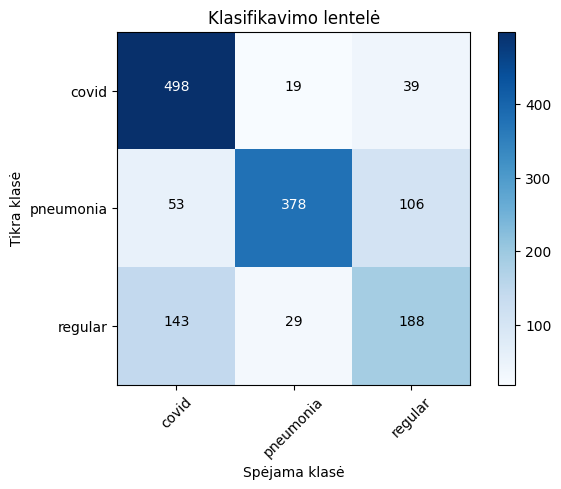

Found 1453 images belonging to 3 classes.


<ipython-input-42-fdab3ba43d06>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 67ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.79      0.69      0.73       556
   pneumonia       0.67      0.75      0.71       537
     regular       0.43      0.43      0.43       360

    accuracy                           0.65      1453
   macro avg       0.63      0.62      0.62      1453
weighted avg       0.65      0.65      0.65      1453

Accuracy: 0.6469373709566414
Specificity for covid: 0.88
Specificity for pneumonia: 0.78
Specificity for regular: 0.81
Macro-average Specificity: 0.82


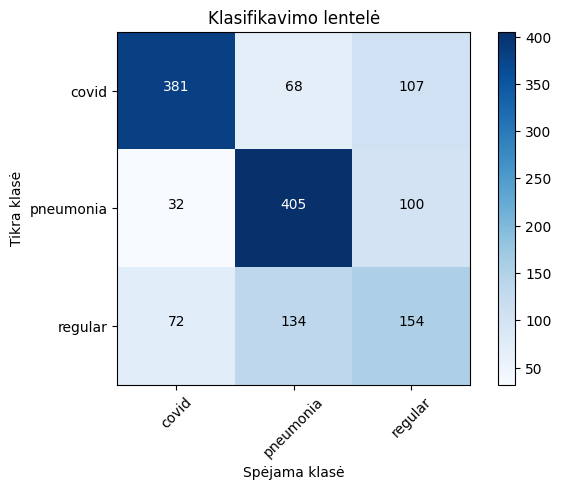

Found 1453 images belonging to 3 classes.


<ipython-input-42-fdab3ba43d06>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 71ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.60      0.87      0.71       556
   pneumonia       0.82      0.72      0.76       537
     regular       0.66      0.33      0.44       360

    accuracy                           0.68      1453
   macro avg       0.69      0.64      0.64      1453
weighted avg       0.70      0.68      0.66      1453

Accuracy: 0.6779077770130764
Specificity for covid: 0.64
Specificity for pneumonia: 0.91
Specificity for regular: 0.94
Macro-average Specificity: 0.83


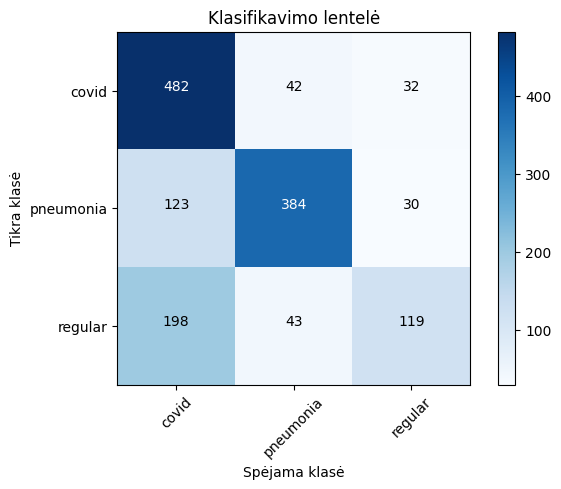

Found 1453 images belonging to 3 classes.


<ipython-input-42-fdab3ba43d06>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.79      0.73      0.76       556
   pneumonia       0.77      0.77      0.77       537
     regular       0.54      0.59      0.57       360

    accuracy                           0.71      1453
   macro avg       0.70      0.70      0.70      1453
weighted avg       0.72      0.71      0.72      1453

Accuracy: 0.7136958017894013
Specificity for covid: 0.88
Specificity for pneumonia: 0.86
Specificity for regular: 0.83
Macro-average Specificity: 0.86


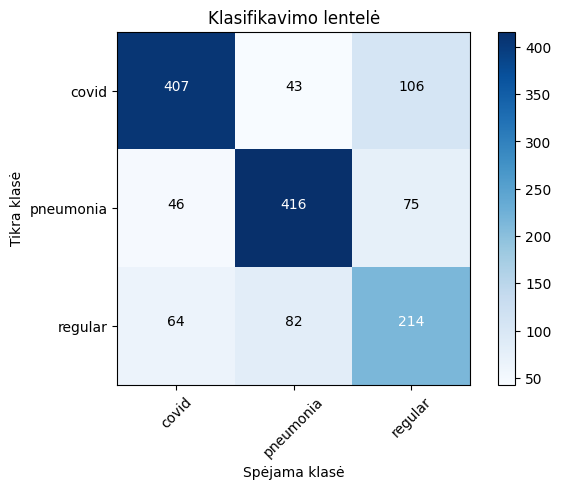

Found 1453 images belonging to 3 classes.


<ipython-input-42-fdab3ba43d06>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 71ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.79      0.63      0.70       556
   pneumonia       0.72      0.74      0.73       537
     regular       0.54      0.69      0.61       360

    accuracy                           0.68      1453
   macro avg       0.68      0.69      0.68      1453
weighted avg       0.70      0.68      0.69      1453

Accuracy: 0.6847900894700619
Specificity for covid: 0.90
Specificity for pneumonia: 0.83
Specificity for regular: 0.81
Macro-average Specificity: 0.84


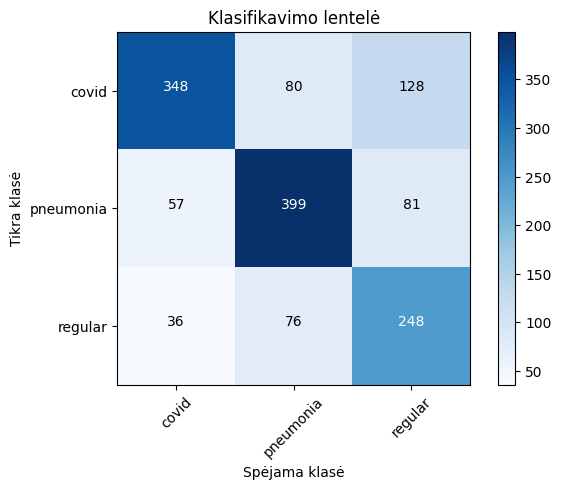

Final Metrics Across All Folds:
Average Accuracy: 0.69 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.74 ± 0.07
Class covid - Average Recall: 0.76 ± 0.10
Class covid - Average F1 Score: 0.74 ± 0.04
Class pneumonia - Average Precision: 0.77 ± 0.08
Class pneumonia - Average Recall: 0.74 ± 0.03
Class pneumonia - Average F1 Score: 0.75 ± 0.03
Class regular - Average Precision: 0.55 ± 0.07
Class regular - Average Recall: 0.51 ± 0.13
Class regular - Average F1 Score: 0.52 ± 0.07


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_sgd_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## focal + sgd + 0.01

Found 1453 images belonging to 3 classes.


<ipython-input-43-e0d33948d9a8>:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.68      0.51      0.58       556
   pneumonia       0.62      0.79      0.69       537
     regular       0.73      0.71      0.72       360

    accuracy                           0.66      1453
   macro avg       0.68      0.67      0.66      1453
weighted avg       0.67      0.66      0.66      1453

Accuracy: 0.6620784583620096
Specificity for covid: 0.85
Specificity for pneumonia: 0.71
Specificity for regular: 0.91
Macro-average Specificity: 0.83


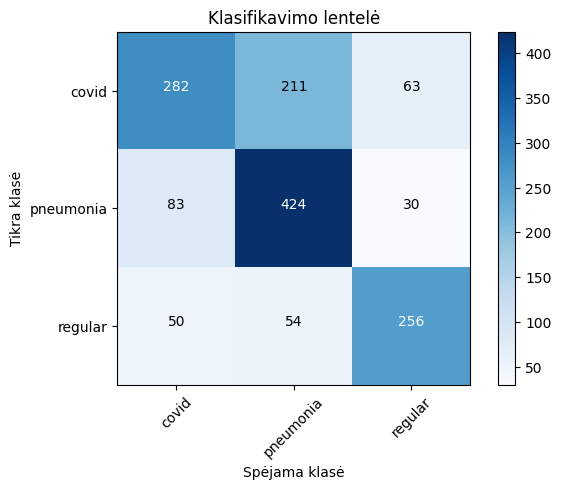

Found 1453 images belonging to 3 classes.


<ipython-input-43-e0d33948d9a8>:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.45      0.58      0.50       556
   pneumonia       0.71      0.69      0.70       537
     regular       0.32      0.19      0.23       360

    accuracy                           0.52      1453
   macro avg       0.49      0.48      0.48      1453
weighted avg       0.51      0.52      0.51      1453

Accuracy: 0.522367515485203
Specificity for covid: 0.56
Specificity for pneumonia: 0.84
Specificity for regular: 0.87
Macro-average Specificity: 0.75


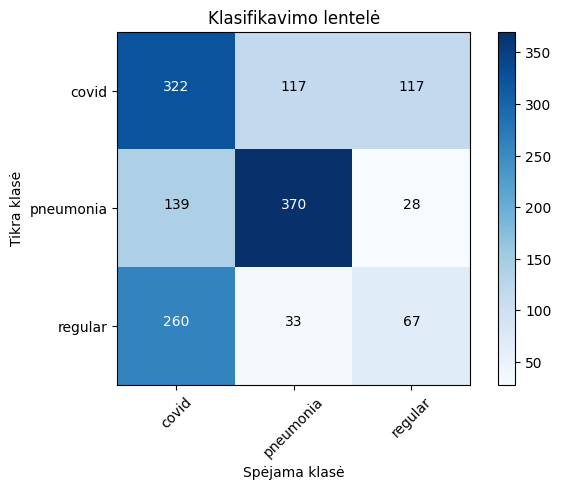

Found 1453 images belonging to 3 classes.


<ipython-input-43-e0d33948d9a8>:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.55      0.56      0.56       556
   pneumonia       0.72      0.47      0.57       537
     regular       0.32      0.47      0.38       360

    accuracy                           0.51      1453
   macro avg       0.53      0.50      0.50      1453
weighted avg       0.56      0.51      0.52      1453

Accuracy: 0.5072264280798349
Specificity for covid: 0.72
Specificity for pneumonia: 0.89
Specificity for regular: 0.67
Macro-average Specificity: 0.76


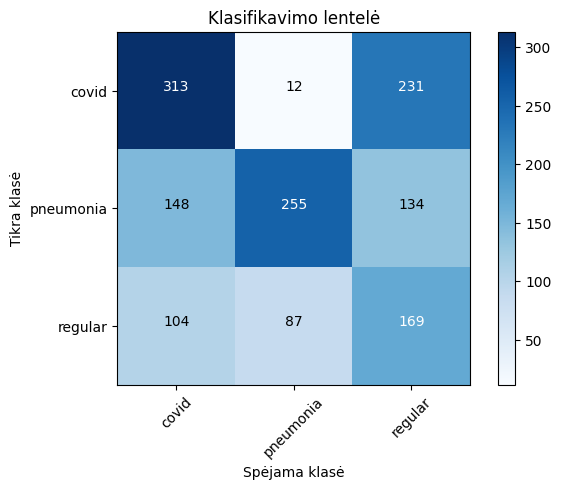

Found 1453 images belonging to 3 classes.


<ipython-input-43-e0d33948d9a8>:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.74      0.54      0.62       556
   pneumonia       0.70      0.77      0.73       537
     regular       0.46      0.59      0.52       360

    accuracy                           0.64      1453
   macro avg       0.63      0.63      0.62      1453
weighted avg       0.66      0.64      0.64      1453

Accuracy: 0.635237439779766
Specificity for covid: 0.88
Specificity for pneumonia: 0.81
Specificity for regular: 0.77
Macro-average Specificity: 0.82


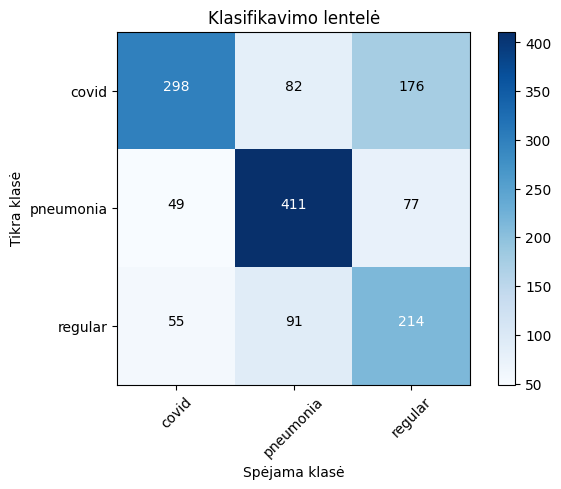

Found 1453 images belonging to 3 classes.


<ipython-input-43-e0d33948d9a8>:22: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 67ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.66      0.81      0.73       556
   pneumonia       0.91      0.60      0.72       537
     regular       0.59      0.68      0.63       360

    accuracy                           0.70      1453
   macro avg       0.72      0.70      0.69      1453
weighted avg       0.73      0.70      0.70      1453

Accuracy: 0.7006194081211287
Specificity for covid: 0.74
Specificity for pneumonia: 0.96
Specificity for regular: 0.85
Macro-average Specificity: 0.85


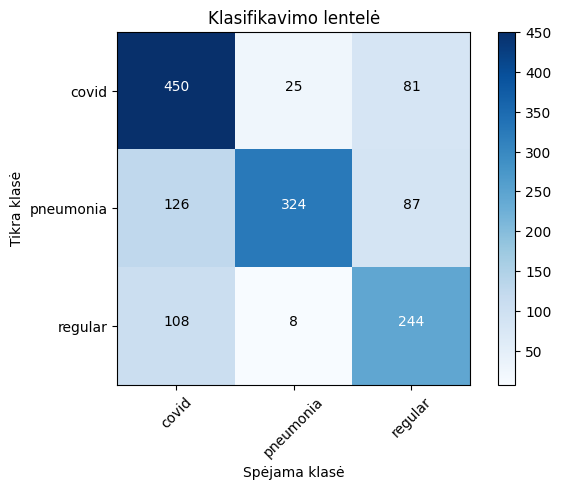

Final Metrics Across All Folds:
Average Accuracy: 0.61 ± 0.08
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.62 ± 0.10
Class covid - Average Recall: 0.60 ± 0.11
Class covid - Average F1 Score: 0.60 ± 0.07
Class pneumonia - Average Precision: 0.73 ± 0.10
Class pneumonia - Average Recall: 0.66 ± 0.11
Class pneumonia - Average F1 Score: 0.68 ± 0.06
Class regular - Average Precision: 0.48 ± 0.16
Class regular - Average Recall: 0.53 ± 0.19
Class regular - Average F1 Score: 0.50 ± 0.17


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_sgd_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    #model = load_model(model_path)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## cross + rmsprop + 0.001

Found 1453 images belonging to 3 classes.


<ipython-input-44-f606fbc24066>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.72      0.77      0.75       556
   pneumonia       0.95      0.73      0.82       537
     regular       0.52      0.64      0.57       360

    accuracy                           0.72      1453
   macro avg       0.73      0.71      0.71      1453
weighted avg       0.75      0.72      0.73      1453

Accuracy: 0.723331039229181
Specificity for covid: 0.81
Specificity for pneumonia: 0.98
Specificity for regular: 0.80
Macro-average Specificity: 0.87


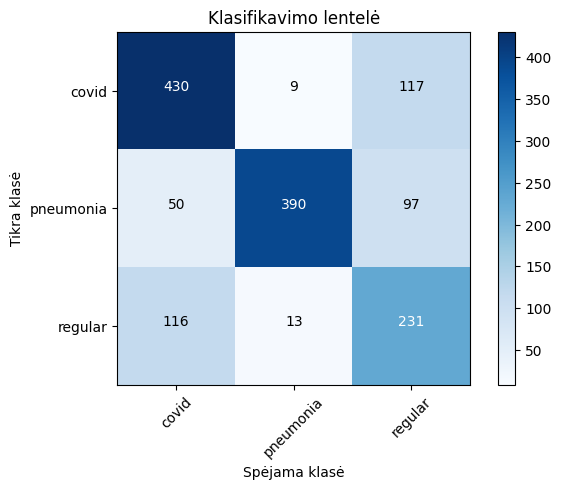

Found 1453 images belonging to 3 classes.


<ipython-input-44-f606fbc24066>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 4s 67ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.90      0.51      0.65       556
   pneumonia       0.88      0.71      0.79       537
     regular       0.49      0.94      0.64       360

    accuracy                           0.69      1453
   macro avg       0.75      0.72      0.69      1453
weighted avg       0.79      0.69      0.70      1453

Accuracy: 0.6937370956641431
Specificity for covid: 0.96
Specificity for pneumonia: 0.94
Specificity for regular: 0.67
Macro-average Specificity: 0.86


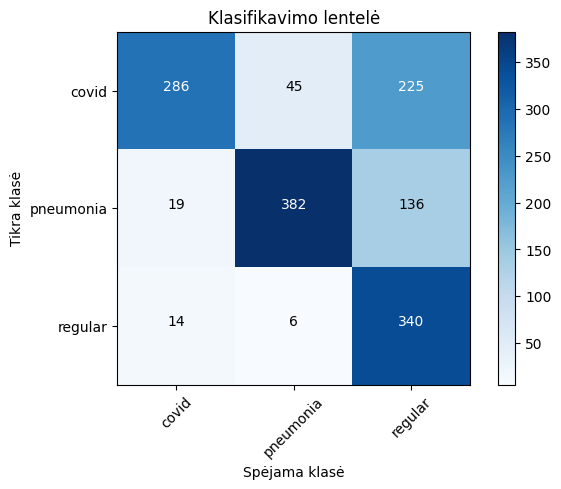

Found 1453 images belonging to 3 classes.


<ipython-input-44-f606fbc24066>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.74      0.31      0.44       556
   pneumonia       0.86      0.72      0.78       537
     regular       0.41      0.87      0.56       360

    accuracy                           0.60      1453
   macro avg       0.67      0.63      0.59      1453
weighted avg       0.70      0.60      0.60      1453

Accuracy: 0.6022023399862354
Specificity for covid: 0.93
Specificity for pneumonia: 0.93
Specificity for regular: 0.59
Macro-average Specificity: 0.82


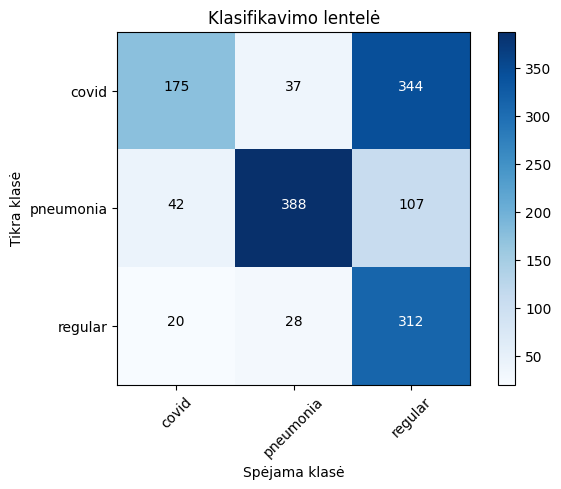

Found 1453 images belonging to 3 classes.


<ipython-input-44-f606fbc24066>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.70      0.56      0.63       556
   pneumonia       0.70      0.71      0.70       537
     regular       0.43      0.54      0.48       360

    accuracy                           0.61      1453
   macro avg       0.61      0.61      0.60      1453
weighted avg       0.63      0.61      0.62      1453

Accuracy: 0.6132140399174123
Specificity for covid: 0.85
Specificity for pneumonia: 0.82
Specificity for regular: 0.76
Macro-average Specificity: 0.81


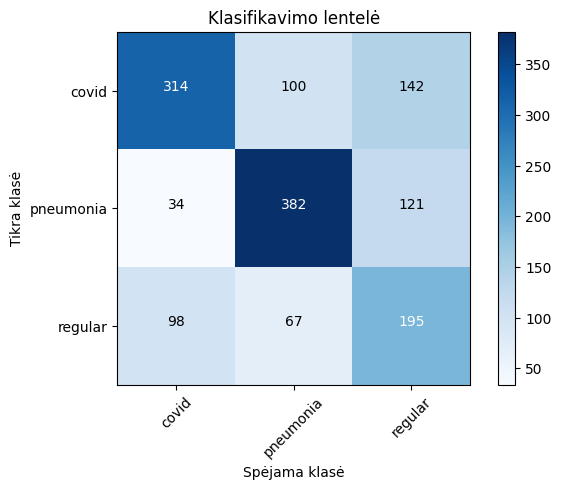

Found 1453 images belonging to 3 classes.


<ipython-input-44-f606fbc24066>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.72      0.72      0.72       556
   pneumonia       0.76      0.69      0.73       537
     regular       0.49      0.56      0.52       360

    accuracy                           0.67      1453
   macro avg       0.66      0.66      0.66      1453
weighted avg       0.68      0.67      0.67      1453

Accuracy: 0.6717136958017894
Specificity for covid: 0.83
Specificity for pneumonia: 0.87
Specificity for regular: 0.81
Macro-average Specificity: 0.84


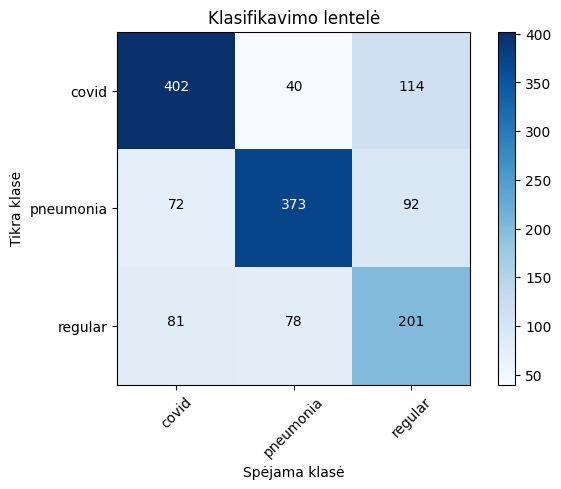

Final Metrics Across All Folds:
Average Accuracy: 0.66 ± 0.05
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.76 ± 0.07
Class covid - Average Recall: 0.58 ± 0.16
Class covid - Average F1 Score: 0.64 ± 0.11
Class pneumonia - Average Precision: 0.83 ± 0.09
Class pneumonia - Average Recall: 0.71 ± 0.01
Class pneumonia - Average F1 Score: 0.76 ± 0.04
Class regular - Average Precision: 0.47 ± 0.04
Class regular - Average Recall: 0.71 ± 0.16
Class regular - Average F1 Score: 0.55 ± 0.05


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_rmsprop_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## focal + rmsprop + 0.001

Found 1453 images belonging to 3 classes.


<ipython-input-45-7049cf280d84>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.79      0.65      0.71       556
   pneumonia       0.83      0.75      0.79       537
     regular       0.47      0.68      0.55       360

    accuracy                           0.69      1453
   macro avg       0.70      0.69      0.68      1453
weighted avg       0.73      0.69      0.70      1453

Accuracy: 0.690984170681349
Specificity for covid: 0.90
Specificity for pneumonia: 0.91
Specificity for regular: 0.75
Macro-average Specificity: 0.85


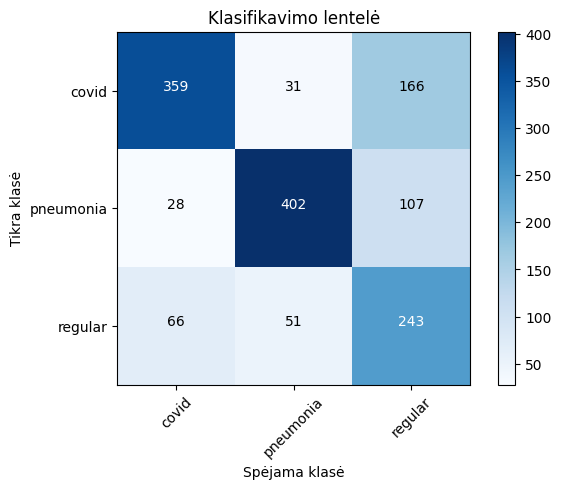

Found 1453 images belonging to 3 classes.


<ipython-input-45-7049cf280d84>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.86      0.46      0.60       556
   pneumonia       0.88      0.70      0.78       537
     regular       0.46      0.93      0.62       360

    accuracy                           0.67      1453
   macro avg       0.73      0.70      0.67      1453
weighted avg       0.77      0.67      0.67      1453

Accuracy: 0.6655196145905025
Specificity for covid: 0.95
Specificity for pneumonia: 0.95
Specificity for regular: 0.64
Macro-average Specificity: 0.85


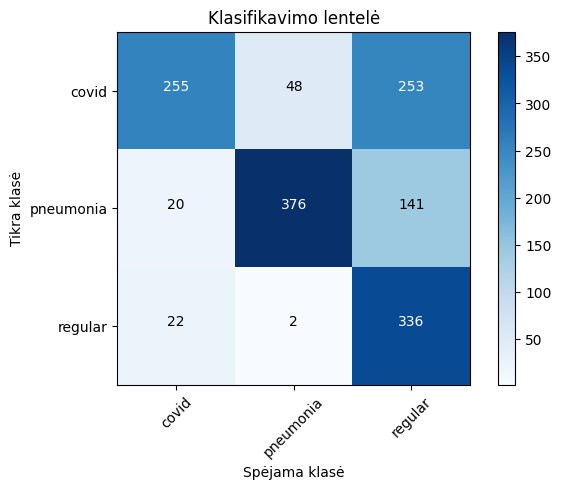

Found 1453 images belonging to 3 classes.


<ipython-input-45-7049cf280d84>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.83      0.79      0.81       556
   pneumonia       0.91      0.70      0.79       537
     regular       0.58      0.82      0.68       360

    accuracy                           0.76      1453
   macro avg       0.77      0.77      0.76      1453
weighted avg       0.80      0.76      0.77      1453

Accuracy: 0.7646249139710943
Specificity for covid: 0.90
Specificity for pneumonia: 0.96
Specificity for regular: 0.80
Macro-average Specificity: 0.89


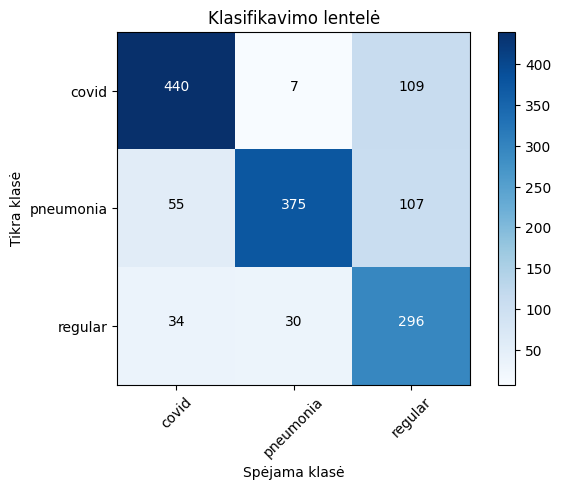

Found 1453 images belonging to 3 classes.


<ipython-input-45-7049cf280d84>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 71ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.83      0.66      0.74       556
   pneumonia       0.89      0.74      0.81       537
     regular       0.52      0.81      0.63       360

    accuracy                           0.73      1453
   macro avg       0.75      0.74      0.73      1453
weighted avg       0.78      0.73      0.74      1453

Accuracy: 0.7281486579490709
Specificity for covid: 0.92
Specificity for pneumonia: 0.94
Specificity for regular: 0.75
Macro-average Specificity: 0.87


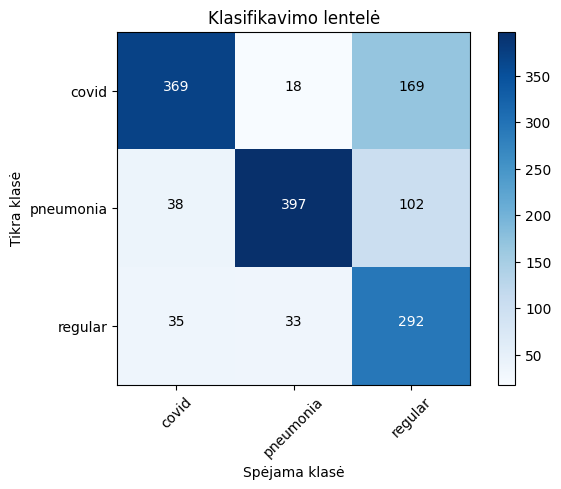

Found 1453 images belonging to 3 classes.


<ipython-input-45-7049cf280d84>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.85      0.69      0.76       556
   pneumonia       0.88      0.72      0.79       537
     regular       0.54      0.85      0.66       360

    accuracy                           0.74      1453
   macro avg       0.76      0.75      0.74      1453
weighted avg       0.79      0.74      0.75      1453

Accuracy: 0.7398485891259463
Specificity for covid: 0.93
Specificity for pneumonia: 0.94
Specificity for regular: 0.76
Macro-average Specificity: 0.88


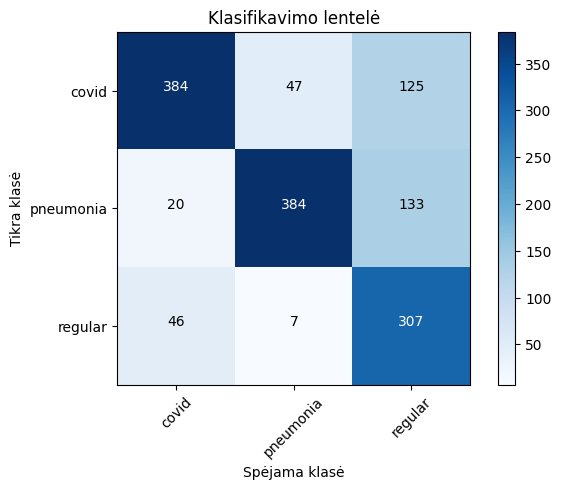

Final Metrics Across All Folds:
Average Accuracy: 0.72 ± 0.04
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.83 ± 0.02
Class covid - Average Recall: 0.65 ± 0.11
Class covid - Average F1 Score: 0.72 ± 0.07
Class pneumonia - Average Precision: 0.88 ± 0.03
Class pneumonia - Average Recall: 0.72 ± 0.02
Class pneumonia - Average F1 Score: 0.79 ± 0.01
Class regular - Average Precision: 0.51 ± 0.04
Class regular - Average Recall: 0.82 ± 0.08
Class regular - Average F1 Score: 0.63 ± 0.04


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_rmsprop_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## cross + adam + 0.001

Found 1453 images belonging to 3 classes.


<ipython-input-46-a58dfc68724e>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.76      0.69      0.72       556
   pneumonia       0.87      0.72      0.79       537
     regular       0.54      0.76      0.63       360

    accuracy                           0.72      1453
   macro avg       0.72      0.72      0.71      1453
weighted avg       0.74      0.72      0.72      1453

Accuracy: 0.7157604955264969
Specificity for covid: 0.86
Specificity for pneumonia: 0.94
Specificity for regular: 0.79
Macro-average Specificity: 0.86


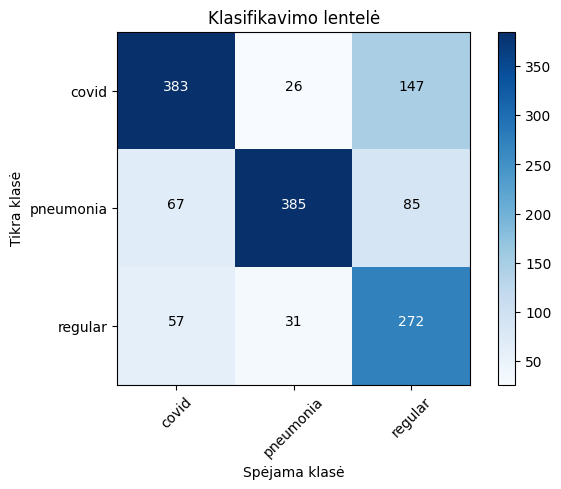

Found 1453 images belonging to 3 classes.


<ipython-input-46-a58dfc68724e>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 67ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.81      0.64      0.71       556
   pneumonia       0.79      0.70      0.75       537
     regular       0.51      0.76      0.61       360

    accuracy                           0.69      1453
   macro avg       0.70      0.70      0.69      1453
weighted avg       0.73      0.69      0.70      1453

Accuracy: 0.6916724019270475
Specificity for covid: 0.91
Specificity for pneumonia: 0.89
Specificity for regular: 0.76
Macro-average Specificity: 0.85


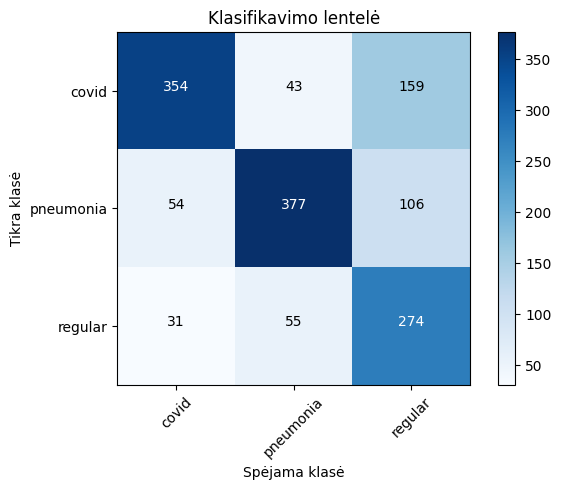

Found 1453 images belonging to 3 classes.


<ipython-input-46-a58dfc68724e>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 4s 66ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.63      0.86      0.73       556
   pneumonia       0.90      0.71      0.80       537
     regular       0.60      0.46      0.52       360

    accuracy                           0.70      1453
   macro avg       0.71      0.67      0.68      1453
weighted avg       0.72      0.70      0.70      1453

Accuracy: 0.7033723331039229
Specificity for covid: 0.69
Specificity for pneumonia: 0.96
Specificity for regular: 0.90
Macro-average Specificity: 0.85


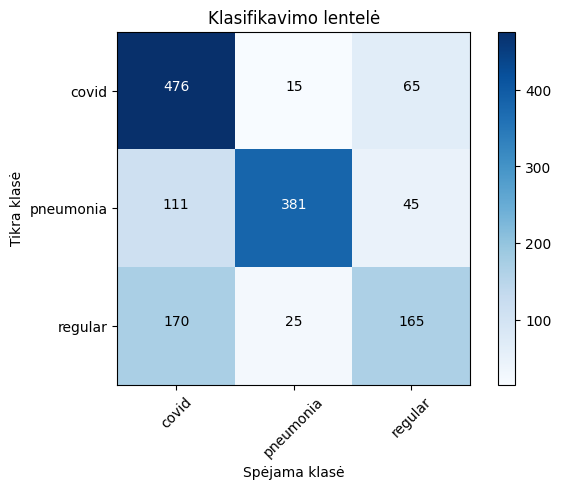

Found 1453 images belonging to 3 classes.


<ipython-input-46-a58dfc68724e>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.76      0.52      0.62       556
   pneumonia       0.69      0.72      0.71       537
     regular       0.53      0.77      0.63       360

    accuracy                           0.65      1453
   macro avg       0.66      0.67      0.65      1453
weighted avg       0.68      0.65      0.65      1453

Accuracy: 0.6531314521679285
Specificity for covid: 0.90
Specificity for pneumonia: 0.81
Specificity for regular: 0.78
Macro-average Specificity: 0.83


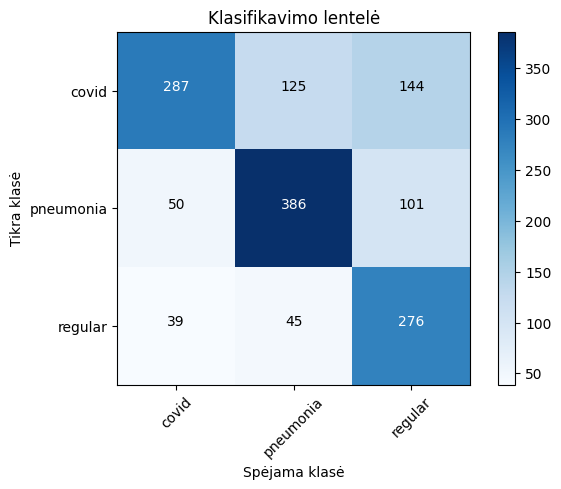

Found 1453 images belonging to 3 classes.


<ipython-input-46-a58dfc68724e>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.82      0.76      0.79       556
   pneumonia       0.87      0.73      0.79       537
     regular       0.56      0.77      0.65       360

    accuracy                           0.75      1453
   macro avg       0.75      0.75      0.74      1453
weighted avg       0.77      0.75      0.75      1453

Accuracy: 0.748107364074329
Specificity for covid: 0.90
Specificity for pneumonia: 0.93
Specificity for regular: 0.80
Macro-average Specificity: 0.88


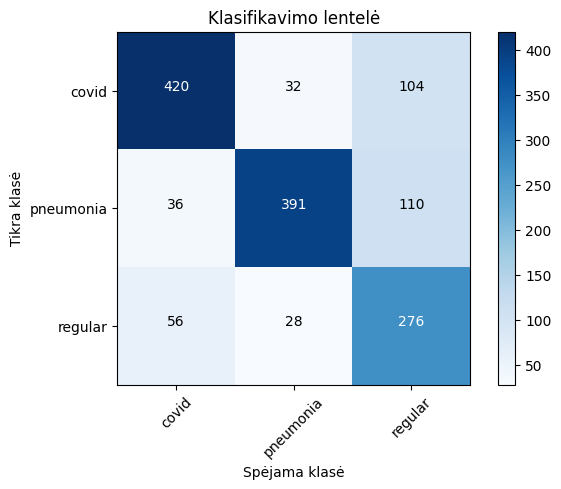

Final Metrics Across All Folds:
Average Accuracy: 0.70 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.75 ± 0.07
Class covid - Average Recall: 0.69 ± 0.11
Class covid - Average F1 Score: 0.71 ± 0.05
Class pneumonia - Average Precision: 0.83 ± 0.08
Class pneumonia - Average Recall: 0.72 ± 0.01
Class pneumonia - Average F1 Score: 0.76 ± 0.03
Class regular - Average Precision: 0.55 ± 0.03
Class regular - Average Recall: 0.70 ± 0.12
Class regular - Average F1 Score: 0.61 ± 0.05


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_adam_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## focal + adam + 0.001

Found 1453 images belonging to 3 classes.


<ipython-input-47-43bcebb8ac12>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.67      0.33      0.45       556
   pneumonia       0.86      0.71      0.78       537
     regular       0.41      0.83      0.55       360

    accuracy                           0.59      1453
   macro avg       0.65      0.62      0.59      1453
weighted avg       0.68      0.59      0.59      1453

Accuracy: 0.5946317962835512
Specificity for covid: 0.90
Specificity for pneumonia: 0.93
Specificity for regular: 0.60
Macro-average Specificity: 0.81


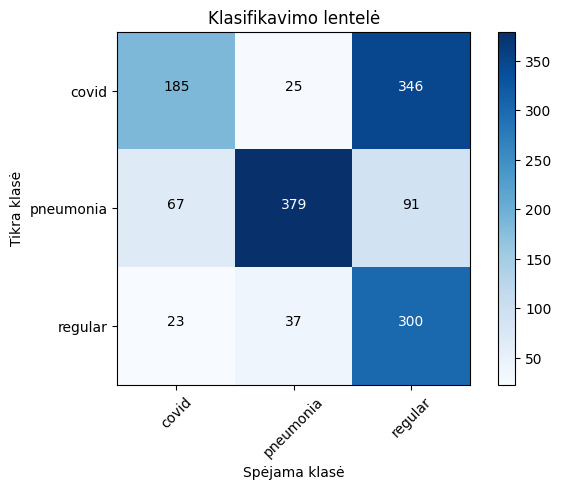

Found 1453 images belonging to 3 classes.


<ipython-input-47-43bcebb8ac12>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.85      0.56      0.67       556
   pneumonia       0.65      0.72      0.68       537
     regular       0.53      0.73      0.61       360

    accuracy                           0.66      1453
   macro avg       0.68      0.67      0.66      1453
weighted avg       0.70      0.66      0.66      1453

Accuracy: 0.6586373021335169
Specificity for covid: 0.94
Specificity for pneumonia: 0.77
Specificity for regular: 0.79
Macro-average Specificity: 0.83


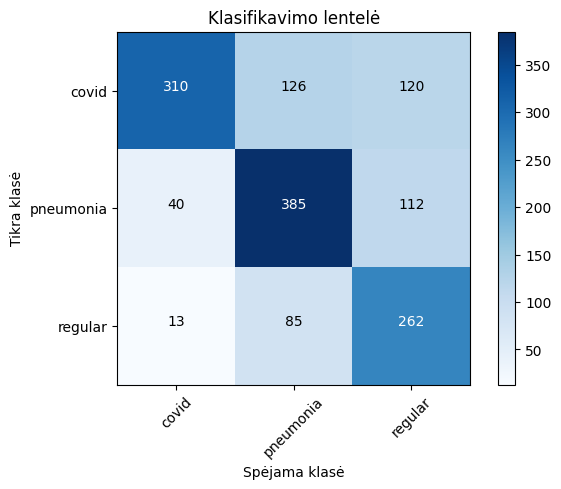

Found 1453 images belonging to 3 classes.


<ipython-input-47-43bcebb8ac12>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 71ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.79      0.76      0.77       556
   pneumonia       0.82      0.75      0.79       537
     regular       0.59      0.70      0.64       360

    accuracy                           0.74      1453
   macro avg       0.73      0.74      0.73      1453
weighted avg       0.75      0.74      0.75      1453

Accuracy: 0.741913282863042
Specificity for covid: 0.87
Specificity for pneumonia: 0.91
Specificity for regular: 0.84
Macro-average Specificity: 0.87


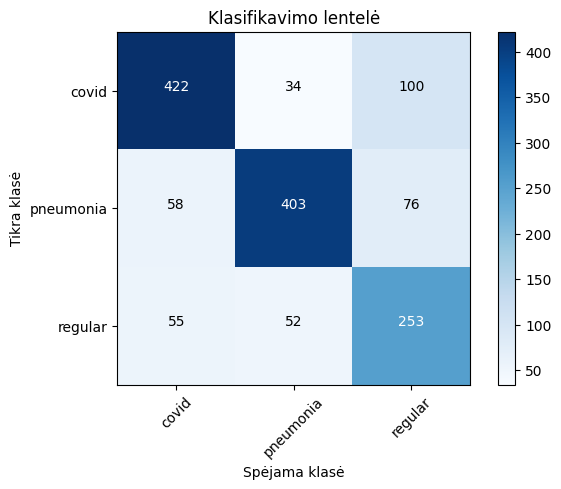

Found 1453 images belonging to 3 classes.


<ipython-input-47-43bcebb8ac12>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 72ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.64      0.84      0.73       556
   pneumonia       0.87      0.67      0.76       537
     regular       0.50      0.43      0.46       360

    accuracy                           0.68      1453
   macro avg       0.67      0.65      0.65      1453
weighted avg       0.69      0.68      0.67      1453

Accuracy: 0.6772195457673779
Specificity for covid: 0.71
Specificity for pneumonia: 0.94
Specificity for regular: 0.86
Macro-average Specificity: 0.84


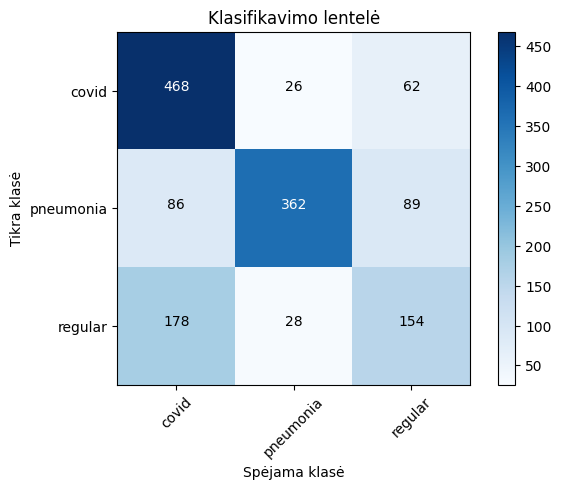

Found 1453 images belonging to 3 classes.


<ipython-input-47-43bcebb8ac12>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.78      0.59      0.67       556
   pneumonia       0.85      0.75      0.80       537
     regular       0.48      0.75      0.59       360

    accuracy                           0.69      1453
   macro avg       0.70      0.70      0.69      1453
weighted avg       0.73      0.69      0.70      1453

Accuracy: 0.6889194769442533
Specificity for covid: 0.89
Specificity for pneumonia: 0.92
Specificity for regular: 0.74
Macro-average Specificity: 0.85


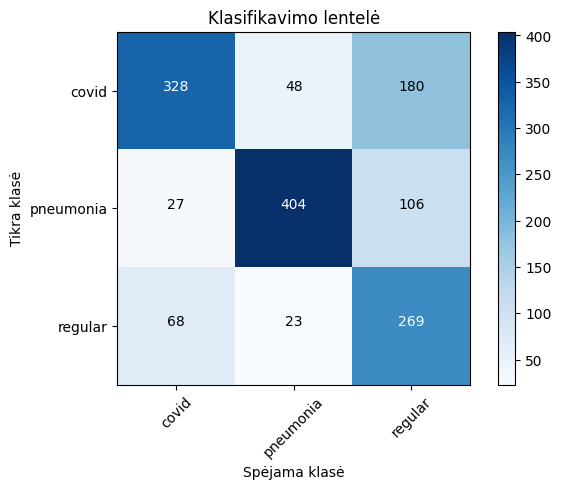

Final Metrics Across All Folds:
Average Accuracy: 0.67 ± 0.05
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.75 ± 0.08
Class covid - Average Recall: 0.62 ± 0.18
Class covid - Average F1 Score: 0.66 ± 0.11
Class pneumonia - Average Precision: 0.81 ± 0.08
Class pneumonia - Average Recall: 0.72 ± 0.03
Class pneumonia - Average F1 Score: 0.76 ± 0.04
Class regular - Average Precision: 0.50 ± 0.06
Class regular - Average Recall: 0.69 ± 0.14
Class regular - Average F1 Score: 0.57 ± 0.06


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_adam_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## cross + nadam + 0.001

Found 1453 images belonging to 3 classes.


<ipython-input-48-88b786128c72>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 72ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.77      0.54      0.64       556
   pneumonia       0.84      0.69      0.76       537
     regular       0.44      0.77      0.56       360

    accuracy                           0.65      1453
   macro avg       0.68      0.66      0.65      1453
weighted avg       0.72      0.65      0.66      1453

Accuracy: 0.6503785271851342
Specificity for covid: 0.90
Specificity for pneumonia: 0.92
Specificity for regular: 0.68
Macro-average Specificity: 0.84


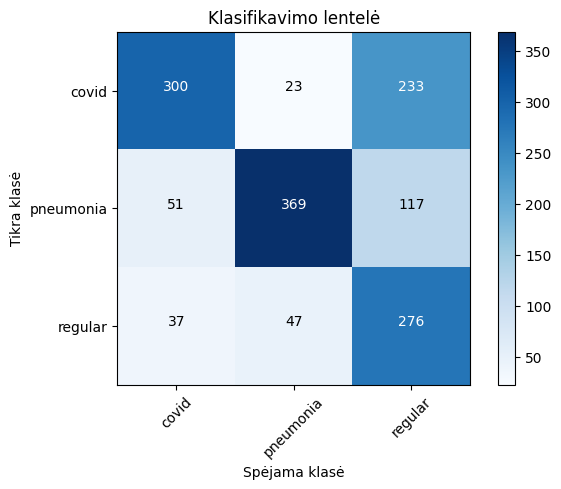

Found 1453 images belonging to 3 classes.


<ipython-input-48-88b786128c72>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.81      0.82      0.81       556
   pneumonia       0.89      0.73      0.80       537
     regular       0.53      0.67      0.59       360

    accuracy                           0.75      1453
   macro avg       0.74      0.74      0.74      1453
weighted avg       0.77      0.75      0.75      1453

Accuracy: 0.7474191328286304
Specificity for covid: 0.88
Specificity for pneumonia: 0.95
Specificity for regular: 0.81
Macro-average Specificity: 0.88


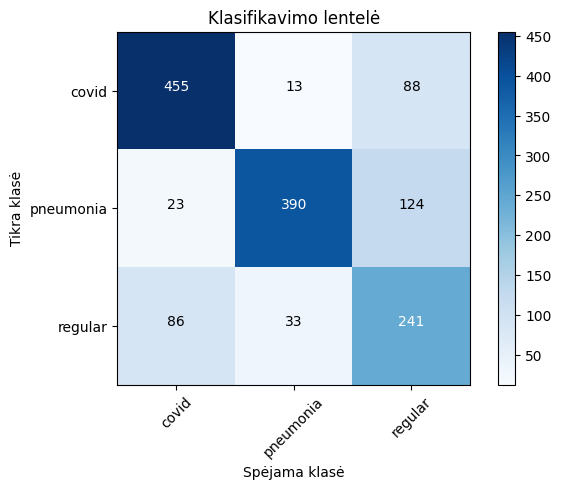

Found 1453 images belonging to 3 classes.


<ipython-input-48-88b786128c72>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.73      0.84      0.78       556
   pneumonia       0.88      0.69      0.77       537
     regular       0.64      0.70      0.67       360

    accuracy                           0.75      1453
   macro avg       0.75      0.74      0.74      1453
weighted avg       0.76      0.75      0.75      1453

Accuracy: 0.7501720578114246
Specificity for covid: 0.81
Specificity for pneumonia: 0.94
Specificity for regular: 0.87
Macro-average Specificity: 0.87


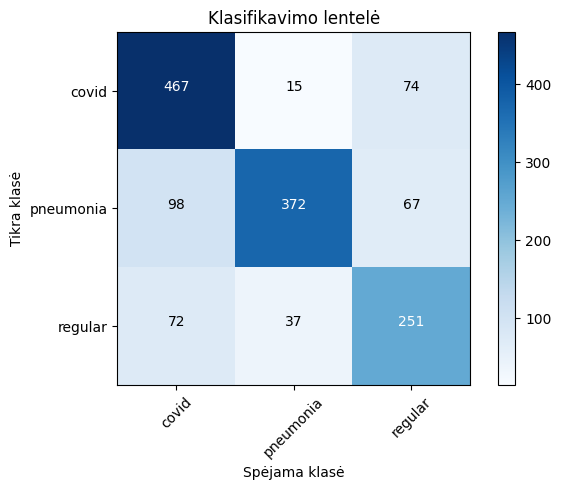

Found 1453 images belonging to 3 classes.


<ipython-input-48-88b786128c72>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 70ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.86      0.61      0.71       556
   pneumonia       0.67      0.72      0.69       537
     regular       0.52      0.69      0.59       360

    accuracy                           0.67      1453
   macro avg       0.68      0.67      0.67      1453
weighted avg       0.70      0.67      0.68      1453

Accuracy: 0.6703372333103923
Specificity for covid: 0.94
Specificity for pneumonia: 0.79
Specificity for regular: 0.79
Macro-average Specificity: 0.84


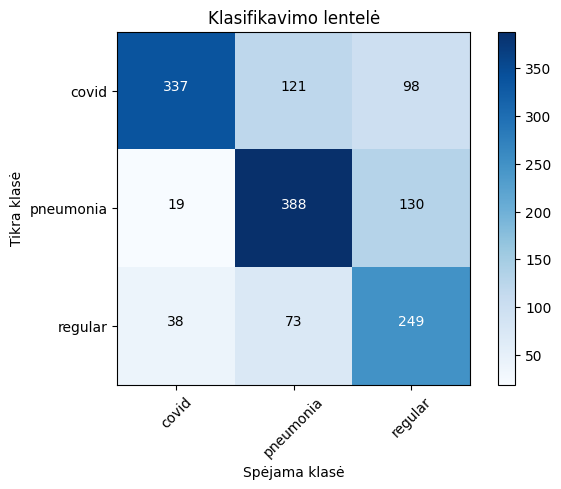

Found 1453 images belonging to 3 classes.


<ipython-input-48-88b786128c72>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.84      0.79      0.81       556
   pneumonia       0.91      0.71      0.79       537
     regular       0.53      0.76      0.62       360

    accuracy                           0.75      1453
   macro avg       0.76      0.75      0.74      1453
weighted avg       0.79      0.75      0.76      1453

Accuracy: 0.7487955953200275
Specificity for covid: 0.91
Specificity for pneumonia: 0.96
Specificity for regular: 0.78
Macro-average Specificity: 0.88


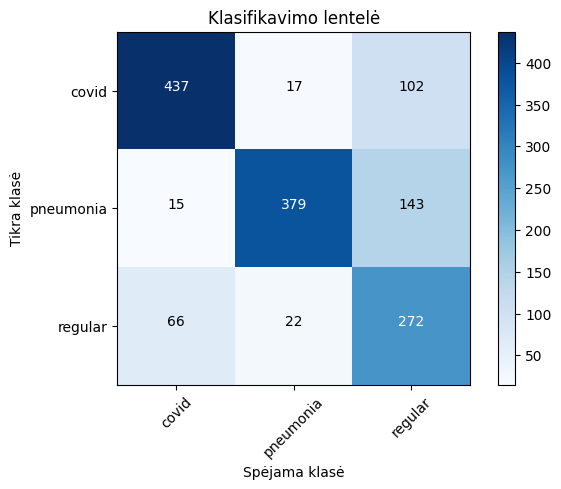

Final Metrics Across All Folds:
Average Accuracy: 0.71 ± 0.04
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.80 ± 0.05
Class covid - Average Recall: 0.72 ± 0.12
Class covid - Average F1 Score: 0.75 ± 0.07
Class pneumonia - Average Precision: 0.84 ± 0.09
Class pneumonia - Average Recall: 0.71 ± 0.02
Class pneumonia - Average F1 Score: 0.76 ± 0.04
Class regular - Average Precision: 0.53 ± 0.06
Class regular - Average Recall: 0.72 ± 0.04
Class regular - Average F1 Score: 0.61 ± 0.04


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_nadam_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## focal + nadam + 0.001

Found 1453 images belonging to 3 classes.


<ipython-input-49-14dbd6cca795>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.85      0.37      0.51       556
   pneumonia       0.62      0.76      0.68       537
     regular       0.47      0.73      0.57       360

    accuracy                           0.60      1453
   macro avg       0.65      0.62      0.59      1453
weighted avg       0.67      0.60      0.59      1453

Accuracy: 0.6008258774948383
Specificity for covid: 0.96
Specificity for pneumonia: 0.73
Specificity for regular: 0.73
Macro-average Specificity: 0.81


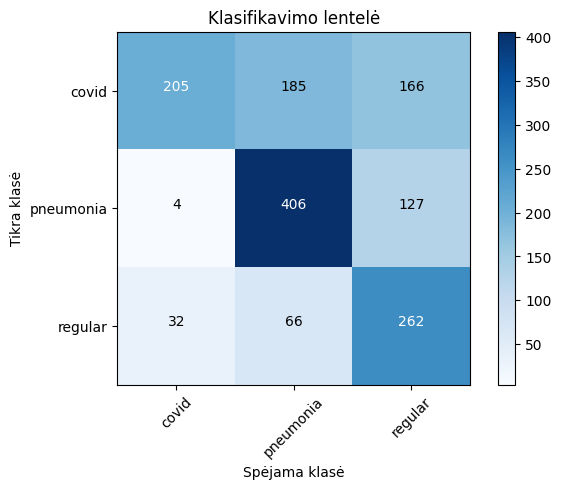

Found 1453 images belonging to 3 classes.


<ipython-input-49-14dbd6cca795>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 69ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.57      0.53      0.55       556
   pneumonia       0.85      0.63      0.72       537
     regular       0.38      0.56      0.45       360

    accuracy                           0.57      1453
   macro avg       0.60      0.57      0.57      1453
weighted avg       0.62      0.57      0.59      1453

Accuracy: 0.573296627666896
Specificity for covid: 0.75
Specificity for pneumonia: 0.94
Specificity for regular: 0.69
Macro-average Specificity: 0.79


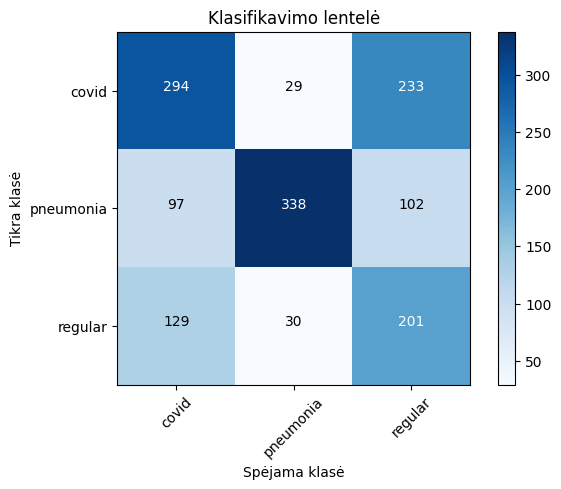

Found 1453 images belonging to 3 classes.


<ipython-input-49-14dbd6cca795>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 4s 67ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.69      0.75      0.72       556
   pneumonia       0.71      0.73      0.72       537
     regular       0.55      0.47      0.51       360

    accuracy                           0.67      1453
   macro avg       0.65      0.65      0.65      1453
weighted avg       0.66      0.67      0.67      1453

Accuracy: 0.6696490020646937
Specificity for covid: 0.80
Specificity for pneumonia: 0.82
Specificity for regular: 0.88
Macro-average Specificity: 0.83


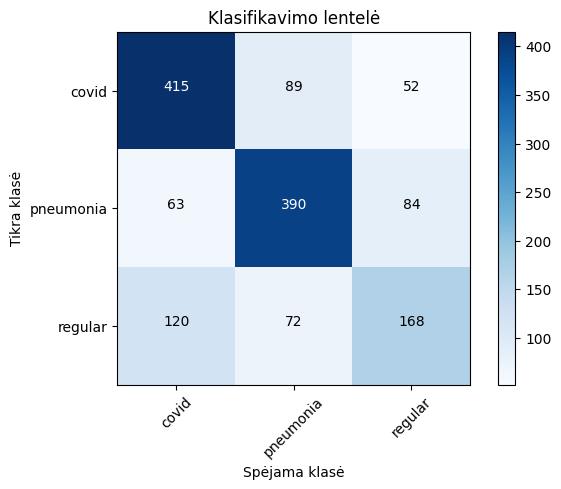

Found 1453 images belonging to 3 classes.


<ipython-input-49-14dbd6cca795>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 68ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.73      0.65      0.68       556
   pneumonia       0.89      0.72      0.80       537
     regular       0.51      0.74      0.60       360

    accuracy                           0.70      1453
   macro avg       0.71      0.70      0.69      1453
weighted avg       0.73      0.70      0.71      1453

Accuracy: 0.6971782518926359
Specificity for covid: 0.85
Specificity for pneumonia: 0.95
Specificity for regular: 0.77
Macro-average Specificity: 0.85


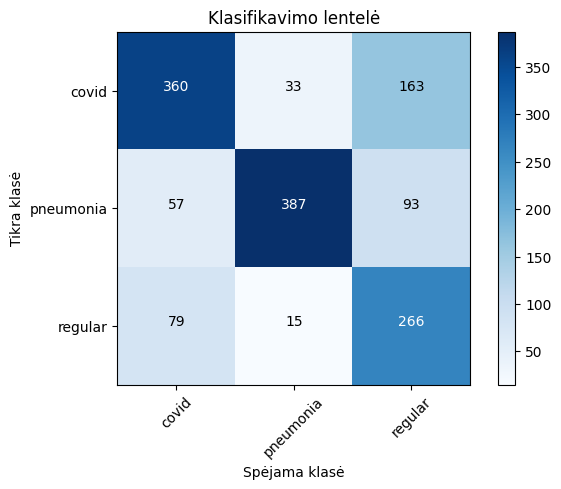

Found 1453 images belonging to 3 classes.


<ipython-input-49-14dbd6cca795>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


46/46 [==============================] - 5s 71ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.84      0.60      0.70       556
   pneumonia       0.93      0.71      0.80       537
     regular       0.52      0.93      0.66       360

    accuracy                           0.72      1453
   macro avg       0.76      0.74      0.72      1453
weighted avg       0.79      0.72      0.73      1453

Accuracy: 0.7205781142463867
Specificity for covid: 0.93
Specificity for pneumonia: 0.97
Specificity for regular: 0.71
Macro-average Specificity: 0.87


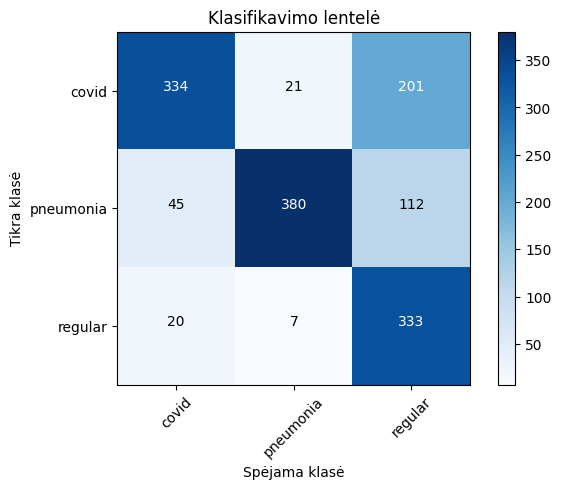

Final Metrics Across All Folds:
Average Accuracy: 0.65 ± 0.06
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.73 ± 0.10
Class covid - Average Recall: 0.58 ± 0.13
Class covid - Average F1 Score: 0.63 ± 0.08
Class pneumonia - Average Precision: 0.80 ± 0.12
Class pneumonia - Average Recall: 0.71 ± 0.04
Class pneumonia - Average F1 Score: 0.74 ± 0.05
Class regular - Average Precision: 0.48 ± 0.06
Class regular - Average Recall: 0.68 ± 0.16
Class regular - Average F1 Score: 0.56 ± 0.07


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_nadam_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross SGD + 0.001

Found 1397 images belonging to 3 classes.


<ipython-input-36-ae921f8ff40d>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 10s 103ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.65      0.33      0.44       555
   pneumonia       0.70      0.76      0.73       537
     regular       0.38      0.67      0.49       305

    accuracy                           0.57      1397
   macro avg       0.58      0.59      0.55      1397
weighted avg       0.61      0.57      0.56      1397

Accuracy: 0.5683607730851825
Specificity for covid: 0.88
Specificity for pneumonia: 0.79
Specificity for regular: 0.70
Macro-average Specificity: 0.79


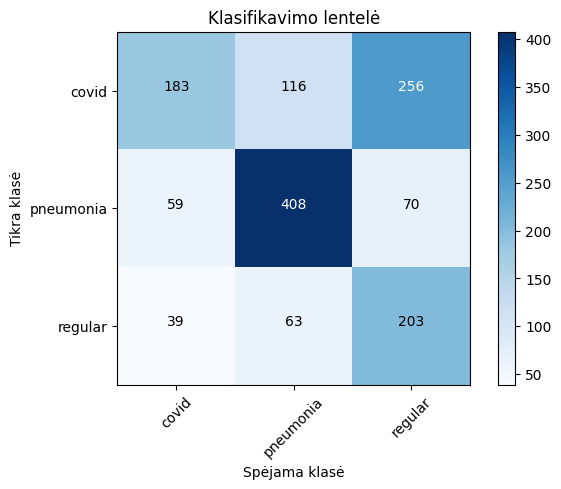

Found 1397 images belonging to 3 classes.


<ipython-input-36-ae921f8ff40d>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.81      0.28      0.41       555
   pneumonia       0.74      0.72      0.73       537
     regular       0.37      0.84      0.52       305

    accuracy                           0.57      1397
   macro avg       0.64      0.61      0.55      1397
weighted avg       0.69      0.57      0.56      1397

Accuracy: 0.56907659269864
Specificity for covid: 0.96
Specificity for pneumonia: 0.85
Specificity for regular: 0.60
Macro-average Specificity: 0.80


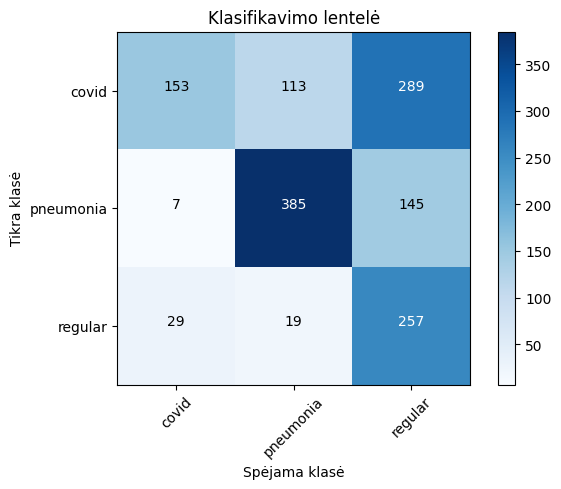

Found 1397 images belonging to 3 classes.


<ipython-input-36-ae921f8ff40d>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.67      0.31      0.43       555
   pneumonia       0.81      0.76      0.79       537
     regular       0.38      0.79      0.51       305

    accuracy                           0.59      1397
   macro avg       0.62      0.62      0.58      1397
weighted avg       0.66      0.59      0.58      1397

Accuracy: 0.5898353614889048
Specificity for covid: 0.90
Specificity for pneumonia: 0.89
Specificity for regular: 0.64
Macro-average Specificity: 0.81


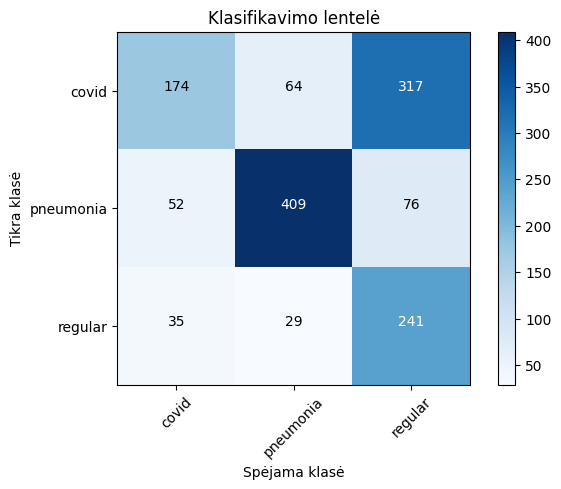

Found 1397 images belonging to 3 classes.


<ipython-input-36-ae921f8ff40d>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.60      0.26      0.37       555
   pneumonia       0.82      0.72      0.77       537
     regular       0.33      0.73      0.45       305

    accuracy                           0.54      1397
   macro avg       0.58      0.57      0.53      1397
weighted avg       0.62      0.54      0.54      1397

Accuracy: 0.541159627773801
Specificity for covid: 0.88
Specificity for pneumonia: 0.90
Specificity for regular: 0.58
Macro-average Specificity: 0.79


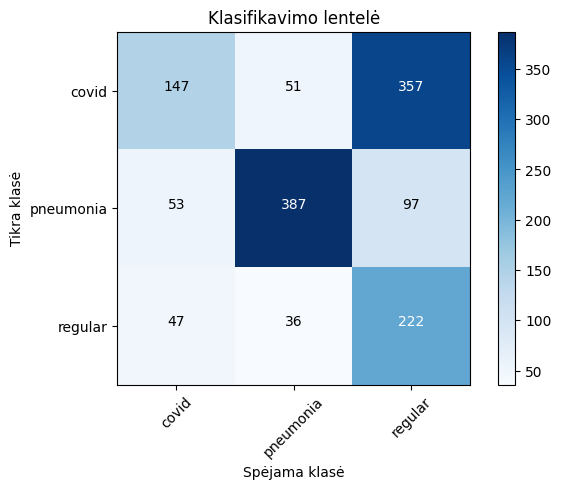

Found 1397 images belonging to 3 classes.


<ipython-input-36-ae921f8ff40d>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.55      0.22      0.32       555
   pneumonia       0.72      0.76      0.74       537
     regular       0.34      0.68      0.45       305

    accuracy                           0.53      1397
   macro avg       0.54      0.55      0.50      1397
weighted avg       0.57      0.53      0.51      1397

Accuracy: 0.5275590551181102
Specificity for covid: 0.88
Specificity for pneumonia: 0.81
Specificity for regular: 0.63
Macro-average Specificity: 0.78


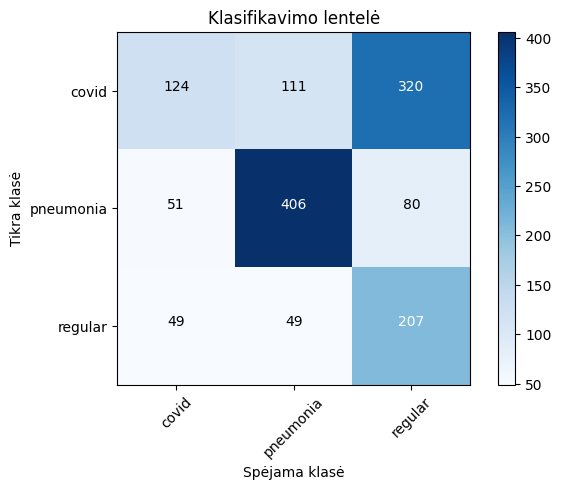

Final Metrics Across All Folds:
Average Accuracy: 0.56 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.66 ± 0.09
Class covid - Average Recall: 0.28 ± 0.04
Class covid - Average F1 Score: 0.39 ± 0.04
Class pneumonia - Average Precision: 0.76 ± 0.05
Class pneumonia - Average Recall: 0.74 ± 0.02
Class pneumonia - Average F1 Score: 0.75 ± 0.02
Class regular - Average Precision: 0.36 ± 0.02
Class regular - Average Recall: 0.74 ± 0.07
Class regular - Average F1 Score: 0.48 ± 0.03


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_sgd_001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal SGD + 0.001

Found 1397 images belonging to 3 classes.


<ipython-input-37-77a9ffae45d7>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 82ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.83      0.49      0.61       555
   pneumonia       0.85      0.71      0.78       537
     regular       0.43      0.88      0.58       305

    accuracy                           0.66      1397
   macro avg       0.70      0.69      0.66      1397
weighted avg       0.75      0.66      0.67      1397

Accuracy: 0.6607015032211883
Specificity for covid: 0.93
Specificity for pneumonia: 0.92
Specificity for regular: 0.68
Macro-average Specificity: 0.84


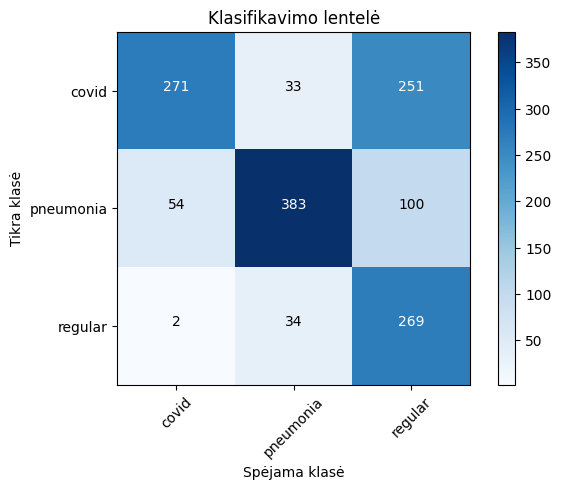

Found 1397 images belonging to 3 classes.


<ipython-input-37-77a9ffae45d7>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.77      0.45      0.56       555
   pneumonia       0.76      0.74      0.75       537
     regular       0.40      0.71      0.51       305

    accuracy                           0.62      1397
   macro avg       0.64      0.63      0.61      1397
weighted avg       0.68      0.62      0.62      1397

Accuracy: 0.6177523264137438
Specificity for covid: 0.91
Specificity for pneumonia: 0.85
Specificity for regular: 0.70
Macro-average Specificity: 0.82


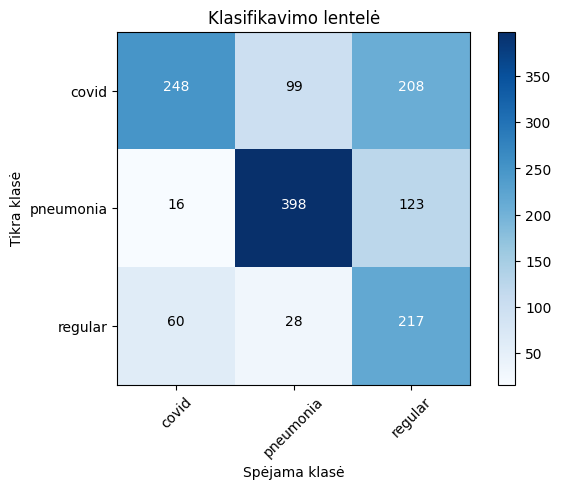

Found 1397 images belonging to 3 classes.


<ipython-input-37-77a9ffae45d7>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 83ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.69      0.57      0.62       555
   pneumonia       0.82      0.72      0.77       537
     regular       0.47      0.72      0.57       305

    accuracy                           0.66      1397
   macro avg       0.66      0.67      0.65      1397
weighted avg       0.69      0.66      0.67      1397

Accuracy: 0.6607015032211883
Specificity for covid: 0.83
Specificity for pneumonia: 0.90
Specificity for regular: 0.78
Macro-average Specificity: 0.84


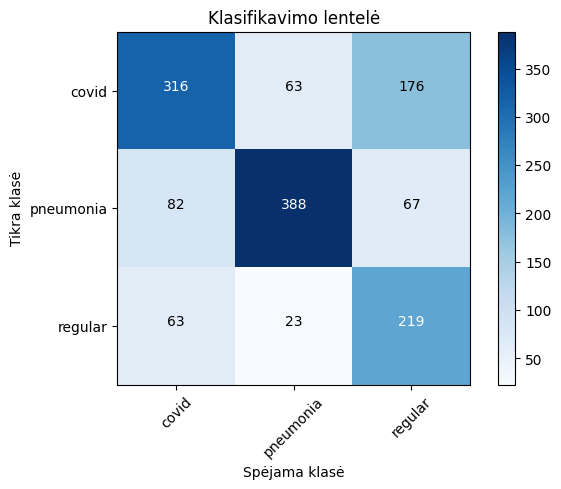

Found 1397 images belonging to 3 classes.


<ipython-input-37-77a9ffae45d7>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.61      0.50      0.55       555
   pneumonia       0.73      0.73      0.73       537
     regular       0.46      0.61      0.52       305

    accuracy                           0.61      1397
   macro avg       0.60      0.61      0.60      1397
weighted avg       0.62      0.61      0.61      1397

Accuracy: 0.6127415891195419
Specificity for covid: 0.79
Specificity for pneumonia: 0.83
Specificity for regular: 0.80
Macro-average Specificity: 0.81


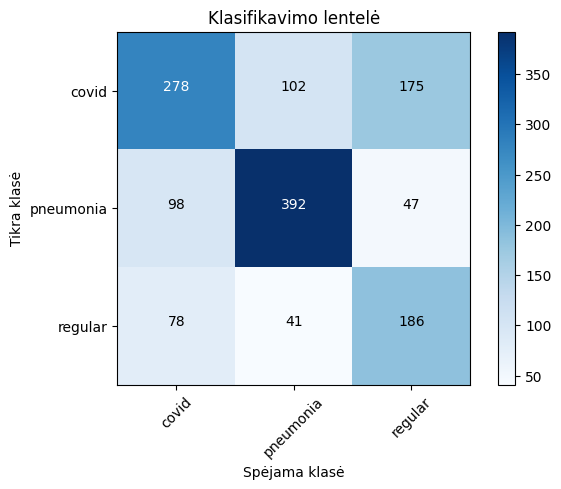

Found 1397 images belonging to 3 classes.


<ipython-input-37-77a9ffae45d7>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 82ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.62      0.37      0.46       555
   pneumonia       0.89      0.70      0.79       537
     regular       0.35      0.74      0.48       305

    accuracy                           0.58      1397
   macro avg       0.62      0.60      0.57      1397
weighted avg       0.66      0.58      0.59      1397

Accuracy: 0.5783822476735863
Specificity for covid: 0.85
Specificity for pneumonia: 0.94
Specificity for regular: 0.62
Macro-average Specificity: 0.80


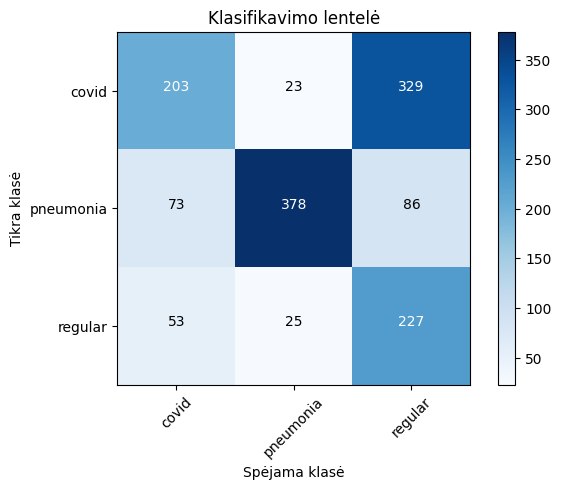

Final Metrics Across All Folds:
Average Accuracy: 0.63 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.70 ± 0.08
Class covid - Average Recall: 0.47 ± 0.07
Class covid - Average F1 Score: 0.56 ± 0.06
Class pneumonia - Average Precision: 0.81 ± 0.06
Class pneumonia - Average Recall: 0.72 ± 0.01
Class pneumonia - Average F1 Score: 0.76 ± 0.02
Class regular - Average Precision: 0.42 ± 0.04
Class regular - Average Recall: 0.73 ± 0.09
Class regular - Average F1 Score: 0.53 ± 0.04


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_sgd_0.001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross SGD + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-38-4a9718826b62>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.53      0.14      0.23       555
   pneumonia       0.71      0.72      0.72       537
     regular       0.26      0.60      0.36       305

    accuracy                           0.47      1397
   macro avg       0.50      0.49      0.44      1397
weighted avg       0.54      0.47      0.45      1397

Accuracy: 0.4667143879742305
Specificity for covid: 0.92
Specificity for pneumonia: 0.82
Specificity for regular: 0.53
Macro-average Specificity: 0.75


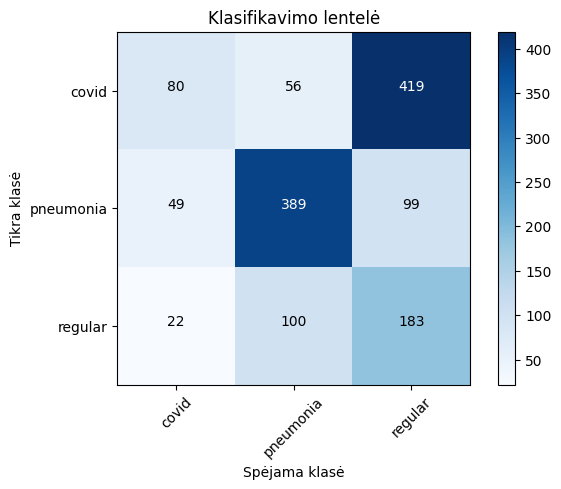

Found 1397 images belonging to 3 classes.


<ipython-input-38-4a9718826b62>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.48      0.13      0.20       555
   pneumonia       0.72      0.76      0.74       537
     regular       0.26      0.58      0.36       305

    accuracy                           0.47      1397
   macro avg       0.49      0.49      0.43      1397
weighted avg       0.52      0.47      0.44      1397

Accuracy: 0.46957766642806015
Specificity for covid: 0.91
Specificity for pneumonia: 0.82
Specificity for regular: 0.54
Macro-average Specificity: 0.75


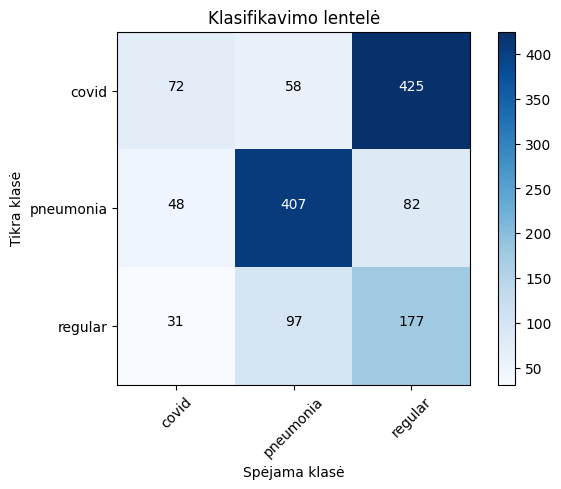

Found 1397 images belonging to 3 classes.


<ipython-input-38-4a9718826b62>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.36      0.13      0.19       555
   pneumonia       0.77      0.74      0.75       537
     regular       0.22      0.49      0.30       305

    accuracy                           0.44      1397
   macro avg       0.45      0.45      0.42      1397
weighted avg       0.49      0.44      0.43      1397

Accuracy: 0.44380816034359344
Specificity for covid: 0.85
Specificity for pneumonia: 0.86
Specificity for regular: 0.52
Macro-average Specificity: 0.74


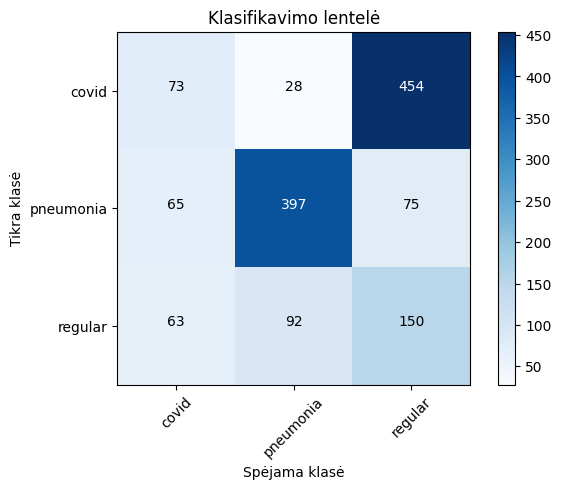

Found 1397 images belonging to 3 classes.


<ipython-input-38-4a9718826b62>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 83ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.52      0.14      0.22       555
   pneumonia       0.60      0.78      0.68       537
     regular       0.23      0.42      0.30       305

    accuracy                           0.45      1397
   macro avg       0.45      0.45      0.40      1397
weighted avg       0.49      0.45      0.41      1397

Accuracy: 0.44667143879742305
Specificity for covid: 0.92
Specificity for pneumonia: 0.67
Specificity for regular: 0.62
Macro-average Specificity: 0.73


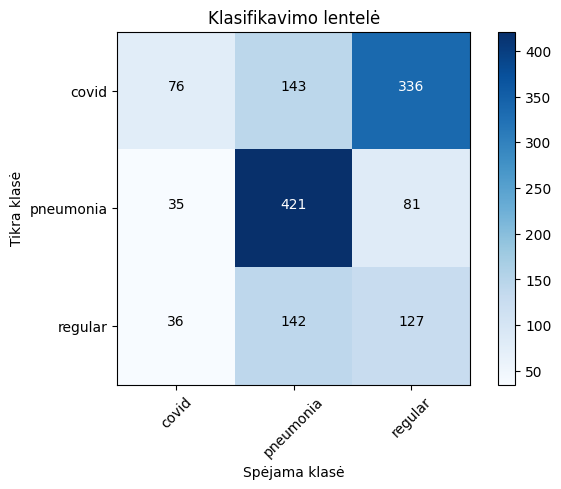

Found 1397 images belonging to 3 classes.


<ipython-input-38-4a9718826b62>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 83ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.55      0.13      0.21       555
   pneumonia       0.83      0.69      0.75       537
     regular       0.29      0.76      0.42       305

    accuracy                           0.49      1397
   macro avg       0.55      0.53      0.46      1397
weighted avg       0.60      0.49      0.47      1397

Accuracy: 0.4853256979241231
Specificity for covid: 0.93
Specificity for pneumonia: 0.91
Specificity for regular: 0.47
Macro-average Specificity: 0.77


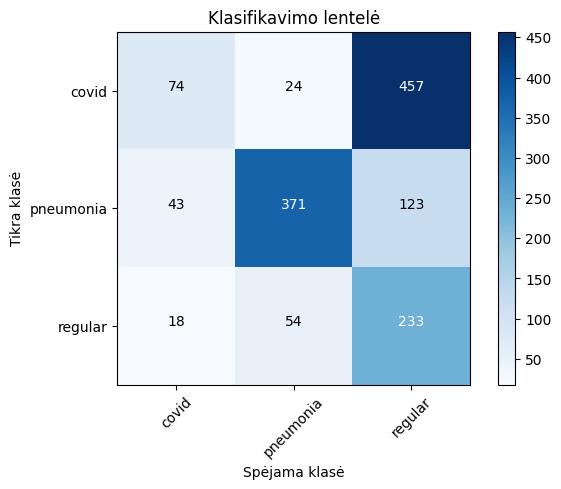

Final Metrics Across All Folds:
Average Accuracy: 0.46 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.49 ± 0.07
Class covid - Average Recall: 0.14 ± 0.01
Class covid - Average F1 Score: 0.21 ± 0.01
Class pneumonia - Average Precision: 0.73 ± 0.08
Class pneumonia - Average Recall: 0.74 ± 0.03
Class pneumonia - Average F1 Score: 0.73 ± 0.03
Class regular - Average Precision: 0.25 ± 0.02
Class regular - Average Recall: 0.57 ± 0.12
Class regular - Average F1 Score: 0.35 ± 0.04


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_sgd_0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal SGD + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-39-ee7cb2b82edd>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 82ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.82      0.34      0.48       555
   pneumonia       0.61      0.80      0.70       537
     regular       0.41      0.62      0.49       305

    accuracy                           0.58      1397
   macro avg       0.61      0.59      0.56      1397
weighted avg       0.65      0.58      0.57      1397

Accuracy: 0.5798138869005011
Specificity for covid: 0.95
Specificity for pneumonia: 0.68
Specificity for regular: 0.75
Macro-average Specificity: 0.79


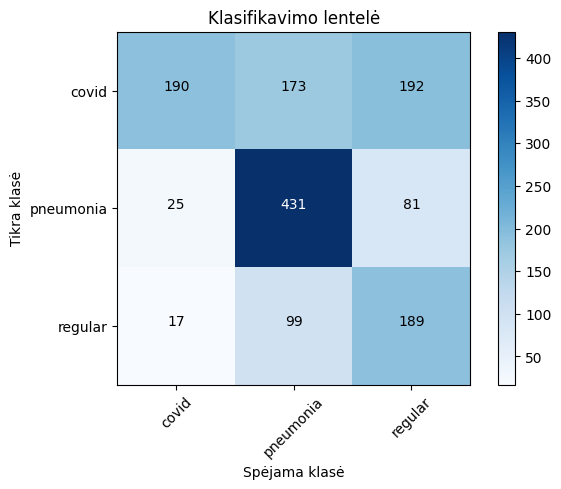

Found 1397 images belonging to 3 classes.


<ipython-input-39-ee7cb2b82edd>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 82ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.67      0.26      0.37       555
   pneumonia       0.69      0.75      0.72       537
     regular       0.30      0.59      0.40       305

    accuracy                           0.52      1397
   macro avg       0.55      0.53      0.50      1397
weighted avg       0.60      0.52      0.51      1397

Accuracy: 0.5211166785969935
Specificity for covid: 0.92
Specificity for pneumonia: 0.79
Specificity for regular: 0.62
Macro-average Specificity: 0.77


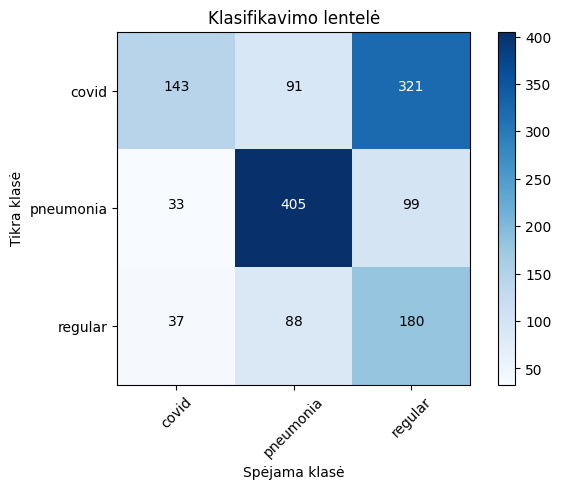

Found 1397 images belonging to 3 classes.


<ipython-input-39-ee7cb2b82edd>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.77      0.23      0.35       555
   pneumonia       0.75      0.71      0.73       537
     regular       0.36      0.85      0.50       305

    accuracy                           0.55      1397
   macro avg       0.63      0.60      0.53      1397
weighted avg       0.67      0.55      0.53      1397

Accuracy: 0.5483178239083751
Specificity for covid: 0.95
Specificity for pneumonia: 0.86
Specificity for regular: 0.57
Macro-average Specificity: 0.79


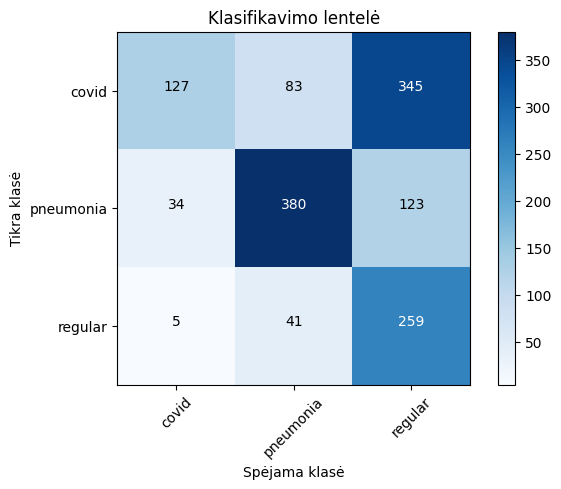

Found 1397 images belonging to 3 classes.


<ipython-input-39-ee7cb2b82edd>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.59      0.38      0.46       555
   pneumonia       0.62      0.82      0.71       537
     regular       0.25      0.27      0.26       305

    accuracy                           0.52      1397
   macro avg       0.49      0.49      0.48      1397
weighted avg       0.53      0.52      0.51      1397

Accuracy: 0.5246957766642806
Specificity for covid: 0.82
Specificity for pneumonia: 0.68
Specificity for regular: 0.78
Macro-average Specificity: 0.76


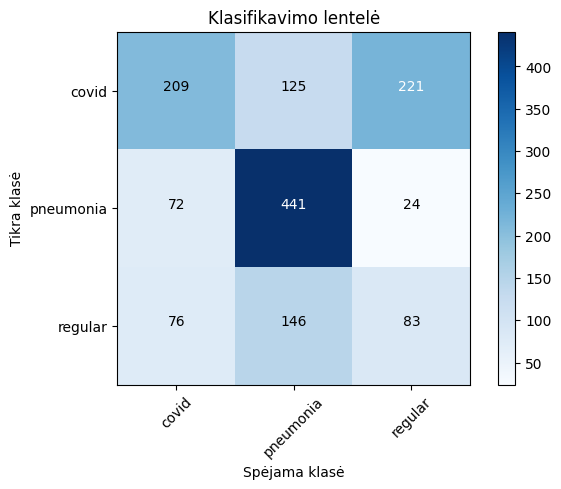

Found 1397 images belonging to 3 classes.


<ipython-input-39-ee7cb2b82edd>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.55      0.21      0.30       555
   pneumonia       0.63      0.76      0.69       537
     regular       0.38      0.68      0.49       305

    accuracy                           0.52      1397
   macro avg       0.52      0.55      0.49      1397
weighted avg       0.54      0.52      0.49      1397

Accuracy: 0.5211166785969935
Specificity for covid: 0.89
Specificity for pneumonia: 0.73
Specificity for regular: 0.69
Macro-average Specificity: 0.77


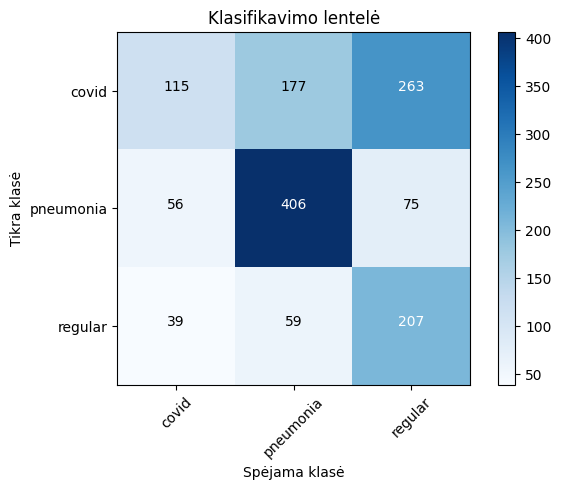

Final Metrics Across All Folds:
Average Accuracy: 0.54 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.68 ± 0.10
Class covid - Average Recall: 0.28 ± 0.07
Class covid - Average F1 Score: 0.39 ± 0.07
Class pneumonia - Average Precision: 0.66 ± 0.05
Class pneumonia - Average Recall: 0.77 ± 0.04
Class pneumonia - Average F1 Score: 0.71 ± 0.02
Class regular - Average Precision: 0.34 ± 0.06
Class regular - Average Recall: 0.60 ± 0.19
Class regular - Average F1 Score: 0.43 ± 0.09


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_sgd_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross RMSProp + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-42-5ca71553dc50>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.81      0.53      0.64       555
   pneumonia       0.77      0.72      0.74       537
     regular       0.41      0.72      0.52       305

    accuracy                           0.64      1397
   macro avg       0.66      0.65      0.63      1397
weighted avg       0.71      0.64      0.65      1397

Accuracy: 0.6420901932712957
Specificity for covid: 0.92
Specificity for pneumonia: 0.87
Specificity for regular: 0.71
Macro-average Specificity: 0.83


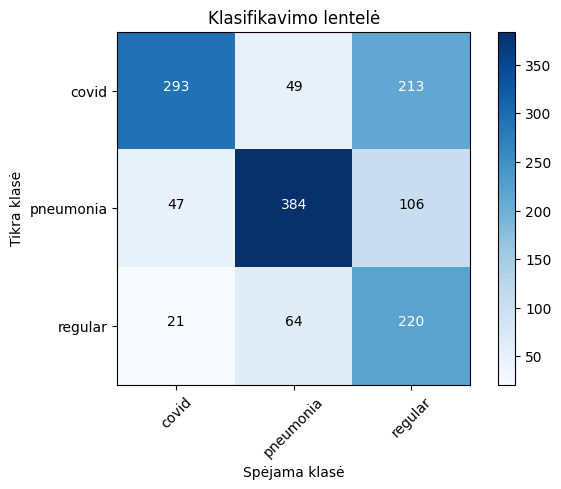

Found 1397 images belonging to 3 classes.


<ipython-input-42-5ca71553dc50>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 77ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.75      0.45      0.56       555
   pneumonia       0.66      0.74      0.70       537
     regular       0.43      0.65      0.52       305

    accuracy                           0.60      1397
   macro avg       0.61      0.61      0.59      1397
weighted avg       0.65      0.60      0.60      1397

Accuracy: 0.6048675733715104
Specificity for covid: 0.90
Specificity for pneumonia: 0.76
Specificity for regular: 0.76
Macro-average Specificity: 0.81


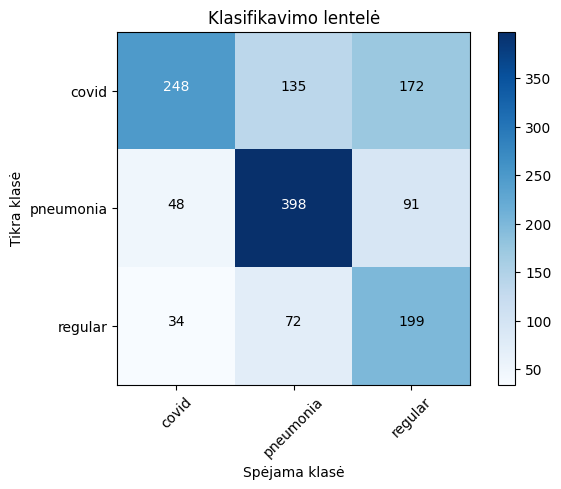

Found 1397 images belonging to 3 classes.


<ipython-input-42-5ca71553dc50>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.78      0.47      0.59       555
   pneumonia       0.82      0.70      0.76       537
     regular       0.41      0.81      0.55       305

    accuracy                           0.63      1397
   macro avg       0.67      0.66      0.63      1397
weighted avg       0.72      0.63      0.64      1397

Accuracy: 0.6349319971367215
Specificity for covid: 0.91
Specificity for pneumonia: 0.91
Specificity for regular: 0.67
Macro-average Specificity: 0.83


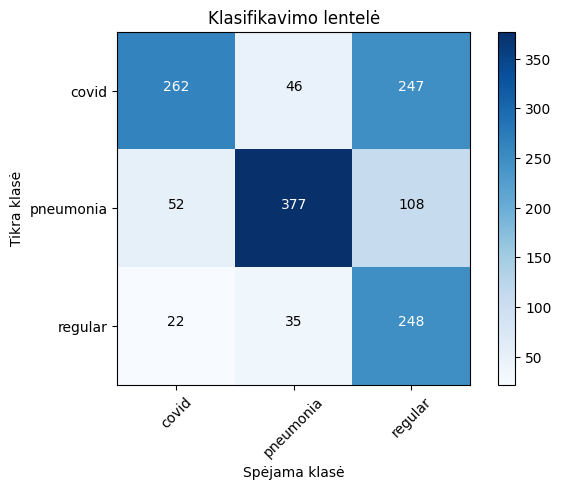

Found 1397 images belonging to 3 classes.


<ipython-input-42-5ca71553dc50>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 83ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.61      0.35      0.44       555
   pneumonia       0.75      0.72      0.74       537
     regular       0.38      0.71      0.50       305

    accuracy                           0.57      1397
   macro avg       0.58      0.59      0.56      1397
weighted avg       0.62      0.57      0.57      1397

Accuracy: 0.5705082319255548
Specificity for covid: 0.86
Specificity for pneumonia: 0.85
Specificity for regular: 0.68
Macro-average Specificity: 0.80


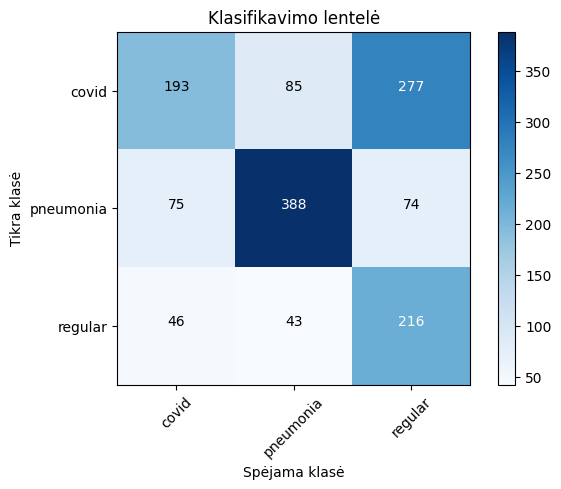

Found 1397 images belonging to 3 classes.


<ipython-input-42-5ca71553dc50>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 83ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.79      0.45      0.58       555
   pneumonia       0.71      0.73      0.72       537
     regular       0.43      0.74      0.54       305

    accuracy                           0.62      1397
   macro avg       0.64      0.64      0.61      1397
weighted avg       0.68      0.62      0.62      1397

Accuracy: 0.6213314244810307
Specificity for covid: 0.92
Specificity for pneumonia: 0.82
Specificity for regular: 0.72
Macro-average Specificity: 0.82


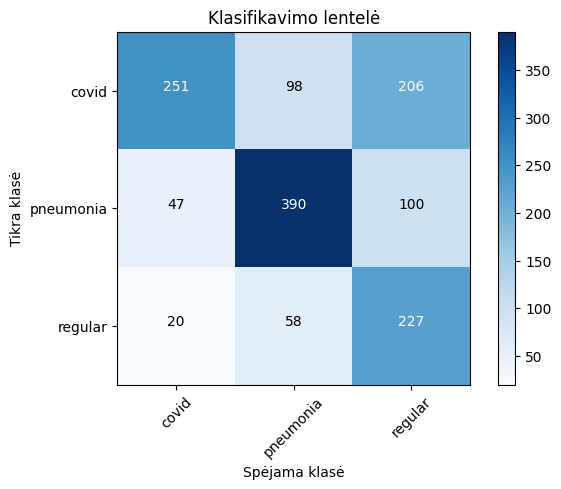

Final Metrics Across All Folds:
Average Accuracy: 0.61 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.75 ± 0.07
Class covid - Average Recall: 0.45 ± 0.06
Class covid - Average F1 Score: 0.56 ± 0.06
Class pneumonia - Average Precision: 0.74 ± 0.06
Class pneumonia - Average Recall: 0.72 ± 0.01
Class pneumonia - Average F1 Score: 0.73 ± 0.02
Class regular - Average Precision: 0.41 ± 0.02
Class regular - Average Recall: 0.73 ± 0.05
Class regular - Average F1 Score: 0.52 ± 0.02


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_rmsprop_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal RMSProp + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-43-5068fd35777a>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.73      0.30      0.42       555
   pneumonia       0.78      0.72      0.75       537
     regular       0.40      0.88      0.55       305

    accuracy                           0.59      1397
   macro avg       0.64      0.63      0.57      1397
weighted avg       0.68      0.59      0.57      1397

Accuracy: 0.5862562634216177
Specificity for covid: 0.93
Specificity for pneumonia: 0.87
Specificity for regular: 0.63
Macro-average Specificity: 0.81


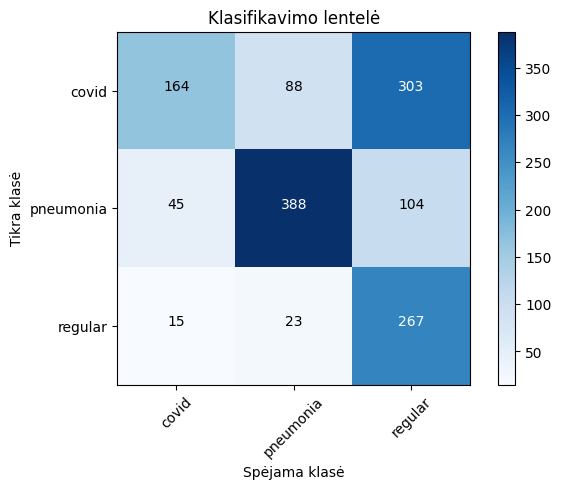

Found 1397 images belonging to 3 classes.


<ipython-input-43-5068fd35777a>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 82ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.74      0.40      0.52       555
   pneumonia       0.71      0.74      0.72       537
     regular       0.46      0.81      0.59       305

    accuracy                           0.62      1397
   macro avg       0.64      0.65      0.61      1397
weighted avg       0.67      0.62      0.61      1397

Accuracy: 0.6191839656406586
Specificity for covid: 0.91
Specificity for pneumonia: 0.81
Specificity for regular: 0.73
Macro-average Specificity: 0.82


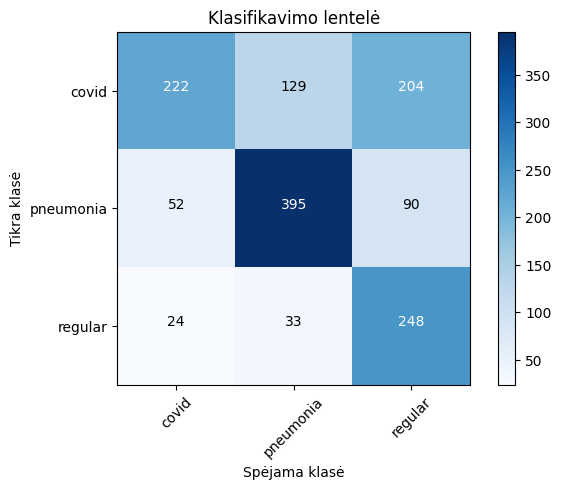

Found 1397 images belonging to 3 classes.


<ipython-input-43-5068fd35777a>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.78      0.40      0.53       555
   pneumonia       0.88      0.70      0.78       537
     regular       0.41      0.92      0.57       305

    accuracy                           0.63      1397
   macro avg       0.69      0.68      0.63      1397
weighted avg       0.74      0.63      0.64      1397

Accuracy: 0.6313528990694345
Specificity for covid: 0.92
Specificity for pneumonia: 0.94
Specificity for regular: 0.64
Macro-average Specificity: 0.83


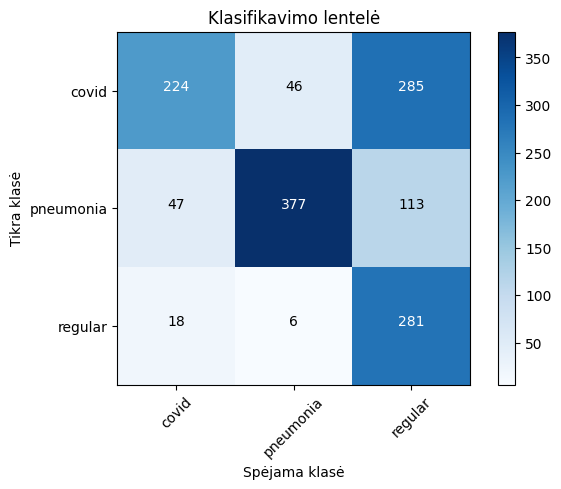

Found 1397 images belonging to 3 classes.


<ipython-input-43-5068fd35777a>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.76      0.35      0.48       555
   pneumonia       0.64      0.77      0.70       537
     regular       0.42      0.68      0.52       305

    accuracy                           0.58      1397
   macro avg       0.61      0.60      0.57      1397
weighted avg       0.64      0.58      0.57      1397

Accuracy: 0.5841088045812455
Specificity for covid: 0.93
Specificity for pneumonia: 0.73
Specificity for regular: 0.74
Macro-average Specificity: 0.80


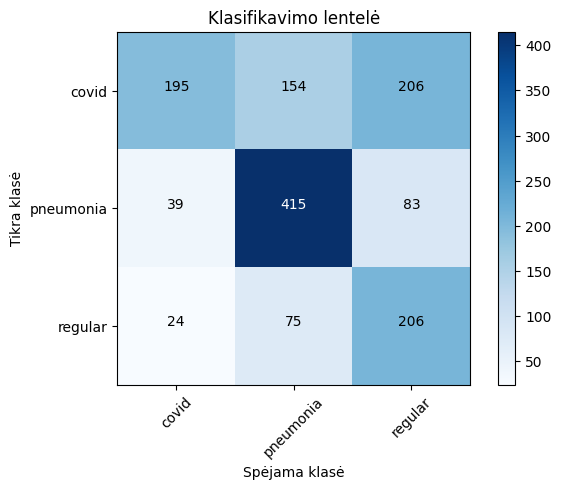

Found 1397 images belonging to 3 classes.


<ipython-input-43-5068fd35777a>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 77ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.70      0.29      0.41       555
   pneumonia       0.67      0.74      0.71       537
     regular       0.39      0.73      0.51       305

    accuracy                           0.56      1397
   macro avg       0.59      0.59      0.54      1397
weighted avg       0.62      0.56      0.55      1397

Accuracy: 0.560486757337151
Specificity for covid: 0.92
Specificity for pneumonia: 0.77
Specificity for regular: 0.68
Macro-average Specificity: 0.79


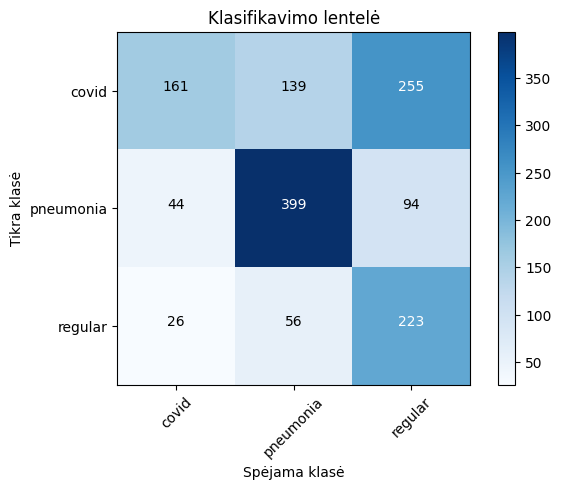

Final Metrics Across All Folds:
Average Accuracy: 0.60 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.74 ± 0.03
Class covid - Average Recall: 0.35 ± 0.05
Class covid - Average F1 Score: 0.47 ± 0.05
Class pneumonia - Average Precision: 0.74 ± 0.08
Class pneumonia - Average Recall: 0.74 ± 0.02
Class pneumonia - Average F1 Score: 0.73 ± 0.03
Class regular - Average Precision: 0.41 ± 0.02
Class regular - Average Recall: 0.80 ± 0.09
Class regular - Average F1 Score: 0.55 ± 0.03


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_rmsprop_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross Adam + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-45-7cd04aaadb11>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 82ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.79      0.39      0.52       555
   pneumonia       0.68      0.71      0.70       537
     regular       0.43      0.79      0.55       305

    accuracy                           0.60      1397
   macro avg       0.63      0.63      0.59      1397
weighted avg       0.67      0.60      0.60      1397

Accuracy: 0.6005726556907659
Specificity for covid: 0.93
Specificity for pneumonia: 0.79
Specificity for regular: 0.70
Macro-average Specificity: 0.81


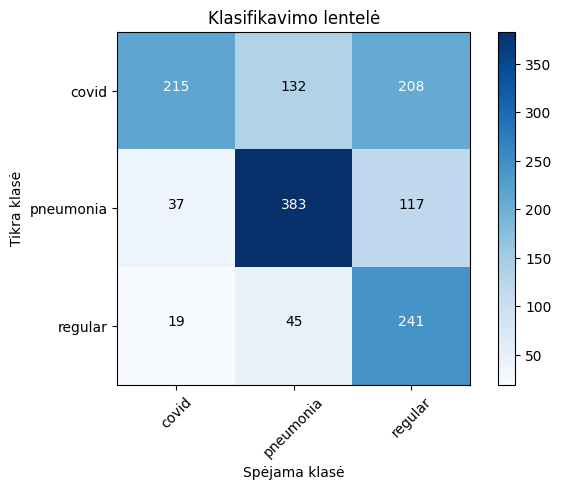

Found 1397 images belonging to 3 classes.


<ipython-input-45-7cd04aaadb11>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.77      0.41      0.53       555
   pneumonia       0.76      0.74      0.75       537
     regular       0.43      0.82      0.57       305

    accuracy                           0.63      1397
   macro avg       0.65      0.66      0.62      1397
weighted avg       0.69      0.63      0.62      1397

Accuracy: 0.6256263421617753
Specificity for covid: 0.92
Specificity for pneumonia: 0.85
Specificity for regular: 0.70
Macro-average Specificity: 0.82


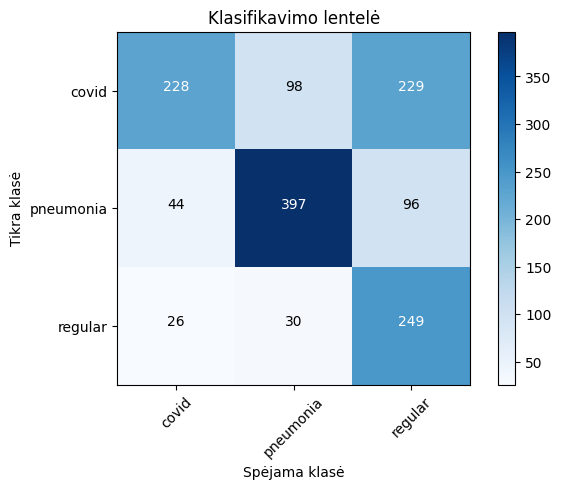

Found 1397 images belonging to 3 classes.


<ipython-input-45-7cd04aaadb11>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 83ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.73      0.45      0.56       555
   pneumonia       0.77      0.68      0.72       537
     regular       0.43      0.81      0.56       305

    accuracy                           0.62      1397
   macro avg       0.64      0.65      0.61      1397
weighted avg       0.68      0.62      0.62      1397

Accuracy: 0.6191839656406586
Specificity for covid: 0.89
Specificity for pneumonia: 0.87
Specificity for regular: 0.70
Macro-average Specificity: 0.82


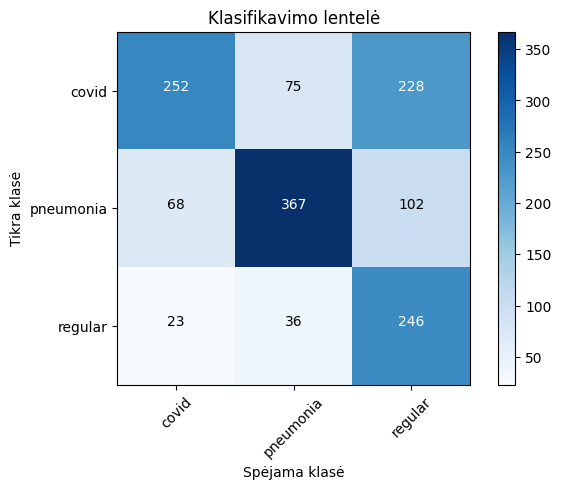

Found 1397 images belonging to 3 classes.


<ipython-input-45-7cd04aaadb11>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.71      0.54      0.61       555
   pneumonia       0.80      0.70      0.75       537
     regular       0.44      0.74      0.55       305

    accuracy                           0.64      1397
   macro avg       0.65      0.66      0.64      1397
weighted avg       0.69      0.64      0.65      1397

Accuracy: 0.642806012884753
Specificity for covid: 0.86
Specificity for pneumonia: 0.89
Specificity for regular: 0.74
Macro-average Specificity: 0.83


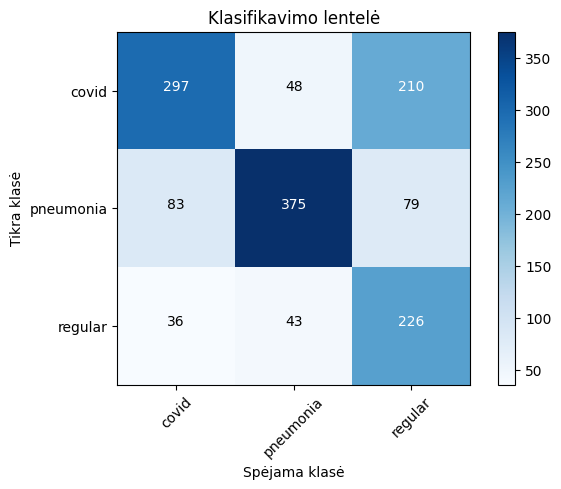

Found 1397 images belonging to 3 classes.


<ipython-input-45-7cd04aaadb11>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.76      0.31      0.44       555
   pneumonia       0.63      0.76      0.69       537
     regular       0.44      0.76      0.56       305

    accuracy                           0.58      1397
   macro avg       0.61      0.61      0.56      1397
weighted avg       0.64      0.58      0.56      1397

Accuracy: 0.5819613457408733
Specificity for covid: 0.93
Specificity for pneumonia: 0.73
Specificity for regular: 0.73
Macro-average Specificity: 0.80


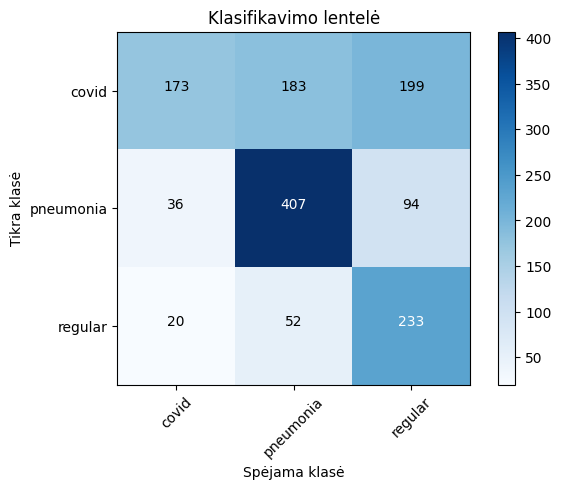

Final Metrics Across All Folds:
Average Accuracy: 0.61 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.75 ± 0.03
Class covid - Average Recall: 0.42 ± 0.07
Class covid - Average F1 Score: 0.53 ± 0.06
Class pneumonia - Average Precision: 0.73 ± 0.06
Class pneumonia - Average Recall: 0.72 ± 0.03
Class pneumonia - Average F1 Score: 0.72 ± 0.02
Class regular - Average Precision: 0.43 ± 0.01
Class regular - Average Recall: 0.78 ± 0.03
Class regular - Average F1 Score: 0.56 ± 0.01


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_adam_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal Adam + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-46-d9bbc41030a5>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.72      0.40      0.51       555
   pneumonia       0.70      0.72      0.71       537
     regular       0.48      0.84      0.61       305

    accuracy                           0.62      1397
   macro avg       0.63      0.65      0.61      1397
weighted avg       0.66      0.62      0.61      1397

Accuracy: 0.6191839656406586
Specificity for covid: 0.90
Specificity for pneumonia: 0.81
Specificity for regular: 0.74
Macro-average Specificity: 0.82


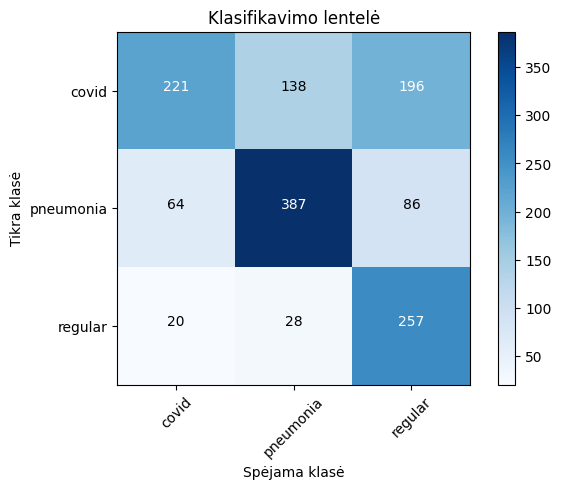

Found 1397 images belonging to 3 classes.


<ipython-input-46-d9bbc41030a5>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.73      0.43      0.54       555
   pneumonia       0.77      0.70      0.73       537
     regular       0.41      0.77      0.53       305

    accuracy                           0.61      1397
   macro avg       0.64      0.63      0.60      1397
weighted avg       0.67      0.61      0.61      1397

Accuracy: 0.6098783106657122
Specificity for covid: 0.90
Specificity for pneumonia: 0.87
Specificity for regular: 0.69
Macro-average Specificity: 0.82


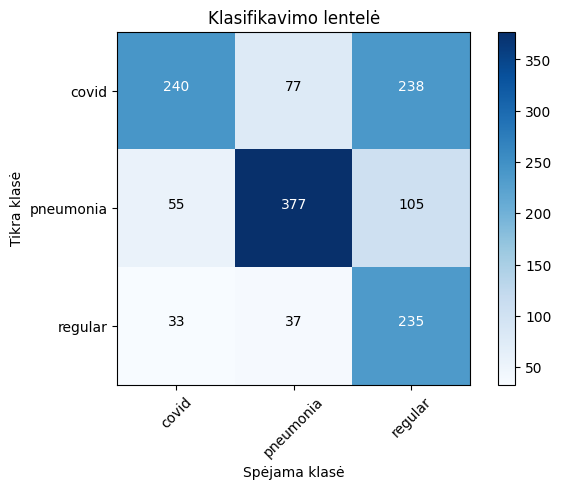

Found 1397 images belonging to 3 classes.


<ipython-input-46-d9bbc41030a5>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.77      0.39      0.51       555
   pneumonia       0.70      0.72      0.71       537
     regular       0.39      0.72      0.51       305

    accuracy                           0.59      1397
   macro avg       0.62      0.61      0.58      1397
weighted avg       0.66      0.59      0.59      1397

Accuracy: 0.5876879026485325
Specificity for covid: 0.93
Specificity for pneumonia: 0.80
Specificity for regular: 0.68
Macro-average Specificity: 0.80


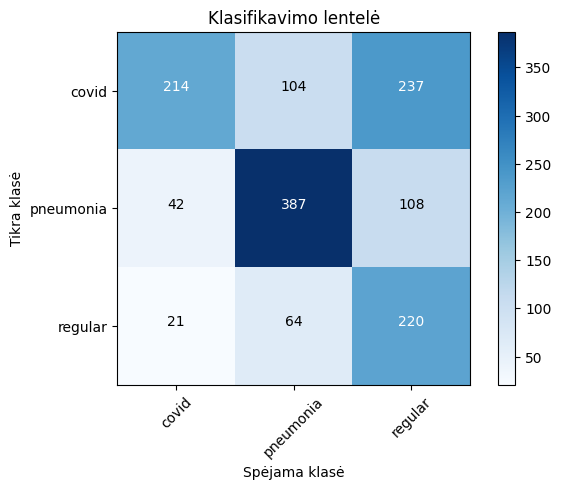

Found 1397 images belonging to 3 classes.


<ipython-input-46-d9bbc41030a5>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.81      0.40      0.54       555
   pneumonia       0.70      0.73      0.72       537
     regular       0.45      0.83      0.58       305

    accuracy                           0.62      1397
   macro avg       0.66      0.65      0.61      1397
weighted avg       0.69      0.62      0.62      1397

Accuracy: 0.6227630637079457
Specificity for covid: 0.94
Specificity for pneumonia: 0.80
Specificity for regular: 0.72
Macro-average Specificity: 0.82


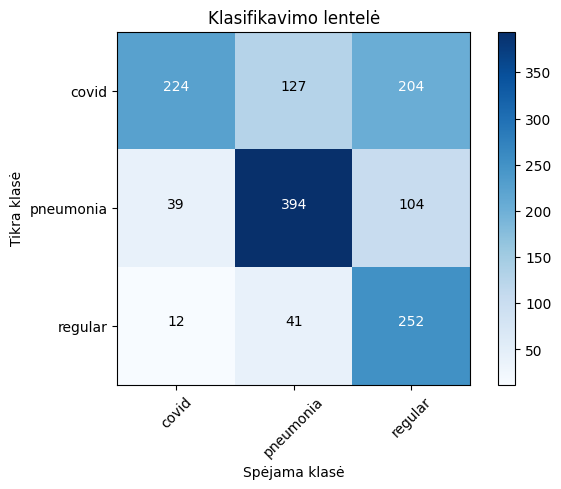

Found 1397 images belonging to 3 classes.


<ipython-input-46-d9bbc41030a5>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.64      0.26      0.37       555
   pneumonia       0.81      0.71      0.76       537
     regular       0.32      0.74      0.45       305

    accuracy                           0.54      1397
   macro avg       0.59      0.57      0.52      1397
weighted avg       0.63      0.54      0.54      1397

Accuracy: 0.5375805297065139
Specificity for covid: 0.90
Specificity for pneumonia: 0.89
Specificity for regular: 0.57
Macro-average Specificity: 0.79


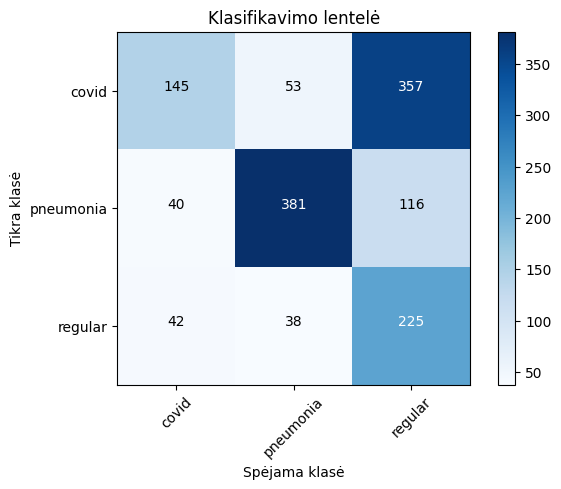

Final Metrics Across All Folds:
Average Accuracy: 0.60 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.74 ± 0.06
Class covid - Average Recall: 0.38 ± 0.06
Class covid - Average F1 Score: 0.50 ± 0.06
Class pneumonia - Average Precision: 0.73 ± 0.04
Class pneumonia - Average Recall: 0.72 ± 0.01
Class pneumonia - Average F1 Score: 0.72 ± 0.02
Class regular - Average Precision: 0.41 ± 0.05
Class regular - Average Recall: 0.78 ± 0.05
Class regular - Average F1 Score: 0.54 ± 0.06


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_adam_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross Nadam + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-47-72f8b844d695>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 77ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.76      0.49      0.60       555
   pneumonia       0.77      0.70      0.73       537
     regular       0.43      0.77      0.55       305

    accuracy                           0.63      1397
   macro avg       0.65      0.66      0.63      1397
weighted avg       0.69      0.63      0.64      1397

Accuracy: 0.6349319971367215
Specificity for covid: 0.90
Specificity for pneumonia: 0.87
Specificity for regular: 0.72
Macro-average Specificity: 0.83


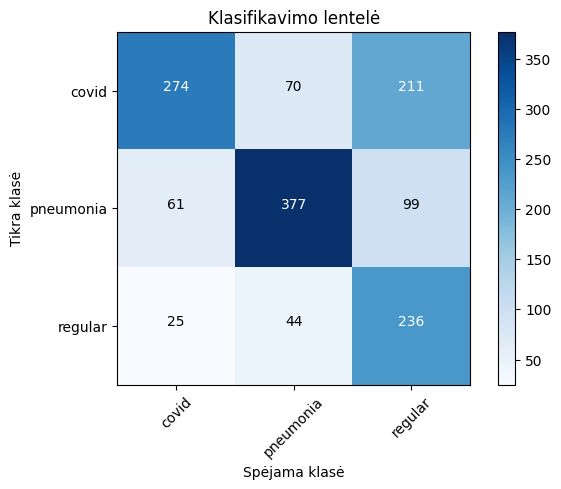

Found 1397 images belonging to 3 classes.


<ipython-input-47-72f8b844d695>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.78      0.43      0.56       555
   pneumonia       0.78      0.72      0.75       537
     regular       0.41      0.80      0.55       305

    accuracy                           0.62      1397
   macro avg       0.66      0.65      0.62      1397
weighted avg       0.70      0.62      0.63      1397

Accuracy: 0.6241947029348605
Specificity for covid: 0.92
Specificity for pneumonia: 0.87
Specificity for regular: 0.68
Macro-average Specificity: 0.82


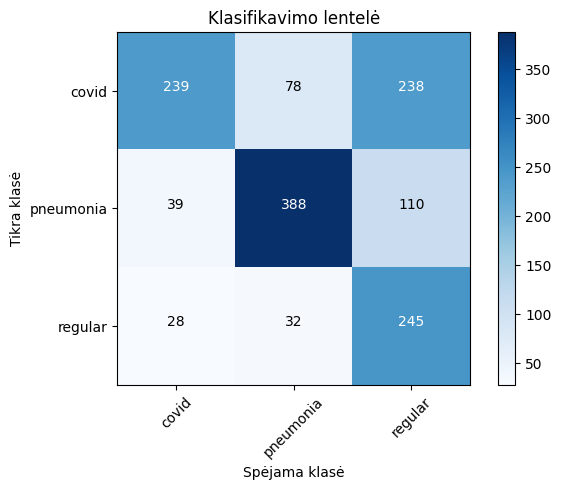

Found 1397 images belonging to 3 classes.


<ipython-input-47-72f8b844d695>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 78ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.77      0.51      0.62       555
   pneumonia       0.78      0.70      0.74       537
     regular       0.46      0.81      0.58       305

    accuracy                           0.65      1397
   macro avg       0.67      0.68      0.65      1397
weighted avg       0.71      0.65      0.66      1397

Accuracy: 0.651395848246242
Specificity for covid: 0.90
Specificity for pneumonia: 0.87
Specificity for regular: 0.73
Macro-average Specificity: 0.83


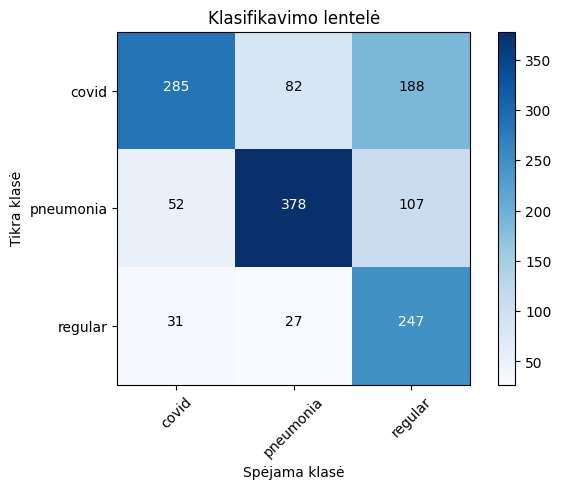

Found 1397 images belonging to 3 classes.


<ipython-input-47-72f8b844d695>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.72      0.35      0.47       555
   pneumonia       0.73      0.75      0.74       537
     regular       0.41      0.77      0.54       305

    accuracy                           0.60      1397
   macro avg       0.62      0.63      0.58      1397
weighted avg       0.66      0.60      0.59      1397

Accuracy: 0.5977093772369363
Specificity for covid: 0.91
Specificity for pneumonia: 0.82
Specificity for regular: 0.69
Macro-average Specificity: 0.81


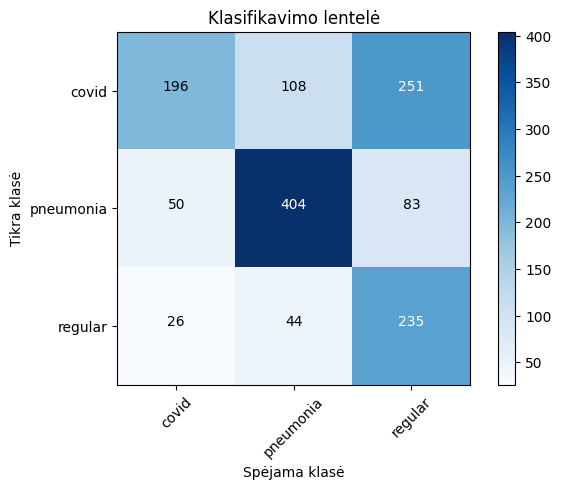

Found 1397 images belonging to 3 classes.


<ipython-input-47-72f8b844d695>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.77      0.36      0.49       555
   pneumonia       0.59      0.77      0.67       537
     regular       0.47      0.68      0.55       305

    accuracy                           0.59      1397
   macro avg       0.61      0.60      0.57      1397
weighted avg       0.64      0.59      0.57      1397

Accuracy: 0.5855404438081604
Specificity for covid: 0.93
Specificity for pneumonia: 0.67
Specificity for regular: 0.79
Macro-average Specificity: 0.79


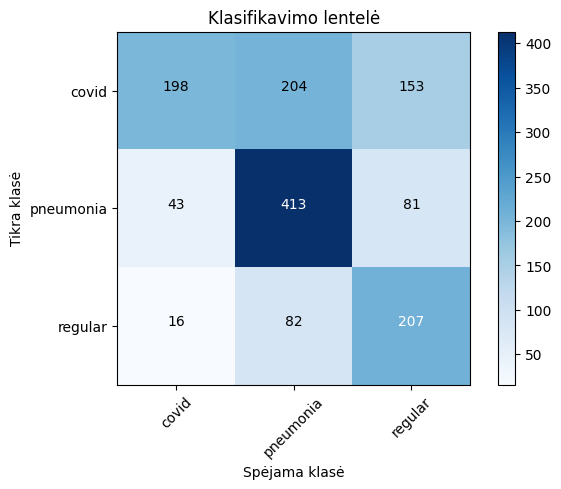

Final Metrics Across All Folds:
Average Accuracy: 0.62 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.76 ± 0.02
Class covid - Average Recall: 0.43 ± 0.07
Class covid - Average F1 Score: 0.55 ± 0.06
Class pneumonia - Average Precision: 0.73 ± 0.07
Class pneumonia - Average Recall: 0.73 ± 0.03
Class pneumonia - Average F1 Score: 0.73 ± 0.03
Class regular - Average Precision: 0.44 ± 0.02
Class regular - Average Recall: 0.77 ± 0.05
Class regular - Average F1 Score: 0.56 ± 0.02


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_nadam_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal Nadam + 0.0001

Found 1397 images belonging to 3 classes.


<ipython-input-48-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 76ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.86      0.56      0.68       555
   pneumonia       0.77      0.72      0.74       537
     regular       0.44      0.77      0.56       305

    accuracy                           0.67      1397
   macro avg       0.69      0.68      0.66      1397
weighted avg       0.73      0.67      0.68      1397

Accuracy: 0.6664280601288475
Specificity for covid: 0.94
Specificity for pneumonia: 0.86
Specificity for regular: 0.73
Macro-average Specificity: 0.84


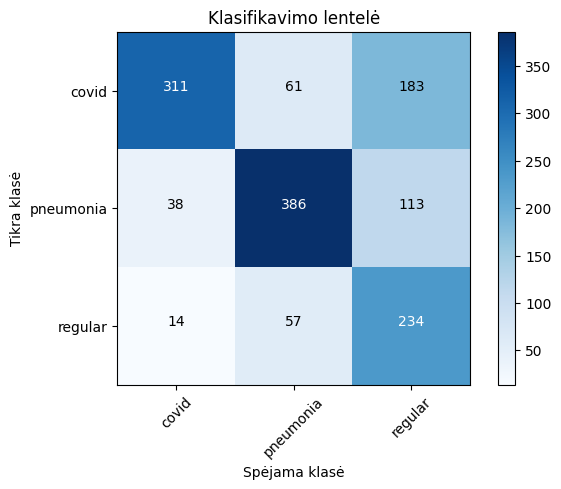

Found 1397 images belonging to 3 classes.


<ipython-input-48-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.80      0.52      0.63       555
   pneumonia       0.77      0.73      0.75       537
     regular       0.45      0.77      0.57       305

    accuracy                           0.65      1397
   macro avg       0.67      0.67      0.65      1397
weighted avg       0.71      0.65      0.66      1397

Accuracy: 0.654974946313529
Specificity for covid: 0.91
Specificity for pneumonia: 0.86
Specificity for regular: 0.73
Macro-average Specificity: 0.84


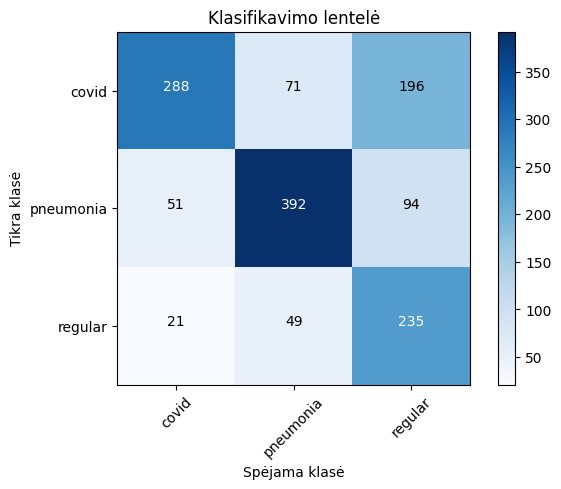

Found 1397 images belonging to 3 classes.


<ipython-input-48-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 76ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.76      0.35      0.48       555
   pneumonia       0.72      0.74      0.73       537
     regular       0.41      0.79      0.54       305

    accuracy                           0.60      1397
   macro avg       0.63      0.63      0.58      1397
weighted avg       0.67      0.60      0.59      1397

Accuracy: 0.595561918396564
Specificity for covid: 0.93
Specificity for pneumonia: 0.82
Specificity for regular: 0.68
Macro-average Specificity: 0.81


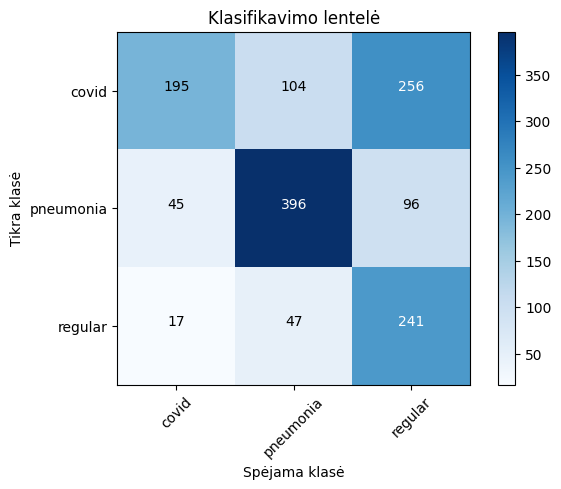

Found 1397 images belonging to 3 classes.


<ipython-input-48-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.78      0.33      0.47       555
   pneumonia       0.76      0.73      0.74       537
     regular       0.37      0.79      0.51       305

    accuracy                           0.58      1397
   macro avg       0.64      0.62      0.57      1397
weighted avg       0.68      0.58      0.58      1397

Accuracy: 0.5848246241947029
Specificity for covid: 0.94
Specificity for pneumonia: 0.85
Specificity for regular: 0.63
Macro-average Specificity: 0.81


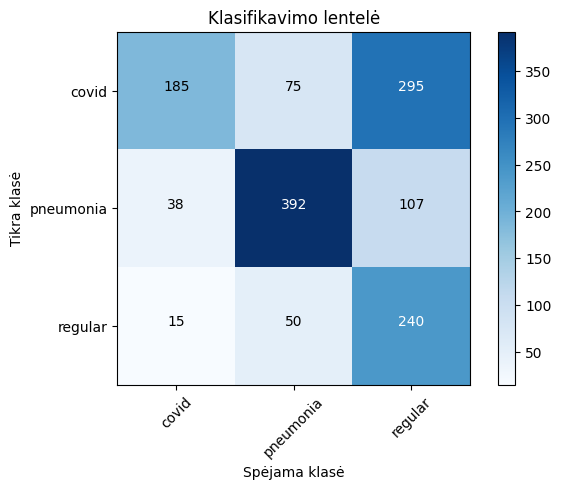

Found 1397 images belonging to 3 classes.


<ipython-input-48-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.67      0.37      0.48       555
   pneumonia       0.65      0.74      0.69       537
     regular       0.46      0.74      0.57       305

    accuracy                           0.59      1397
   macro avg       0.59      0.61      0.58      1397
weighted avg       0.62      0.59      0.58      1397

Accuracy: 0.5905511811023622
Specificity for covid: 0.88
Specificity for pneumonia: 0.76
Specificity for regular: 0.76
Macro-average Specificity: 0.80


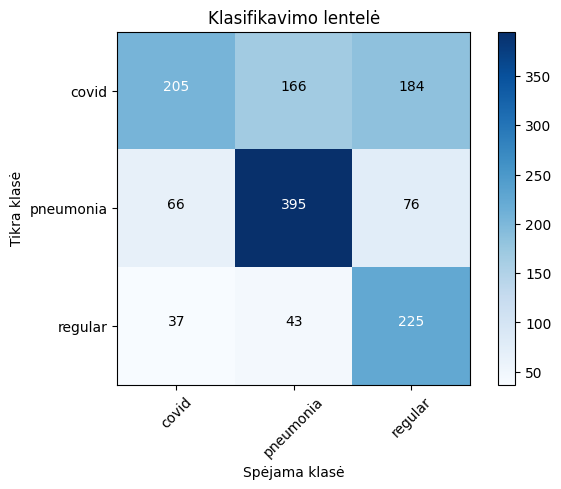

Final Metrics Across All Folds:
Average Accuracy: 0.62 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.77 ± 0.06
Class covid - Average Recall: 0.43 ± 0.09
Class covid - Average F1 Score: 0.55 ± 0.09
Class pneumonia - Average Precision: 0.73 ± 0.04
Class pneumonia - Average Recall: 0.73 ± 0.01
Class pneumonia - Average F1 Score: 0.73 ± 0.02
Class regular - Average Precision: 0.43 ± 0.03
Class regular - Average Recall: 0.77 ± 0.02
Class regular - Average F1 Score: 0.55 ± 0.02


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_nadam_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross Nadam + 0.0002

Found 1397 images belonging to 3 classes.


<ipython-input-49-37ca4b962efc>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 77ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.82      0.45      0.58       555
   pneumonia       0.72      0.71      0.72       537
     regular       0.46      0.85      0.60       305

    accuracy                           0.64      1397
   macro avg       0.67      0.67      0.63      1397
weighted avg       0.70      0.64      0.64      1397

Accuracy: 0.6363636363636364
Specificity for covid: 0.93
Specificity for pneumonia: 0.83
Specificity for regular: 0.72
Macro-average Specificity: 0.83


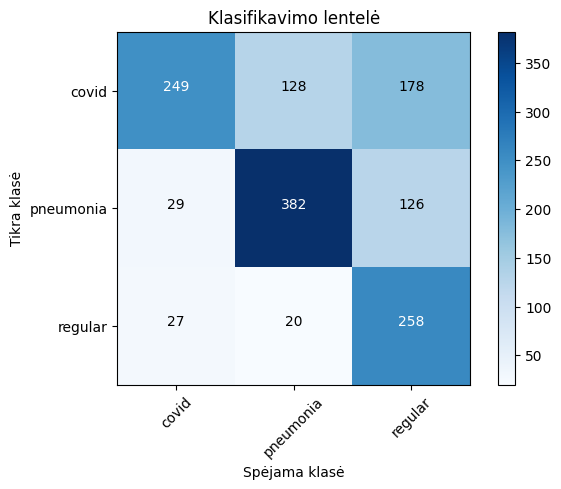

Found 1397 images belonging to 3 classes.


<ipython-input-49-37ca4b962efc>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 87ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.83      0.54      0.65       555
   pneumonia       0.80      0.71      0.75       537
     regular       0.44      0.81      0.57       305

    accuracy                           0.66      1397
   macro avg       0.69      0.69      0.66      1397
weighted avg       0.73      0.66      0.67      1397

Accuracy: 0.6642806012884753
Specificity for covid: 0.93
Specificity for pneumonia: 0.89
Specificity for regular: 0.71
Macro-average Specificity: 0.84


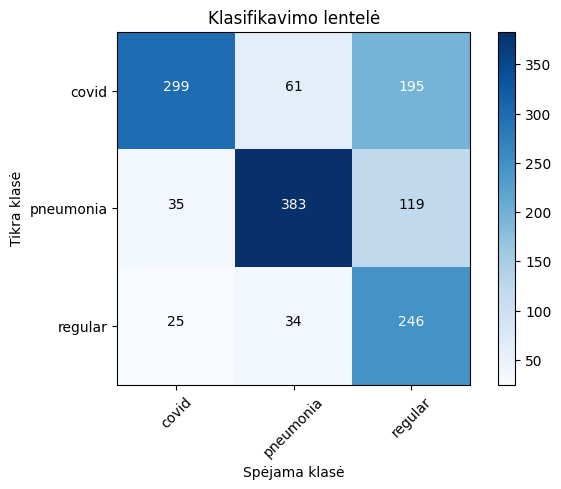

Found 1397 images belonging to 3 classes.


<ipython-input-49-37ca4b962efc>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 71ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.77      0.60      0.67       555
   pneumonia       0.86      0.70      0.77       537
     regular       0.48      0.82      0.60       305

    accuracy                           0.69      1397
   macro avg       0.70      0.71      0.68      1397
weighted avg       0.74      0.69      0.69      1397

Accuracy: 0.6857551896921976
Specificity for covid: 0.88
Specificity for pneumonia: 0.93
Specificity for regular: 0.75
Macro-average Specificity: 0.85


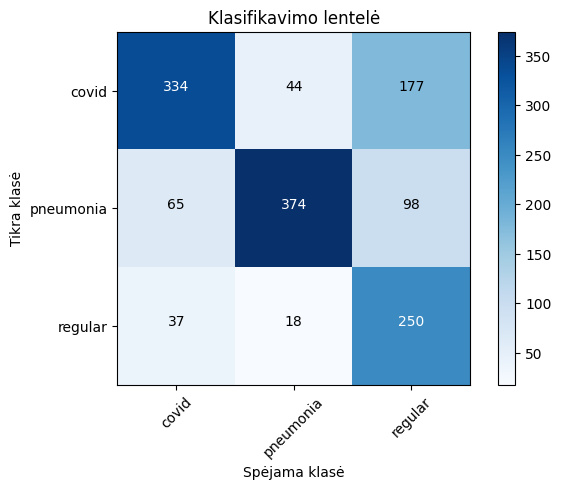

Found 1397 images belonging to 3 classes.


<ipython-input-49-37ca4b962efc>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 76ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.81      0.62      0.70       555
   pneumonia       0.79      0.72      0.75       537
     regular       0.48      0.75      0.59       305

    accuracy                           0.69      1397
   macro avg       0.69      0.70      0.68      1397
weighted avg       0.73      0.69      0.70      1397

Accuracy: 0.6893342877594846
Specificity for covid: 0.90
Specificity for pneumonia: 0.88
Specificity for regular: 0.78
Macro-average Specificity: 0.85


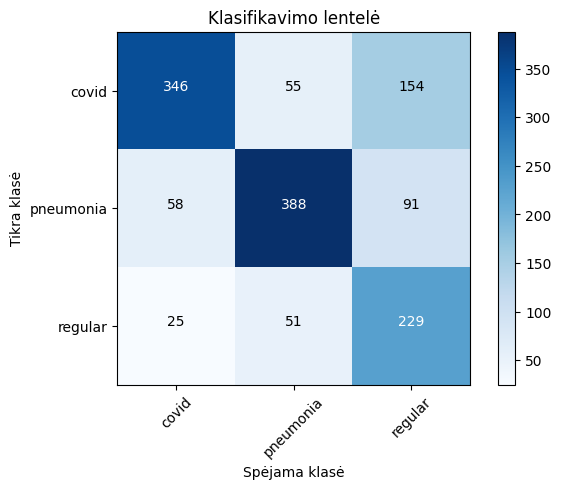

Found 1397 images belonging to 3 classes.


<ipython-input-49-37ca4b962efc>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.68      0.41      0.51       555
   pneumonia       0.75      0.75      0.75       537
     regular       0.41      0.70      0.52       305

    accuracy                           0.61      1397
   macro avg       0.61      0.62      0.59      1397
weighted avg       0.65      0.61      0.60      1397

Accuracy: 0.6055833929849678
Specificity for covid: 0.87
Specificity for pneumonia: 0.84
Specificity for regular: 0.72
Macro-average Specificity: 0.81


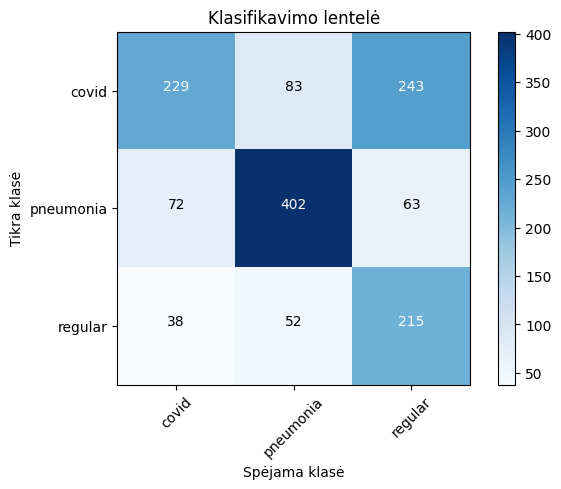

Final Metrics Across All Folds:
Average Accuracy: 0.66 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.78 ± 0.06
Class covid - Average Recall: 0.53 ± 0.08
Class covid - Average F1 Score: 0.62 ± 0.07
Class pneumonia - Average Precision: 0.78 ± 0.05
Class pneumonia - Average Recall: 0.72 ± 0.02
Class pneumonia - Average F1 Score: 0.75 ± 0.02
Class regular - Average Precision: 0.45 ± 0.03
Class regular - Average Recall: 0.79 ± 0.05
Class regular - Average F1 Score: 0.57 ± 0.03


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'cross_nadam_0.0002_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path)

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal Nadam + 0.0002

Found 1397 images belonging to 3 classes.


<ipython-input-50-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 79ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.86      0.56      0.68       555
   pneumonia       0.77      0.72      0.74       537
     regular       0.44      0.77      0.56       305

    accuracy                           0.67      1397
   macro avg       0.69      0.68      0.66      1397
weighted avg       0.73      0.67      0.68      1397

Accuracy: 0.6664280601288475
Specificity for covid: 0.94
Specificity for pneumonia: 0.86
Specificity for regular: 0.73
Macro-average Specificity: 0.84


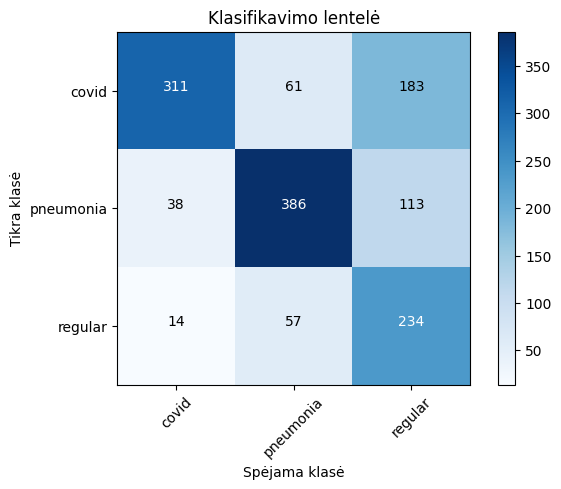

Found 1397 images belonging to 3 classes.


<ipython-input-50-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 81ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.80      0.52      0.63       555
   pneumonia       0.77      0.73      0.75       537
     regular       0.45      0.77      0.57       305

    accuracy                           0.65      1397
   macro avg       0.67      0.67      0.65      1397
weighted avg       0.71      0.65      0.66      1397

Accuracy: 0.654974946313529
Specificity for covid: 0.91
Specificity for pneumonia: 0.86
Specificity for regular: 0.73
Macro-average Specificity: 0.84


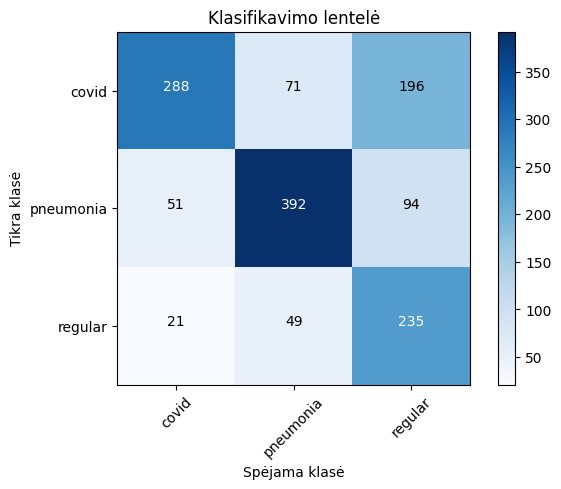

Found 1397 images belonging to 3 classes.


<ipython-input-50-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 80ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.76      0.35      0.48       555
   pneumonia       0.72      0.74      0.73       537
     regular       0.41      0.79      0.54       305

    accuracy                           0.60      1397
   macro avg       0.63      0.63      0.58      1397
weighted avg       0.67      0.60      0.59      1397

Accuracy: 0.595561918396564
Specificity for covid: 0.93
Specificity for pneumonia: 0.82
Specificity for regular: 0.68
Macro-average Specificity: 0.81


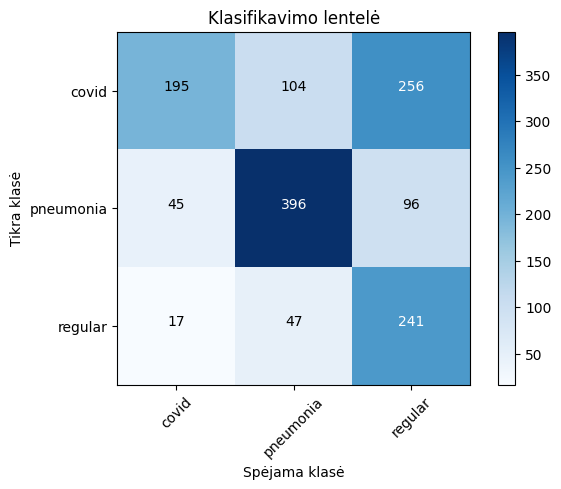

Found 1397 images belonging to 3 classes.


<ipython-input-50-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 77ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.78      0.33      0.47       555
   pneumonia       0.76      0.73      0.74       537
     regular       0.37      0.79      0.51       305

    accuracy                           0.58      1397
   macro avg       0.64      0.62      0.57      1397
weighted avg       0.68      0.58      0.58      1397

Accuracy: 0.5848246241947029
Specificity for covid: 0.94
Specificity for pneumonia: 0.85
Specificity for regular: 0.63
Macro-average Specificity: 0.81


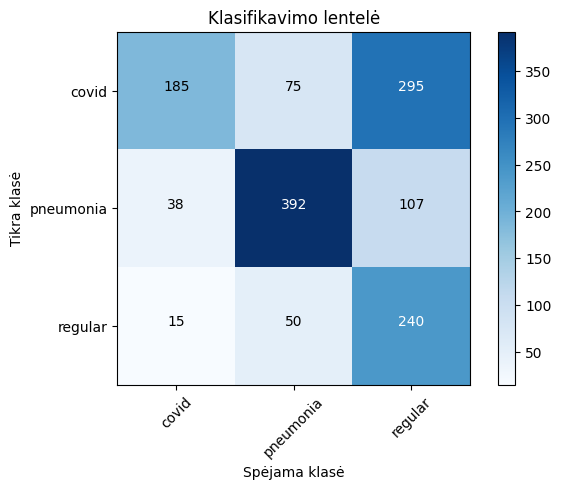

Found 1397 images belonging to 3 classes.


<ipython-input-50-31e030a72898>:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


44/44 [==============================] - 5s 77ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.67      0.37      0.48       555
   pneumonia       0.65      0.74      0.69       537
     regular       0.46      0.74      0.57       305

    accuracy                           0.59      1397
   macro avg       0.59      0.61      0.58      1397
weighted avg       0.62      0.59      0.58      1397

Accuracy: 0.5905511811023622
Specificity for covid: 0.88
Specificity for pneumonia: 0.76
Specificity for regular: 0.76
Macro-average Specificity: 0.80


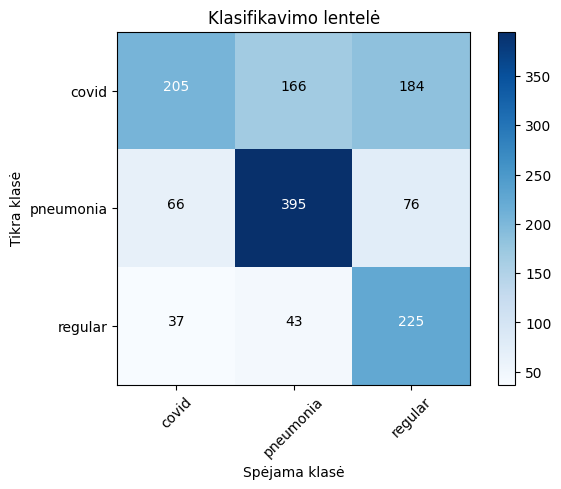

Final Metrics Across All Folds:
Average Accuracy: 0.62 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.77 ± 0.06
Class covid - Average Recall: 0.43 ± 0.09
Class covid - Average F1 Score: 0.55 ± 0.09
Class pneumonia - Average Precision: 0.73 ± 0.04
Class pneumonia - Average Recall: 0.73 ± 0.01
Class pneumonia - Average F1 Score: 0.73 ± 0.02
Class regular - Average Precision: 0.43 ± 0.03
Class regular - Average Recall: 0.77 ± 0.02
Class regular - Average F1 Score: 0.55 ± 0.02


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_name = f'focal_nadam_0.0001_fold_{fold}.h5'
    model_path = os.path.join(BASE_PATH, model_name)
    model = load_model(model_path, custom_objects={'focal_loss_fixed': focal_loss()})

    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


##Pocovid

In [ ]:
!ls /content/drive/MyDrive/Bakis/PocovidNet/

saved_model_0.pb  saved_model_2.pb  saved_model_4.pb
saved_model_1.pb  saved_model_3.pb  saved_model.pb


Found 1453 images belonging to 3 classes.
Results for fold 0
              precision    recall  f1-score   support

       covid       0.50      0.02      0.03       415
   pneumonia       0.38      0.97      0.55       357
     regular       0.69      0.30      0.41       243

    accuracy                           0.42      1015
   macro avg       0.53      0.43      0.33      1015
weighted avg       0.51      0.42      0.31      1015

Accuracy: 0.41773399014778323
Specificity for covid: 0.99
Specificity for pneumonia: 0.16
Specificity for regular: 0.96
Macro-average Specificity: 0.70


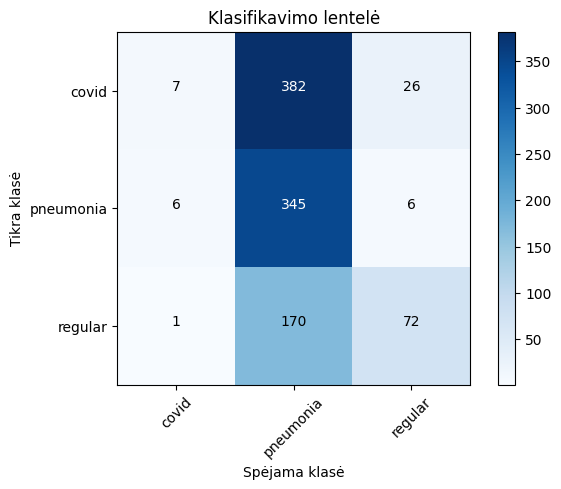

Found 1453 images belonging to 3 classes.
Results for fold 1
              precision    recall  f1-score   support

       covid       0.65      0.37      0.47       387
   pneumonia       0.43      0.94      0.59       377
     regular       0.76      0.05      0.10       310

    accuracy                           0.48      1074
   macro avg       0.61      0.46      0.39      1074
weighted avg       0.60      0.48      0.40      1074

Accuracy: 0.4795158286778399
Specificity for covid: 0.89
Specificity for pneumonia: 0.32
Specificity for regular: 0.99
Macro-average Specificity: 0.73


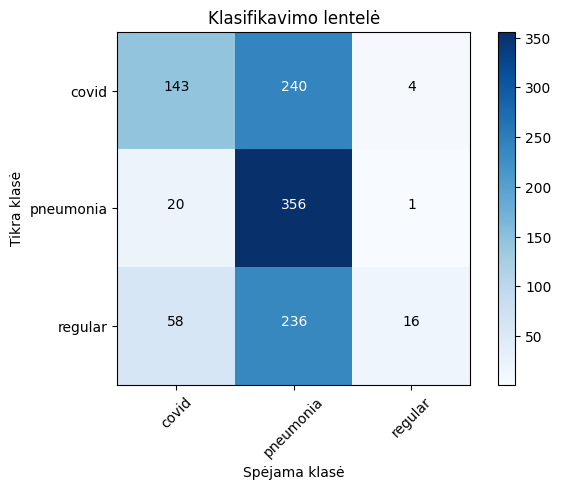

Found 1453 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Results for fold 2
              precision    recall  f1-score   support

       covid       0.00      0.00      0.00       419
   pneumonia       0.40      0.98      0.57       444
     regular       0.76      0.22      0.34       306

    accuracy                           0.43      1169
   macro avg       0.39      0.40      0.31      1169
weighted avg       0.35      0.43      0.31      1169

Accuracy: 0.43199315654405473
Specificity for covid: 1.00
Specificity for pneumonia: 0.11
Specificity for regular: 0.98
Macro-average Specificity: 0.70


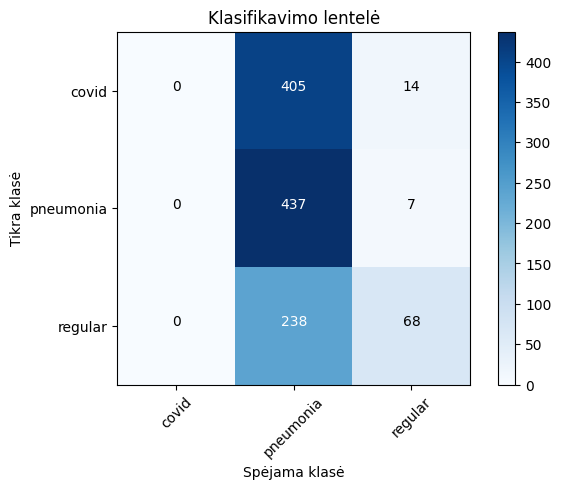

Found 1453 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Results for fold 3
              precision    recall  f1-score   support

       covid       0.00      0.00      0.00       400
   pneumonia       0.46      0.98      0.62       412
     regular       0.71      0.55      0.62       297

    accuracy                           0.51      1109
   macro avg       0.39      0.51      0.41      1109
weighted avg       0.36      0.51      0.40      1109

Accuracy: 0.5103697024346258
Specificity for covid: 1.00
Specificity for pneumonia: 0.31
Specificity for regular: 0.92
Macro-average Specificity: 0.74


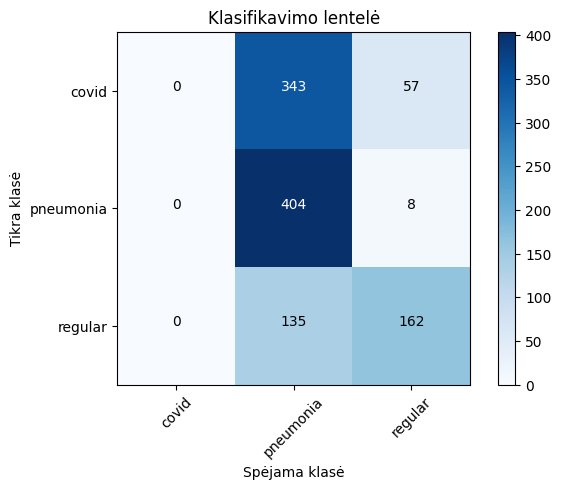

Found 1453 images belonging to 3 classes.
Results for fold 4
              precision    recall  f1-score   support

       covid       1.00      0.02      0.03       259
   pneumonia       0.43      0.98      0.60       284
     regular       0.82      0.38      0.52       205

    accuracy                           0.48       748
   macro avg       0.75      0.46      0.38       748
weighted avg       0.73      0.48      0.38       748

Accuracy: 0.48128342245989303
Specificity for covid: 1.00
Specificity for pneumonia: 0.20
Specificity for regular: 0.97
Macro-average Specificity: 0.72


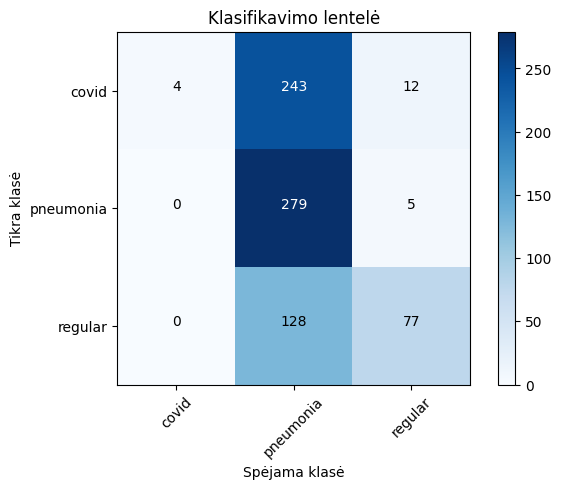

Final Metrics Across All Folds:
Average Accuracy: 0.46 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.43 ± 0.39
Class covid - Average Recall: 0.08 ± 0.14
Class covid - Average F1 Score: 0.11 ± 0.18
Class pneumonia - Average Precision: 0.42 ± 0.02
Class pneumonia - Average Recall: 0.97 ± 0.02
Class pneumonia - Average F1 Score: 0.59 ± 0.02
Class regular - Average Precision: 0.75 ± 0.04
Class regular - Average Recall: 0.30 ± 0.16
Class regular - Average F1 Score: 0.40 ± 0.18


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_directory = f'fold_{fold}'
    model_path = os.path.join('/content/drive/MyDrive/Bakis/PocovidNet', model_directory)
    #print(model_path)
    model = tf.saved_model.load(model_path)
    infer = model.signatures['serving_default']

    #print(list(infer.structured_outputs.keys()))

    # Predict the label of the test data
    predictions = []
    for x, _ in test_generator:
        preds = infer(tf.constant(x, dtype=tf.float32))['dense_1'].numpy()
        predictions.extend(preds)
        if len(predictions) >= test_generator.samples:
            break

    predictions = np.array(predictions)[:test_generator.samples]
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    filtered_predicted_classes = []
    filtered_true_classes = []
    for i, pred in enumerate(predicted_classes):
        if pred != 3:
            filtered_predicted_classes.append(pred)
            filtered_true_classes.append(true_classes[i])

    filtered_predicted_classes = np.array(filtered_predicted_classes)
    filtered_true_classes = np.array(filtered_true_classes)

    # Calculate the metrics
    report = classification_report(filtered_true_classes, filtered_predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(filtered_true_classes, filtered_predicted_classes)
    accuracy = accuracy_score(filtered_true_classes, filtered_predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(filtered_true_classes, filtered_predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


Found 1453 images belonging to 3 classes.
Results for fold 0
              precision    recall  f1-score   support

       covid       0.17      0.01      0.02       556
   pneumonia       0.38      0.93      0.54       537
     regular       0.64      0.20      0.31       360

    accuracy                           0.40      1453
   macro avg       0.40      0.38      0.29      1453
weighted avg       0.37      0.40      0.29      1453

Accuracy: 0.39848589125946315
Specificity for covid: 0.96
Specificity for pneumonia: 0.13
Specificity for regular: 0.96
Macro-average Specificity: 0.68


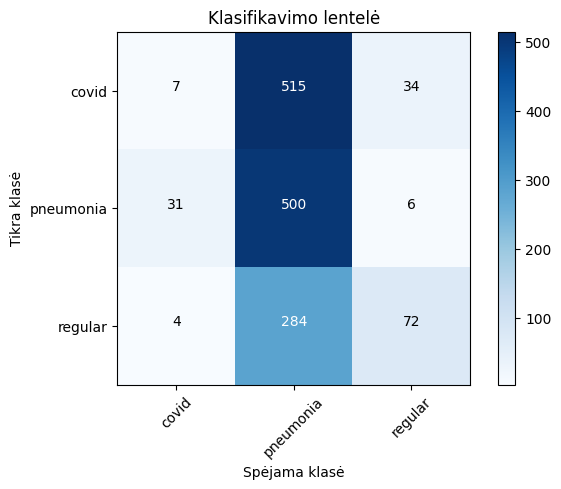

Found 1453 images belonging to 3 classes.
Results for fold 1
              precision    recall  f1-score   support

       covid       0.55      0.34      0.42       556
   pneumonia       0.41      0.82      0.55       537
     regular       0.46      0.05      0.09       360

    accuracy                           0.44      1453
   macro avg       0.47      0.40      0.35      1453
weighted avg       0.48      0.44      0.38      1453

Accuracy: 0.44459738472126636
Specificity for covid: 0.83
Specificity for pneumonia: 0.31
Specificity for regular: 0.98
Macro-average Specificity: 0.71


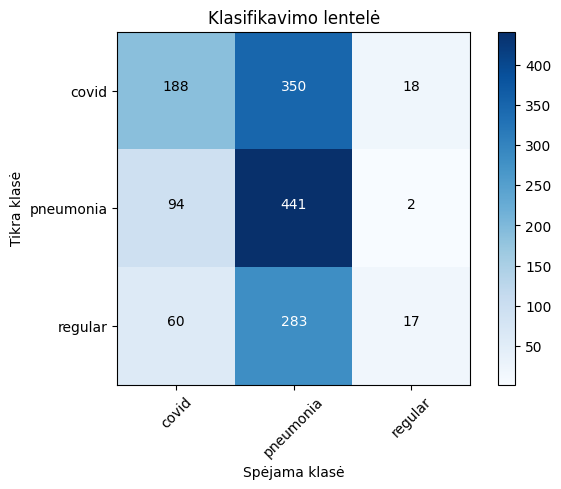

Found 1453 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Results for fold 2
              precision    recall  f1-score   support

       covid       0.00      0.00      0.00       556
   pneumonia       0.40      0.98      0.57       537
     regular       0.54      0.22      0.31       360

    accuracy                           0.42      1453
   macro avg       0.32      0.40      0.30      1453
weighted avg       0.28      0.42      0.29      1453

Accuracy: 0.4184445973847213
Specificity for covid: 1.00
Specificity for pneumonia: 0.15
Specificity for regular: 0.94
Macro-average Specificity: 0.70


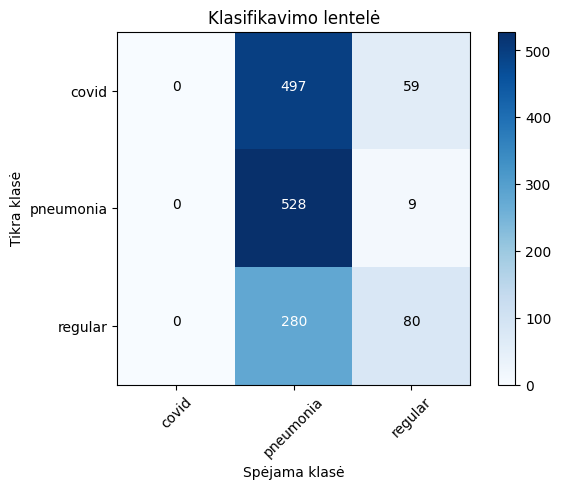

Found 1453 images belonging to 3 classes.
Results for fold 3
              precision    recall  f1-score   support

       covid       0.00      0.00      0.00       556
   pneumonia       0.47      0.98      0.63       537
     regular       0.57      0.51      0.53       360

    accuracy                           0.49      1453
   macro avg       0.34      0.50      0.39      1453
weighted avg       0.31      0.49      0.37      1453

Accuracy: 0.48864418444597385
Specificity for covid: 1.00
Specificity for pneumonia: 0.34
Specificity for regular: 0.87
Macro-average Specificity: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

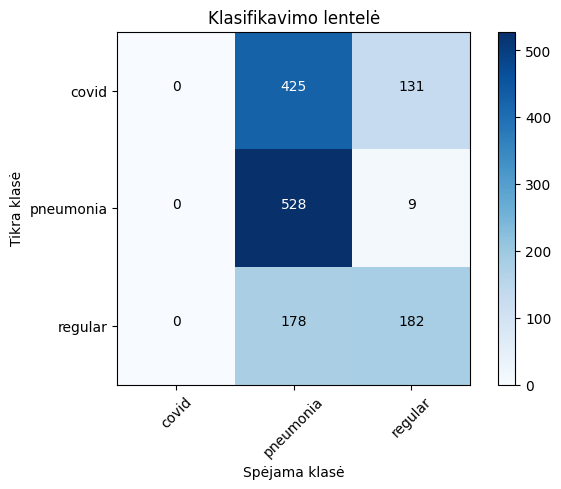

Found 1453 images belonging to 3 classes.
Results for fold 4
              precision    recall  f1-score   support

       covid       1.00      0.01      0.02       556
   pneumonia       0.40      0.99      0.57       537
     regular       0.84      0.27      0.41       360

    accuracy                           0.44      1453
   macro avg       0.75      0.42      0.33      1453
weighted avg       0.74      0.44      0.32      1453

Accuracy: 0.43565037852718513
Specificity for covid: 1.00
Specificity for pneumonia: 0.12
Specificity for regular: 0.98
Macro-average Specificity: 0.70


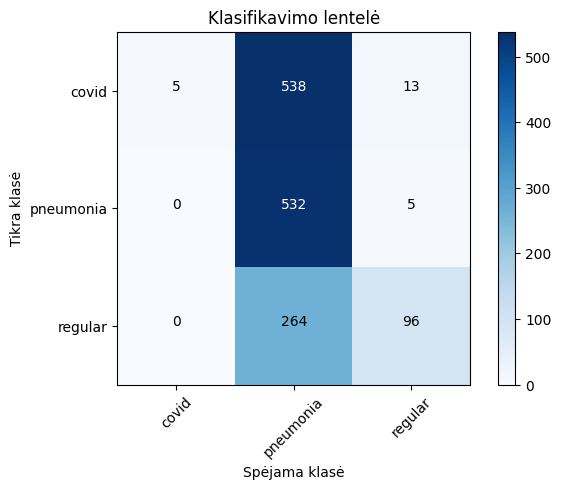

Final Metrics Across All Folds:
Average Accuracy: 0.44 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.34 ± 0.38
Class covid - Average Recall: 0.07 ± 0.13
Class covid - Average F1 Score: 0.09 ± 0.16
Class pneumonia - Average Precision: 0.41 ± 0.03
Class pneumonia - Average Recall: 0.94 ± 0.06
Class pneumonia - Average F1 Score: 0.57 ± 0.03
Class regular - Average Precision: 0.61 ± 0.13
Class regular - Average Recall: 0.25 ± 0.15
Class regular - Average F1 Score: 0.33 ± 0.15


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_directory = f'fold_{fold}'
    model_path = os.path.join('/content/drive/MyDrive/Bakis/PocovidNet', model_directory)
    #print(model_path)
    model = tf.saved_model.load(model_path)
    infer = model.signatures['serving_default']

    #print(list(infer.structured_outputs.keys()))

    # Predict the label of the test data
    predictions = []
    for x, _ in test_generator:
        preds = infer(tf.constant(x, dtype=tf.float32))['dense_1'].numpy()
        predictions.extend(preds)
        if len(predictions) >= test_generator.samples:
            break

    predictions = np.array(predictions)[:test_generator.samples]
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    filtered_predicted_classes = []
    filtered_true_classes = []
    valid_class_indices = [0, 1, 2]  # Indeksai trijų pageidaujamų klasių

    for i, pred in enumerate(predicted_classes):
        if pred == 3:
            # Reassign klasei su didžiausia tikimybe iš trijų leistinų klasių
            new_pred = np.argmax(predictions[i, valid_class_indices])
            filtered_predicted_classes.append(new_pred)
        else:
            filtered_predicted_classes.append(pred)
        filtered_true_classes.append(true_classes[i])

    filtered_predicted_classes = np.array(filtered_predicted_classes)
    filtered_true_classes = np.array(filtered_true_classes)

    # Calculate the metrics
    report = classification_report(filtered_true_classes, filtered_predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(filtered_true_classes, filtered_predicted_classes)
    accuracy = accuracy_score(filtered_true_classes, filtered_predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(filtered_true_classes, filtered_predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


Found 1453 images belonging to 3 classes.
Results for fold 0
               precision    recall  f1-score   support

        covid       0.50      0.01      0.02       556
    pneumonia       0.38      0.64      0.48       537
      regular       0.69      0.20      0.31       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.29      1453
    macro avg       0.39      0.21      0.20      1453
 weighted avg       0.51      0.29      0.26      1453

Accuracy: 0.2918100481761872
Specificity for covid: 0.99
Specificity for pneumonia: 0.40
Specificity for regular: 0.97
Macro-average Specificity: 0.79


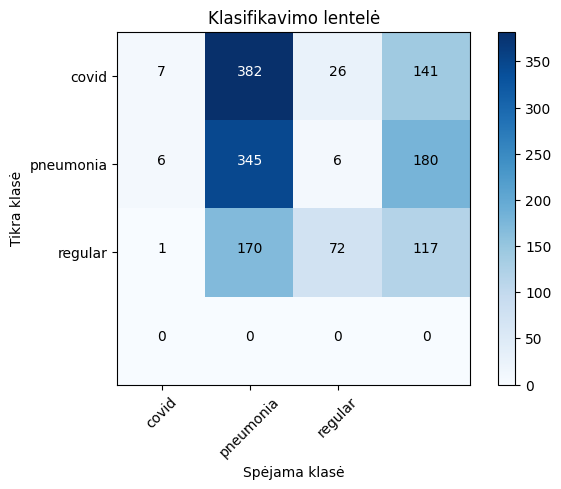

Found 1453 images belonging to 3 classes.
Results for fold 1
               precision    recall  f1-score   support

        covid       0.65      0.26      0.37       556
    pneumonia       0.43      0.66      0.52       537
      regular       0.76      0.04      0.08       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.35      1453
    macro avg       0.46      0.24      0.24      1453
 weighted avg       0.59      0.35      0.35      1453

Accuracy: 0.35443909153475567
Specificity for covid: 0.91
Specificity for pneumonia: 0.48
Specificity for regular: 1.00
Macro-average Specificity: 0.80


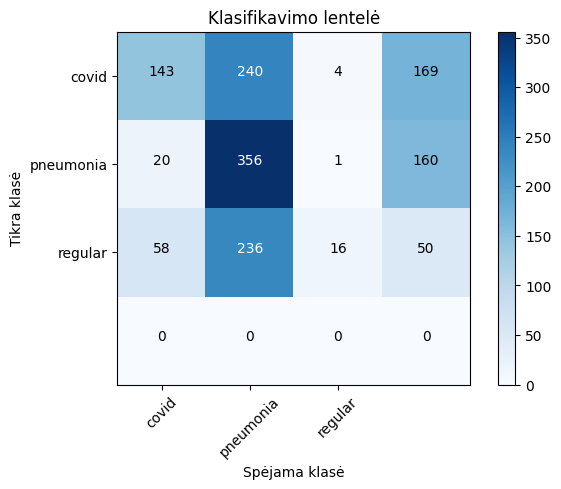

Found 1453 images belonging to 3 classes.
Results for fold 2
               precision    recall  f1-score   support

        covid       0.00      0.00      0.00       556
    pneumonia       0.40      0.81      0.54       537
      regular       0.76      0.19      0.30       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.35      1453
    macro avg       0.29      0.25      0.21      1453
 weighted avg       0.34      0.35      0.27      1453

Accuracy: 0.3475567790777701
Specificity for covid: 1.00
Specificity for pneumonia: 0.30
Specificity for regular: 0.98
Macro-average Specificity: 0.76


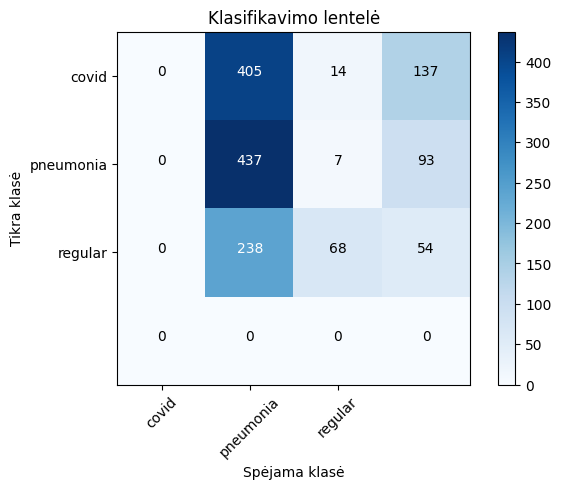

Found 1453 images belonging to 3 classes.
Results for fold 3
               precision    recall  f1-score   support

        covid       0.00      0.00      0.00       556
    pneumonia       0.46      0.75      0.57       537
      regular       0.71      0.45      0.55       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.39      1453
    macro avg       0.29      0.30      0.28      1453
 weighted avg       0.35      0.39      0.35      1453

Accuracy: 0.389538885065382
Specificity for covid: 1.00
Specificity for pneumonia: 0.48
Specificity for regular: 0.94
Macro-average Specificity: 0.81


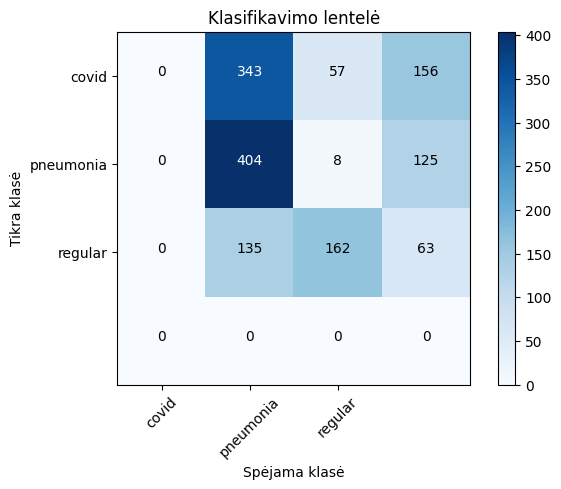

Found 1453 images belonging to 3 classes.
Results for fold 4
               precision    recall  f1-score   support

        covid       1.00      0.01      0.01       556
    pneumonia       0.43      0.52      0.47       537
      regular       0.82      0.21      0.34       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.25      1453
    macro avg       0.56      0.19      0.21      1453
 weighted avg       0.74      0.25      0.26      1453

Accuracy: 0.2477632484514797
Specificity for covid: 1.00
Specificity for pneumonia: 0.59
Specificity for regular: 0.98
Macro-average Specificity: 0.86


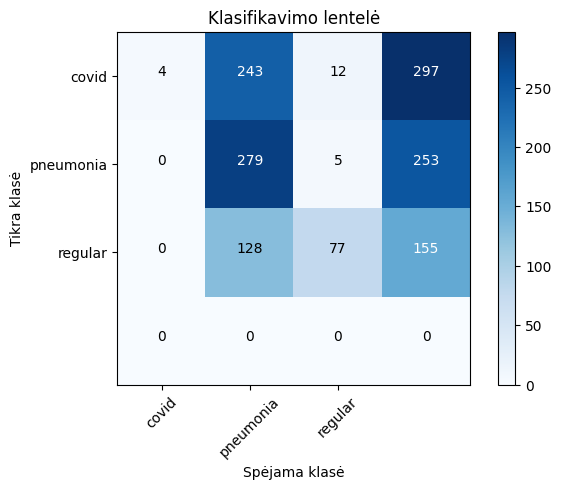

Final Metrics Across All Folds:
Average Accuracy: 0.33 ± 0.05
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.43 ± 0.39
Class covid - Average Recall: 0.06 ± 0.10
Class covid - Average F1 Score: 0.08 ± 0.14
Class pneumonia - Average Precision: 0.42 ± 0.02
Class pneumonia - Average Recall: 0.68 ± 0.10
Class pneumonia - Average F1 Score: 0.52 ± 0.04
Class regular - Average Precision: 0.75 ± 0.04
Class regular - Average Recall: 0.22 ± 0.13
Class regular - Average F1 Score: 0.32 ± 0.15


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_directory = f'fold_{fold}'
    model_path = os.path.join('/content/drive/MyDrive/Bakis/PocovidNet', model_directory)
    #print(model_path)
    model = tf.saved_model.load(model_path)
    infer = model.signatures['serving_default']

    #print(list(infer.structured_outputs.keys()))

    # Predict the label of the test data
    predictions = []
    for x, _ in test_generator:
        preds = infer(tf.constant(x, dtype=tf.float32))['dense_1'].numpy()
        predictions.extend(preds)
        if len(predictions) >= test_generator.samples:
            break

    predictions = np.array(predictions)[:test_generator.samples]
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    my_Target = ['covid', 'pneumonia', 'regular', 'uninformative']
    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=my_Target, output_dict=True, zero_division = 0)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=my_Target, zero_division = 0))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


Found 1453 images belonging to 3 classes.
Results for fold 0
               precision    recall  f1-score   support

        covid       0.43      0.68      0.53       556
    pneumonia       0.23      0.01      0.01       537
      regular       0.52      0.29      0.37       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.33      1453
    macro avg       0.30      0.24      0.23      1453
 weighted avg       0.38      0.33      0.30      1453

Accuracy: 0.3344803854094976
Specificity for covid: 0.45
Specificity for pneumonia: 0.99
Specificity for regular: 0.91
Macro-average Specificity: 0.78


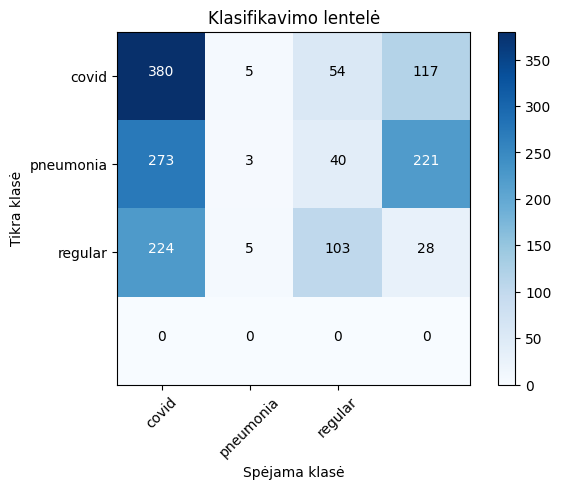

Found 1453 images belonging to 3 classes.
Results for fold 1
               precision    recall  f1-score   support

        covid       0.41      0.60      0.48       556
    pneumonia       0.07      0.00      0.00       537
      regular       0.44      0.31      0.36       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.30      1453
    macro avg       0.23      0.23      0.21      1453
 weighted avg       0.29      0.30      0.28      1453

Accuracy: 0.30488644184445973
Specificity for covid: 0.47
Specificity for pneumonia: 0.98
Specificity for regular: 0.87
Macro-average Specificity: 0.77


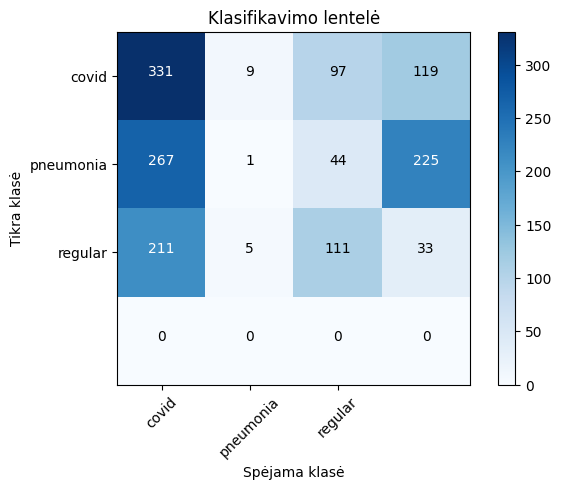

Found 1453 images belonging to 3 classes.
Results for fold 2
               precision    recall  f1-score   support

        covid       0.40      0.76      0.52       556
    pneumonia       0.06      0.00      0.00       537
      regular       0.04      0.00      0.01       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.29      1453
    macro avg       0.12      0.19      0.13      1453
 weighted avg       0.18      0.29      0.20      1453

Accuracy: 0.29318651066758433
Specificity for covid: 0.28
Specificity for pneumonia: 0.98
Specificity for regular: 0.98
Macro-average Specificity: 0.75


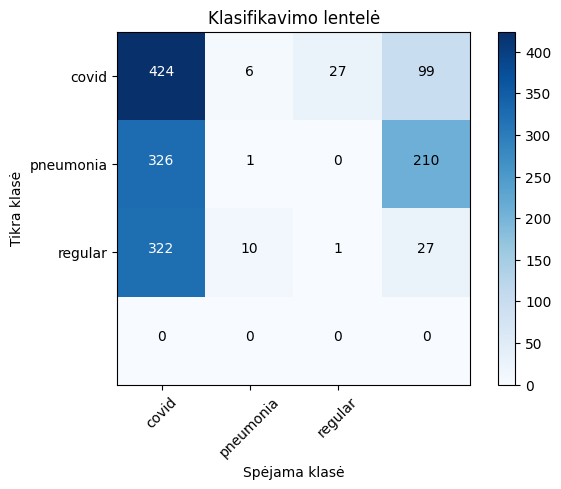

Found 1453 images belonging to 3 classes.
Results for fold 3
               precision    recall  f1-score   support

        covid       0.40      0.68      0.50       556
    pneumonia       0.17      0.01      0.02       537
      regular       0.15      0.04      0.06       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.28      1453
    macro avg       0.18      0.18      0.15      1453
 weighted avg       0.25      0.28      0.22      1453

Accuracy: 0.27529249827942187
Specificity for covid: 0.36
Specificity for pneumonia: 0.97
Specificity for regular: 0.93
Macro-average Specificity: 0.75


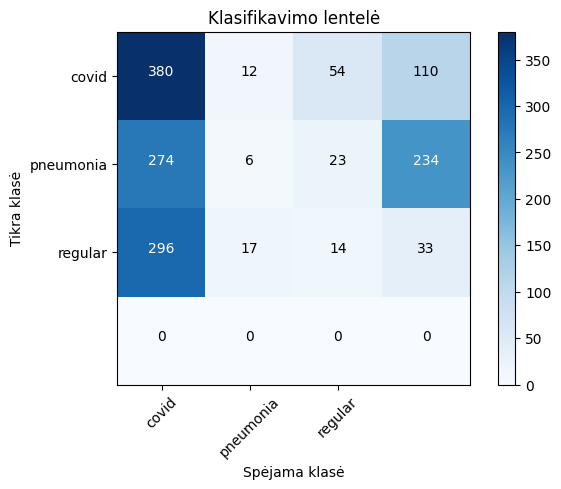

Found 1453 images belonging to 3 classes.
Results for fold 4
               precision    recall  f1-score   support

        covid       0.40      0.84      0.55       556
    pneumonia       0.33      0.00      0.01       537
      regular       0.55      0.10      0.17       360
uninformative       0.00      0.00      0.00         0

     accuracy                           0.35      1453
    macro avg       0.32      0.24      0.18      1453
 weighted avg       0.41      0.35      0.25      1453

Accuracy: 0.34686854783207155
Specificity for covid: 0.23
Specificity for pneumonia: 1.00
Specificity for regular: 0.97
Macro-average Specificity: 0.73


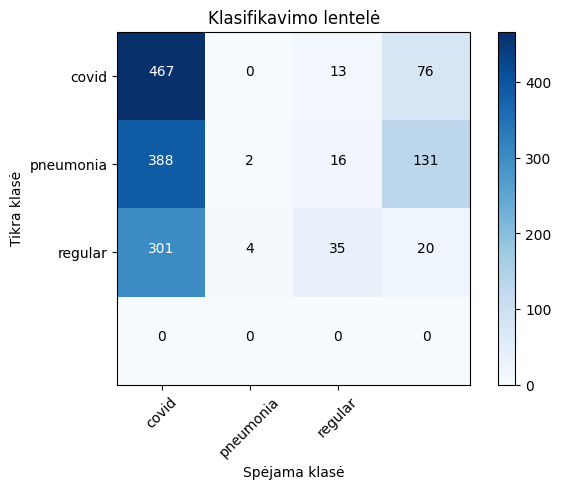

Final Metrics Across All Folds:
Average Accuracy: 0.31 ± 0.03
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.41 ± 0.01
Class covid - Average Recall: 0.71 ± 0.08
Class covid - Average F1 Score: 0.52 ± 0.02
Class pneumonia - Average Precision: 0.17 ± 0.10
Class pneumonia - Average Recall: 0.00 ± 0.00
Class pneumonia - Average F1 Score: 0.01 ± 0.01
Class regular - Average Precision: 0.34 ± 0.21
Class regular - Average Recall: 0.15 ± 0.13
Class regular - Average F1 Score: 0.19 ± 0.15


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_directory = f'fold_{fold}'
    model_path = os.path.join('/content/drive/MyDrive/Bakis/PocovidNet/trained_models_NAS', model_directory)
    #print(model_path)
    model = tf.saved_model.load(model_path)
    infer = model.signatures['serving_default']

    #print(list(infer.structured_outputs.keys()))

    # Predict the label of the test data
    predictions = []
    for x, _ in test_generator:
        preds = infer(tf.constant(x, dtype=tf.float32))['dense_1'].numpy()
        predictions.extend(preds)
        if len(predictions) >= test_generator.samples:
            break

    predictions = np.array(predictions)[:test_generator.samples]
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    my_Target = ['covid', 'pneumonia', 'regular', 'uninformative']
    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=my_Target, output_dict=True, zero_division = 0)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=my_Target, zero_division = 0))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


Found 1453 images belonging to 3 classes.
Results for fold 0
              precision    recall  f1-score   support

       covid       0.40      0.77      0.53       556
   pneumonia       0.29      0.01      0.01       537
     regular       0.30      0.31      0.31       360

    accuracy                           0.38      1453
   macro avg       0.33      0.36      0.28      1453
weighted avg       0.33      0.38      0.28      1453

Accuracy: 0.3750860289057123
Specificity for covid: 0.29
Specificity for pneumonia: 0.99
Specificity for regular: 0.76
Macro-average Specificity: 0.68


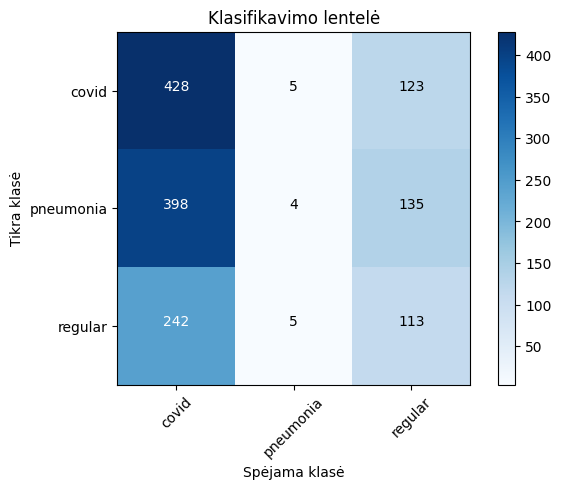

Found 1453 images belonging to 3 classes.
Results for fold 1
              precision    recall  f1-score   support

       covid       0.36      0.72      0.48       556
   pneumonia       0.06      0.00      0.00       537
     regular       0.37      0.35      0.36       360

    accuracy                           0.36      1453
   macro avg       0.27      0.36      0.28      1453
weighted avg       0.25      0.36      0.27      1453

Accuracy: 0.36132140399174123
Specificity for covid: 0.22
Specificity for pneumonia: 0.98
Specificity for regular: 0.81
Macro-average Specificity: 0.67


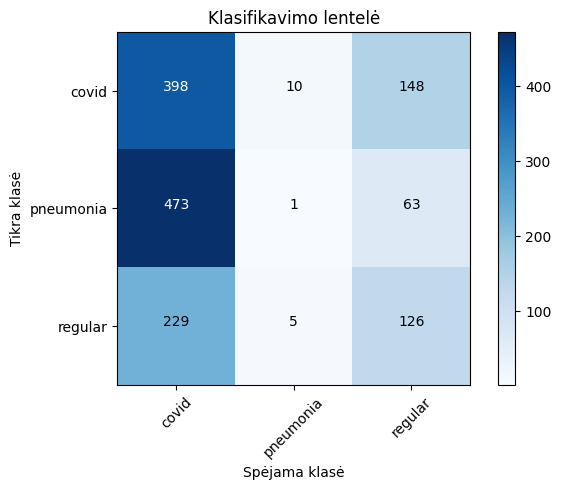

Found 1453 images belonging to 3 classes.
Results for fold 2
              precision    recall  f1-score   support

       covid       0.37      0.90      0.53       556
   pneumonia       0.06      0.00      0.00       537
     regular       0.05      0.01      0.02       360

    accuracy                           0.35      1453
   macro avg       0.16      0.31      0.18      1453
weighted avg       0.18      0.35      0.21      1453

Accuracy: 0.3489332415691672
Specificity for covid: 0.06
Specificity for pneumonia: 0.98
Specificity for regular: 0.92
Macro-average Specificity: 0.65


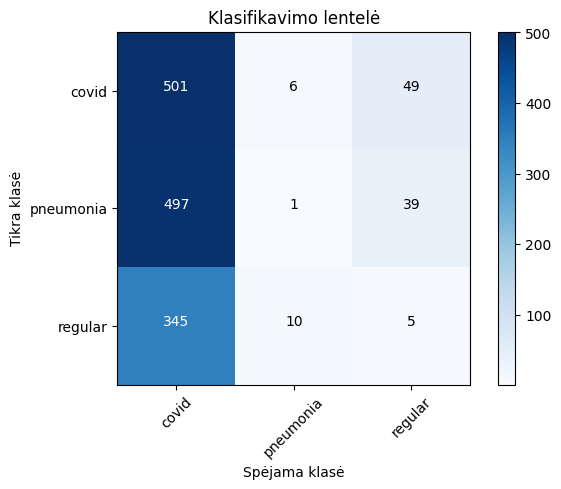

Found 1453 images belonging to 3 classes.
Results for fold 3
              precision    recall  f1-score   support

       covid       0.37      0.87      0.52       556
   pneumonia       0.17      0.01      0.02       537
     regular       0.13      0.04      0.06       360

    accuracy                           0.35      1453
   macro avg       0.22      0.31      0.20      1453
weighted avg       0.24      0.35      0.22      1453

Accuracy: 0.3454920853406745
Specificity for covid: 0.08
Specificity for pneumonia: 0.97
Specificity for regular: 0.91
Macro-average Specificity: 0.65


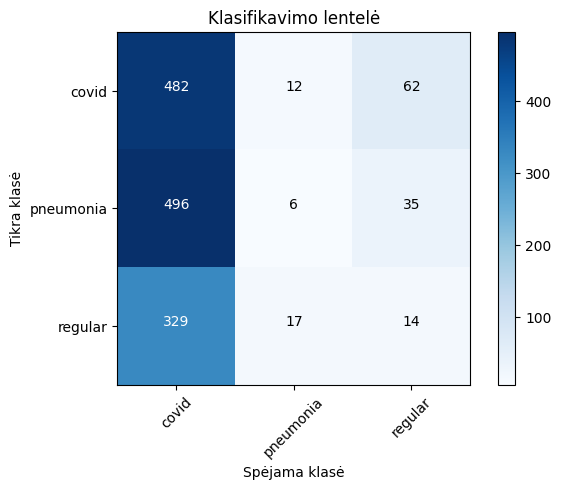

Found 1453 images belonging to 3 classes.
Results for fold 4
              precision    recall  f1-score   support

       covid       0.39      0.98      0.56       556
   pneumonia       0.33      0.00      0.01       537
     regular       0.54      0.10      0.16       360

    accuracy                           0.40      1453
   macro avg       0.42      0.36      0.24      1453
weighted avg       0.41      0.40      0.26      1453

Accuracy: 0.3991741225051617
Specificity for covid: 0.06
Specificity for pneumonia: 1.00
Specificity for regular: 0.97
Macro-average Specificity: 0.68


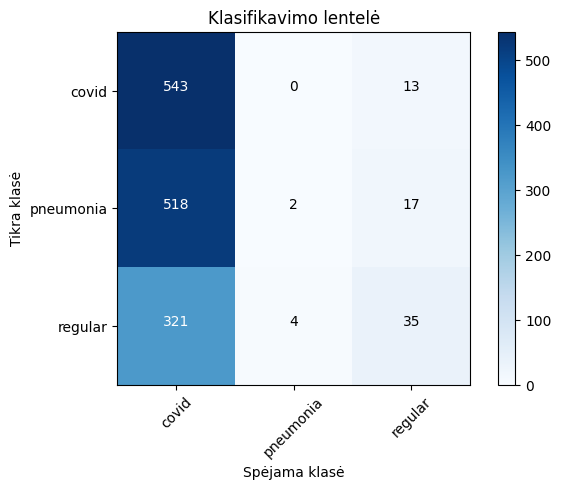

Final Metrics Across All Folds:
Average Accuracy: 0.37 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.38 ± 0.01
Class covid - Average Recall: 0.85 ± 0.09
Class covid - Average F1 Score: 0.52 ± 0.03
Class pneumonia - Average Precision: 0.18 ± 0.11
Class pneumonia - Average Recall: 0.01 ± 0.00
Class pneumonia - Average F1 Score: 0.01 ± 0.01
Class regular - Average Precision: 0.28 ± 0.17
Class regular - Average Recall: 0.16 ± 0.14
Class regular - Average F1 Score: 0.18 ± 0.13


In [ ]:
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    test_generator = test_datagen.flow_from_directory(
          TEST_DIR,
          target_size=(img_height, img_width),
          batch_size=batch_size,
          class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
          shuffle=False
      )

    model_directory = f'fold_{fold}'
    model_path = os.path.join('/content/drive/MyDrive/Bakis/PocovidNet/trained_models_NAS', model_directory)
    #print(model_path)
    model = tf.saved_model.load(model_path)
    infer = model.signatures['serving_default']

    #print(list(infer.structured_outputs.keys()))

    # Predict the label of the test data
    predictions = []
    for x, _ in test_generator:
        preds = infer(tf.constant(x, dtype=tf.float32))['dense_1'].numpy()
        predictions.extend(preds)
        if len(predictions) >= test_generator.samples:
            break

    predictions = np.array(predictions)[:test_generator.samples]
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    filtered_predicted_classes = []
    filtered_true_classes = []
    valid_class_indices = [0, 1, 2]  # Indeksai trijų pageidaujamų klasių

    for i, pred in enumerate(predicted_classes):
        if pred == 3:
            # Reassign klasei su didžiausia tikimybe iš trijų leistinų klasių
            new_pred = np.argmax(predictions[i, valid_class_indices])
            filtered_predicted_classes.append(new_pred)
        else:
            filtered_predicted_classes.append(pred)
        filtered_true_classes.append(true_classes[i])

    filtered_predicted_classes = np.array(filtered_predicted_classes)
    filtered_true_classes = np.array(filtered_true_classes)

    # Calculate the metrics
    report = classification_report(filtered_true_classes, filtered_predicted_classes, target_names=class_labels, output_dict=True, zero_division = 0)
    conf_matrix = confusion_matrix(filtered_true_classes, filtered_predicted_classes)
    accuracy = accuracy_score(filtered_true_classes, filtered_predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(filtered_true_classes, filtered_predicted_classes, target_names=class_labels, zero_division = 0))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
